In [1]:
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from DL_Models import *
from functions_for_DL_dataset import *
from functions_for_DL_experiments import *

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()


#device = torch.device('cuda:0,1' if torch.cuda.is_available() else 'cpu')
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce GTX TITAN X
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [3]:
train_df = pd.read_csv('../data/train_set_seq.csv')
dev_df = pd.read_csv('../data/dev_set_seq.csv')
test_df = pd.read_csv('../data/test_set_seq.csv')

In [4]:
target = 'alc'
with open('../data/columns-Seq.txt') as c:
    feature_cols = c.read().split(', ')[5:]

Mean: 23491, Median: 12134


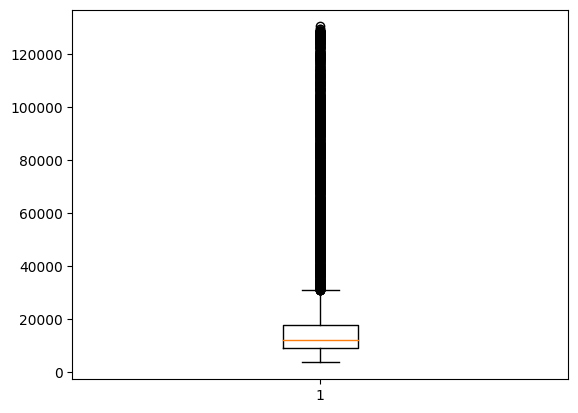

In [5]:
data = train_df[feature_cols[0]].apply(lambda x: len(x))
print(f'Mean: {int(data.mean())}, Median: {int(data.median())}')
plt.boxplot(data)
plt.show()
# We will use only 1000 rows of each feature representations

In [6]:
train_df = strings_to_vectors(train_df, feature_cols, feature_length=1000)
dev_df = strings_to_vectors(dev_df, feature_cols, feature_length=1000)
test_df = strings_to_vectors(test_df, feature_cols, feature_length=1000)

## Dataset Class

In [7]:
train_dataset = AlcDataset(train_df, feature_cols, 'alc', 'full_path')
val_dataset = AlcDataset(dev_df, feature_cols, 'alc', 'full_path')
test_dataset = AlcDataset(test_df, feature_cols, 'alc', 'full_path')

## Dataloader

In [8]:
batch_size = 16

In [9]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                           collate_fn=collate_function,
                                           batch_size=batch_size, drop_last=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                           collate_fn=collate_function,
                                           batch_size=batch_size, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                           collate_fn=collate_function,
                                           batch_size=batch_size, drop_last=True)

## LSTM Model

In [10]:
input_size = 25
layers_sizes = [16, 8, 4]
num_layers = 2
num_classes = 2
bias=True

## Training settings

In [11]:
loss = torch.nn.BCELoss()
num_epochs = 10

bidirectionals = [True]
batch_normalizations = [True]
optimizers = ['Adam', 'Adagrad', 'SGD']
activation_functions = [torch.nn.Tanh(), torch.nn.Sigmoid(), torch.nn.LeakyReLU()]
learning_rates = [1.0e-5, 1.0e-6]
schedulers = [None,'ReduceLROnPlateau']
dropouts = [0.0, 0.3]

## Experiments!

{'exp_num': 1, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:37<14:35, 97.30s/it]

Epoch: 0 | Train loss: 0.7067| Val loss: 0.7133


 20%|████████▊                                   | 2/10 [03:14<12:59, 97.41s/it]

Epoch: 1 | Train loss: 0.7003| Val loss: 0.7075


 30%|█████████████▏                              | 3/10 [04:52<11:21, 97.40s/it]

Epoch: 2 | Train loss: 0.6962| Val loss: 0.7035


 40%|█████████████████▌                          | 4/10 [06:26<09:37, 96.18s/it]

Epoch: 3 | Train loss: 0.693| Val loss: 0.7004


 50%|██████████████████████                      | 5/10 [08:02<08:00, 96.01s/it]

Epoch: 4 | Train loss: 0.6903| Val loss: 0.6978


 60%|██████████████████████████▍                 | 6/10 [09:39<06:25, 96.34s/it]

Epoch: 5 | Train loss: 0.688| Val loss: 0.6954


 70%|██████████████████████████████▊             | 7/10 [11:15<04:48, 96.24s/it]

Epoch: 6 | Train loss: 0.686| Val loss: 0.6932


 80%|███████████████████████████████████▏        | 8/10 [12:51<03:12, 96.40s/it]

Epoch: 7 | Train loss: 0.6842| Val loss: 0.6914


 90%|███████████████████████████████████████▌    | 9/10 [14:28<01:36, 96.47s/it]

Epoch: 8 | Train loss: 0.6825| Val loss: 0.6897


100%|███████████████████████████████████████████| 10/10 [16:05<00:00, 96.52s/it]

Epoch: 9 | Train loss: 0.6809| Val loss: 0.6881


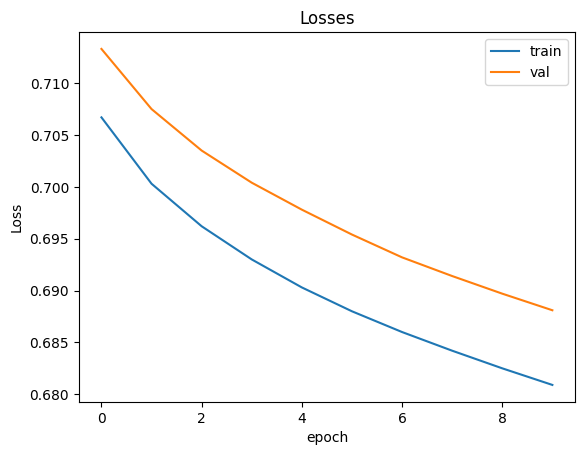

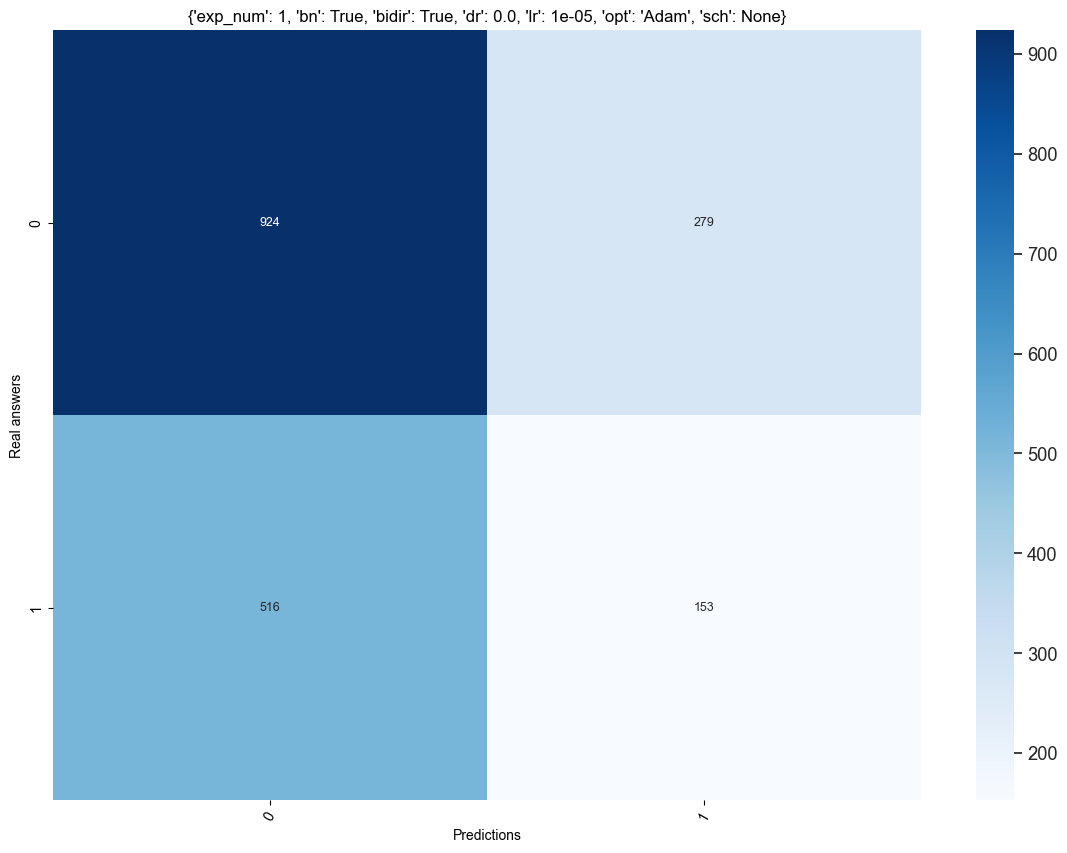

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1203
           1       0.35      0.23      0.28       669

    accuracy                           0.58      1872
   macro avg       0.50      0.50      0.49      1872
weighted avg       0.54      0.58      0.55      1872

{'algorithm': "{'exp_num': 1, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.35, 'recall': 0.23, 'f1_score': 0.28, 'f1_score_weighted': 0.55, 'accuracy': 0.58}
---------------------
{'exp_num': 2, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:36<14:25, 96.13s/it]

Epoch: 0 | Train loss: 0.6799| Val loss: 0.688


 20%|████████▊                                   | 2/10 [03:13<12:55, 96.88s/it]

Epoch: 1 | Train loss: 0.6799| Val loss: 0.688


 30%|█████████████▏                              | 3/10 [04:51<11:20, 97.24s/it]

Epoch: 2 | Train loss: 0.6799| Val loss: 0.688


 40%|█████████████████▌                          | 4/10 [06:28<09:44, 97.34s/it]

Epoch: 3 | Train loss: 0.6798| Val loss: 0.688


 50%|██████████████████████                      | 5/10 [08:05<08:05, 97.07s/it]

Epoch: 4 | Train loss: 0.6798| Val loss: 0.688


 60%|██████████████████████████▍                 | 6/10 [09:41<06:27, 96.93s/it]

Epoch: 5 | Train loss: 0.6798| Val loss: 0.688


 70%|██████████████████████████████▊             | 7/10 [11:19<04:51, 97.10s/it]

Epoch: 6 | Train loss: 0.6798| Val loss: 0.688


 80%|███████████████████████████████████▏        | 8/10 [12:57<03:14, 97.41s/it]

Epoch: 7 | Train loss: 0.6798| Val loss: 0.688


 90%|███████████████████████████████████████▌    | 9/10 [14:34<01:37, 97.14s/it]

Epoch: 8 | Train loss: 0.6798| Val loss: 0.688


100%|███████████████████████████████████████████| 10/10 [16:11<00:00, 97.11s/it]

Epoch: 9 | Train loss: 0.6798| Val loss: 0.688


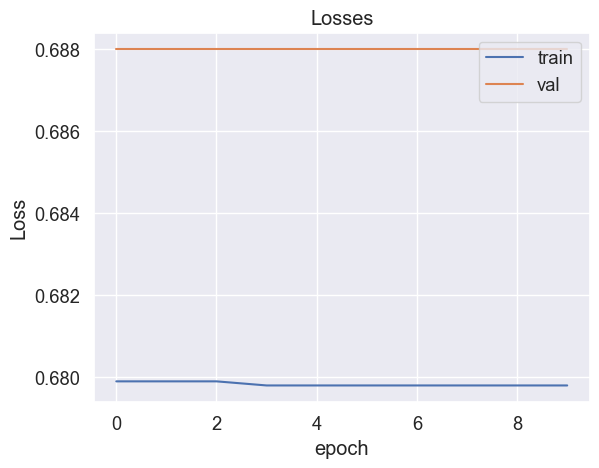

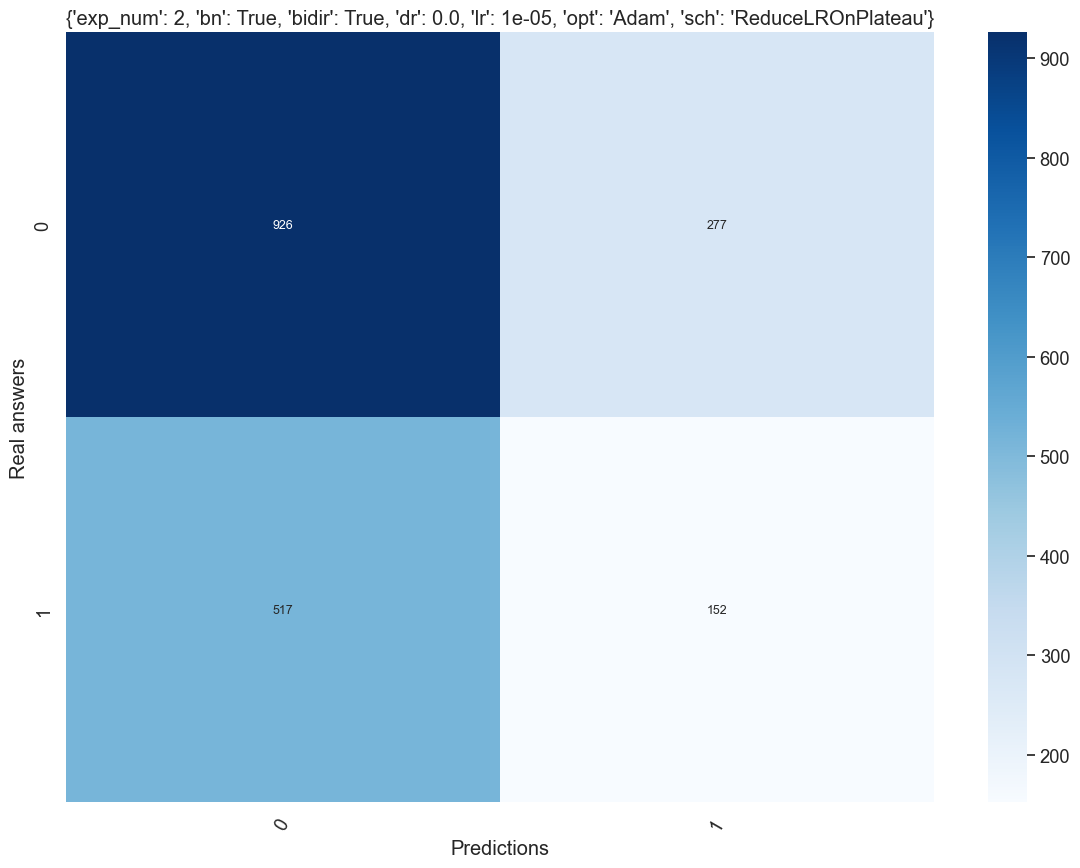

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1203
           1       0.35      0.23      0.28       669

    accuracy                           0.58      1872
   macro avg       0.50      0.50      0.49      1872
weighted avg       0.54      0.58      0.55      1872

{'algorithm': "{'exp_num': 2, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.35, 'recall': 0.23, 'f1_score': 0.28, 'f1_score_weighted': 0.55, 'accuracy': 0.58}
---------------------
{'exp_num': 3, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▍                                       | 1/10 [01:36<14:32, 96.91s/it]

Epoch: 0 | Train loss: 0.6798| Val loss: 0.6878


 20%|████████▊                                   | 2/10 [03:16<13:06, 98.33s/it]

Epoch: 1 | Train loss: 0.6797| Val loss: 0.6878


 30%|████████████▉                              | 3/10 [04:58<11:40, 100.13s/it]

Epoch: 2 | Train loss: 0.6796| Val loss: 0.6877


 40%|█████████████████▌                          | 4/10 [06:36<09:56, 99.37s/it]

Epoch: 3 | Train loss: 0.6795| Val loss: 0.6877


 50%|██████████████████████                      | 5/10 [08:13<08:12, 98.55s/it]

Epoch: 4 | Train loss: 0.6795| Val loss: 0.6877


 60%|██████████████████████████▍                 | 6/10 [09:51<06:33, 98.30s/it]

Epoch: 5 | Train loss: 0.6795| Val loss: 0.6876


 70%|██████████████████████████████▊             | 7/10 [11:28<04:53, 97.88s/it]

Epoch: 6 | Train loss: 0.6794| Val loss: 0.6876


 80%|███████████████████████████████████▏        | 8/10 [13:05<03:14, 97.43s/it]

Epoch: 7 | Train loss: 0.6794| Val loss: 0.6876


 90%|███████████████████████████████████████▌    | 9/10 [14:41<01:36, 96.99s/it]

Epoch: 8 | Train loss: 0.6794| Val loss: 0.6876


100%|███████████████████████████████████████████| 10/10 [16:18<00:00, 97.85s/it]

Epoch: 9 | Train loss: 0.6794| Val loss: 0.6875


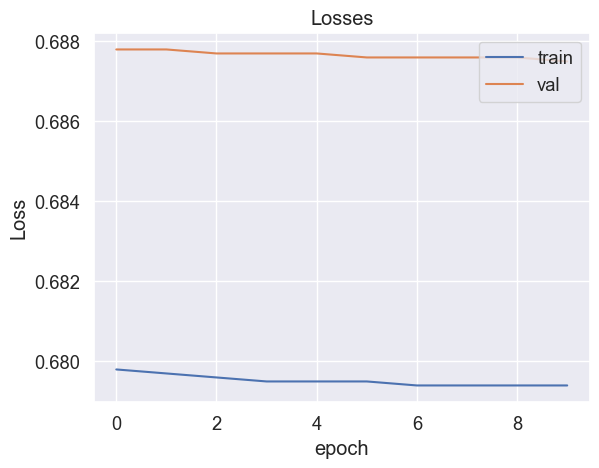

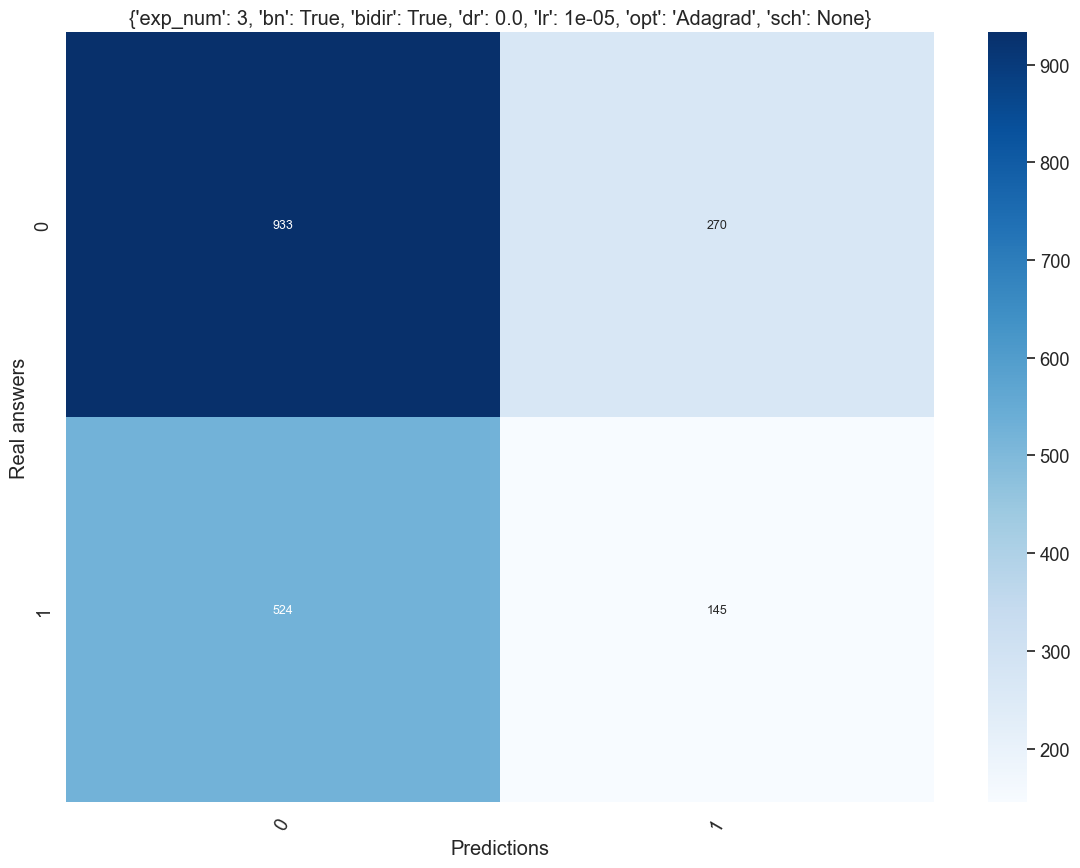

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1203
           1       0.35      0.22      0.27       669

    accuracy                           0.58      1872
   macro avg       0.49      0.50      0.48      1872
weighted avg       0.54      0.58      0.55      1872

{'algorithm': "{'exp_num': 3, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.35, 'recall': 0.22, 'f1_score': 0.27, 'f1_score_weighted': 0.55, 'accuracy': 0.58}
---------------------
{'exp_num': 4, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:36<14:28, 96.50s/it]

Epoch: 0 | Train loss: 0.6794| Val loss: 0.6875


 20%|████████▊                                   | 2/10 [03:13<12:53, 96.66s/it]

Epoch: 1 | Train loss: 0.6793| Val loss: 0.6875


 30%|█████████████▏                              | 3/10 [04:50<11:17, 96.79s/it]

Epoch: 2 | Train loss: 0.6793| Val loss: 0.6875


 40%|█████████████████▌                          | 4/10 [06:26<09:40, 96.79s/it]

Epoch: 3 | Train loss: 0.6793| Val loss: 0.6875


 50%|██████████████████████                      | 5/10 [08:08<08:13, 98.65s/it]

Epoch: 4 | Train loss: 0.6793| Val loss: 0.6875


 60%|██████████████████████████▍                 | 6/10 [09:48<06:35, 98.85s/it]

Epoch: 5 | Train loss: 0.6793| Val loss: 0.6875


 70%|██████████████████████████████▊             | 7/10 [11:27<04:57, 99.11s/it]

Epoch: 6 | Train loss: 0.6793| Val loss: 0.6875


 80%|███████████████████████████████████▏        | 8/10 [13:06<03:17, 98.90s/it]

Epoch: 7 | Train loss: 0.6793| Val loss: 0.6875


 90%|███████████████████████████████████████▌    | 9/10 [14:44<01:38, 98.67s/it]

Epoch: 8 | Train loss: 0.6793| Val loss: 0.6875


100%|███████████████████████████████████████████| 10/10 [16:22<00:00, 98.29s/it]

Epoch: 9 | Train loss: 0.6793| Val loss: 0.6875


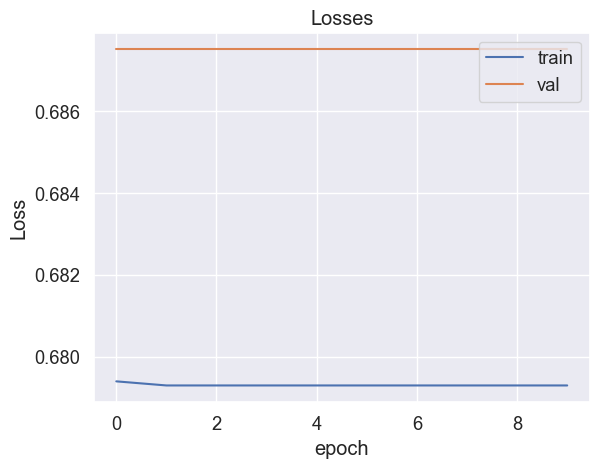

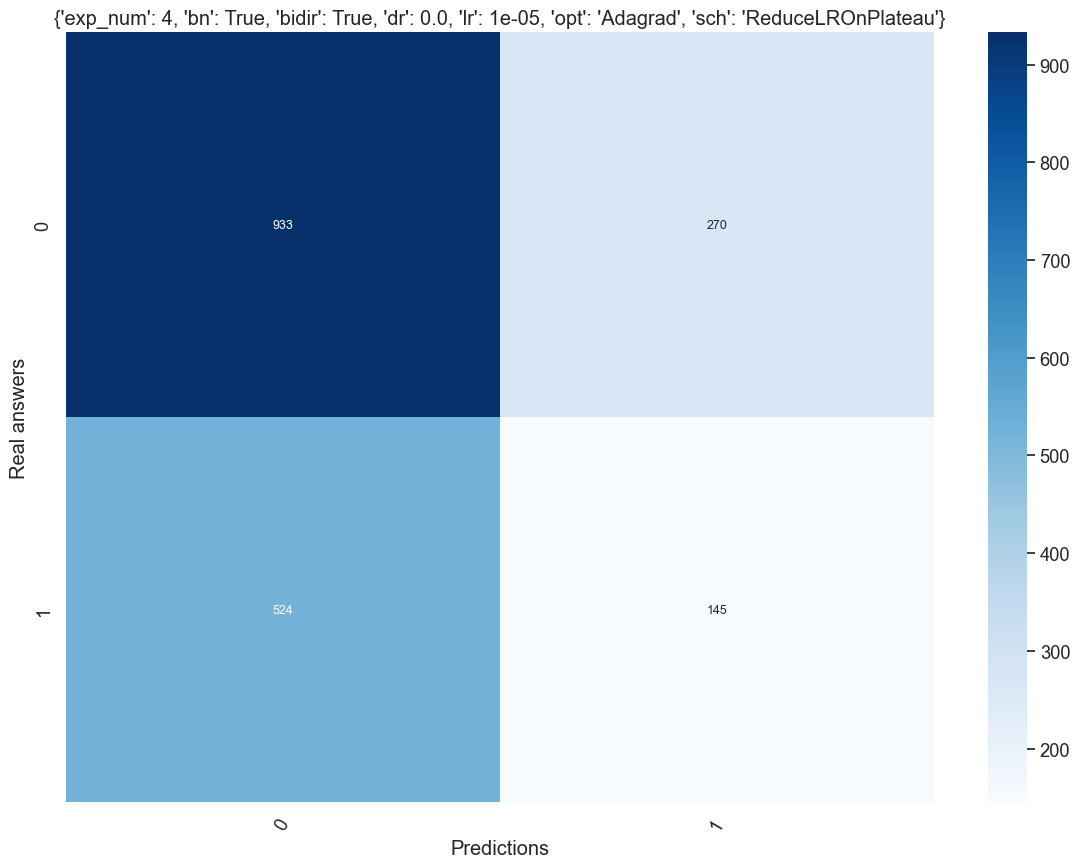

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1203
           1       0.35      0.22      0.27       669

    accuracy                           0.58      1872
   macro avg       0.49      0.50      0.48      1872
weighted avg       0.54      0.58      0.55      1872

{'algorithm': "{'exp_num': 4, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.35, 'recall': 0.22, 'f1_score': 0.27, 'f1_score_weighted': 0.55, 'accuracy': 0.58}
---------------------
{'exp_num': 5, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▎                                      | 1/10 [01:40<15:00, 100.08s/it]

Epoch: 0 | Train loss: 0.6796| Val loss: 0.6885


 20%|████████▊                                   | 2/10 [03:18<13:11, 98.95s/it]

Epoch: 1 | Train loss: 0.6795| Val loss: 0.6881


 30%|█████████████▏                              | 3/10 [04:57<11:32, 98.92s/it]

Epoch: 2 | Train loss: 0.6795| Val loss: 0.6882


 40%|█████████████████▌                          | 4/10 [06:35<09:51, 98.60s/it]

Epoch: 3 | Train loss: 0.6791| Val loss: 0.688


 50%|██████████████████████                      | 5/10 [08:13<08:11, 98.35s/it]

Epoch: 4 | Train loss: 0.6788| Val loss: 0.6878


 60%|██████████████████████████▍                 | 6/10 [09:50<06:32, 98.01s/it]

Epoch: 5 | Train loss: 0.6786| Val loss: 0.6877


 70%|██████████████████████████████▊             | 7/10 [11:27<04:52, 97.61s/it]

Epoch: 6 | Train loss: 0.6785| Val loss: 0.6874


 80%|███████████████████████████████████▏        | 8/10 [13:04<03:14, 97.46s/it]

Epoch: 7 | Train loss: 0.6783| Val loss: 0.6873


 90%|███████████████████████████████████████▌    | 9/10 [14:41<01:37, 97.48s/it]

Epoch: 8 | Train loss: 0.6781| Val loss: 0.6871


100%|███████████████████████████████████████████| 10/10 [16:19<00:00, 97.93s/it]

Epoch: 9 | Train loss: 0.6779| Val loss: 0.687


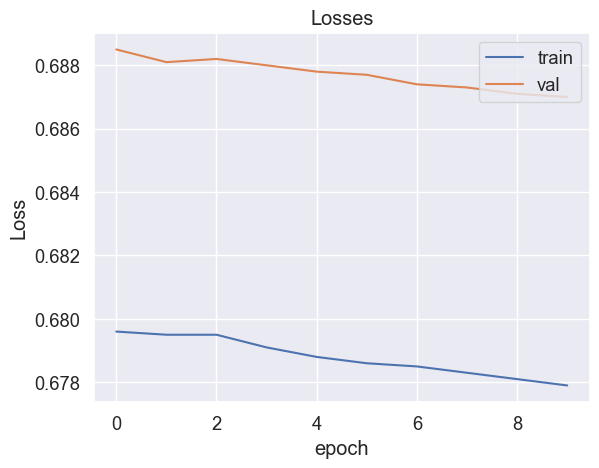

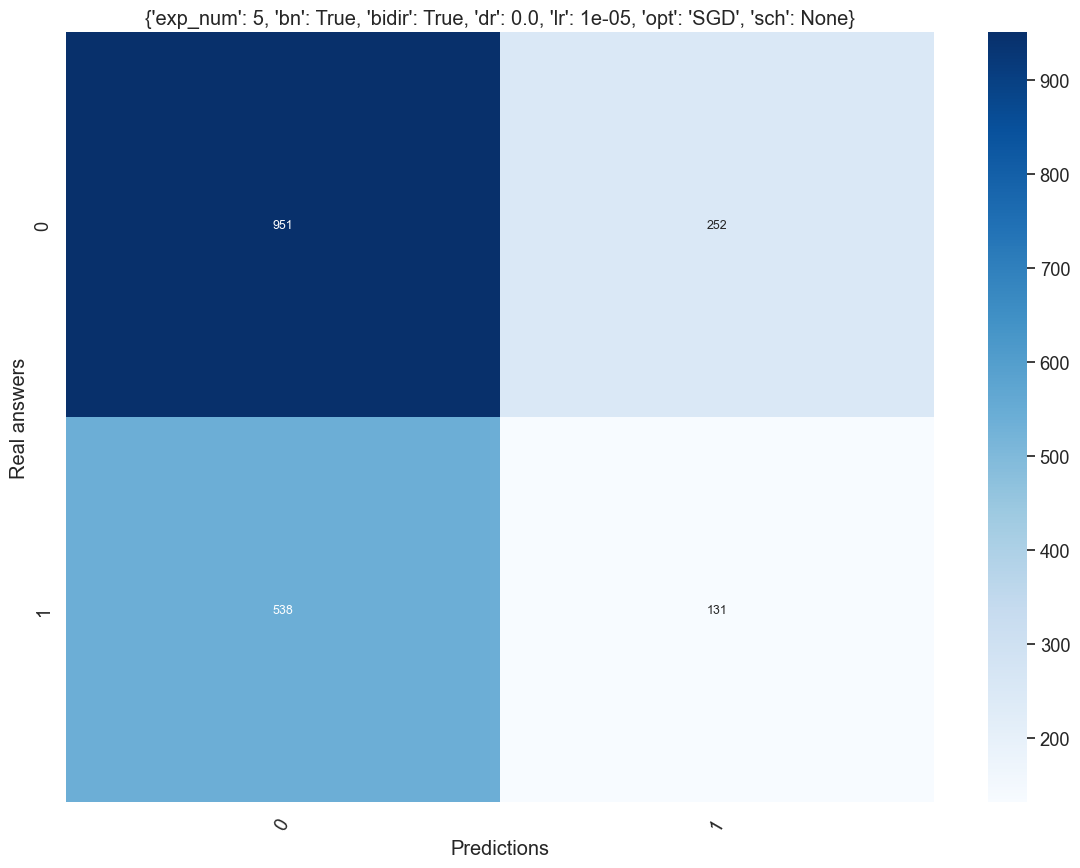

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1203
           1       0.34      0.20      0.25       669

    accuracy                           0.58      1872
   macro avg       0.49      0.49      0.48      1872
weighted avg       0.53      0.58      0.54      1872

{'algorithm': "{'exp_num': 5, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.34, 'recall': 0.2, 'f1_score': 0.25, 'f1_score_weighted': 0.54, 'accuracy': 0.58}
---------------------
{'exp_num': 6, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:33, 97.10s/it]

Epoch: 0 | Train loss: 0.6778| Val loss: 0.6869


 20%|████████▊                                   | 2/10 [03:14<12:56, 97.03s/it]

Epoch: 1 | Train loss: 0.6778| Val loss: 0.6869


 30%|█████████████▏                              | 3/10 [04:51<11:19, 97.13s/it]

Epoch: 2 | Train loss: 0.6778| Val loss: 0.6869


 40%|█████████████████▌                          | 4/10 [06:28<09:43, 97.23s/it]

Epoch: 3 | Train loss: 0.6778| Val loss: 0.6869


 50%|██████████████████████                      | 5/10 [08:06<08:06, 97.31s/it]

Epoch: 4 | Train loss: 0.6778| Val loss: 0.6869


 60%|██████████████████████████▍                 | 6/10 [09:42<06:27, 96.96s/it]

Epoch: 5 | Train loss: 0.6778| Val loss: 0.6869


 70%|██████████████████████████████▊             | 7/10 [11:18<04:49, 96.58s/it]

Epoch: 6 | Train loss: 0.6778| Val loss: 0.6869


 80%|███████████████████████████████████▏        | 8/10 [12:54<03:12, 96.38s/it]

Epoch: 7 | Train loss: 0.6778| Val loss: 0.6869


 90%|███████████████████████████████████████▌    | 9/10 [14:29<01:36, 96.13s/it]

Epoch: 8 | Train loss: 0.6778| Val loss: 0.6869


100%|███████████████████████████████████████████| 10/10 [16:04<00:00, 96.48s/it]

Epoch: 9 | Train loss: 0.6778| Val loss: 0.6869


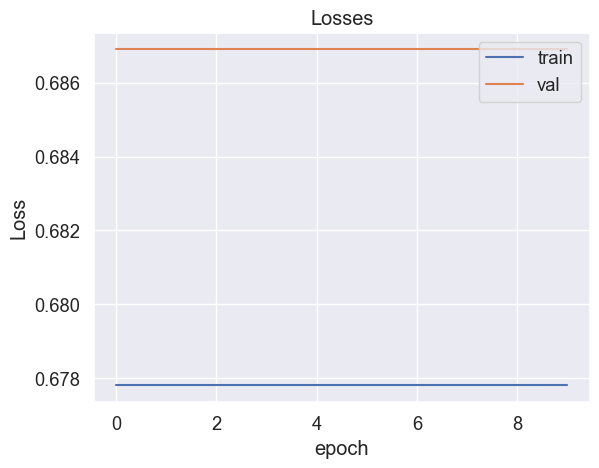

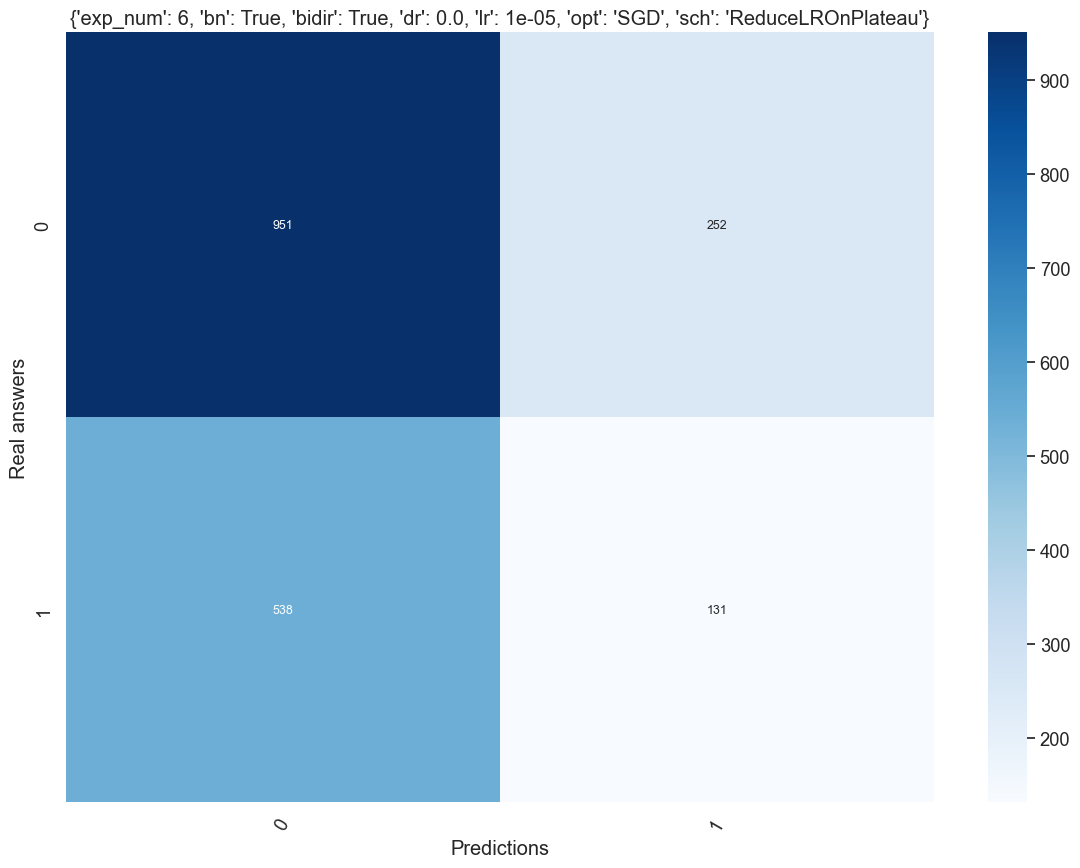

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1203
           1       0.34      0.20      0.25       669

    accuracy                           0.58      1872
   macro avg       0.49      0.49      0.48      1872
weighted avg       0.53      0.58      0.54      1872

{'algorithm': "{'exp_num': 6, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.34, 'recall': 0.2, 'f1_score': 0.25, 'f1_score_weighted': 0.54, 'accuracy': 0.58}
---------------------
{'exp_num': 7, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:36<14:30, 96.70s/it]

Epoch: 0 | Train loss: 0.7308| Val loss: 0.7298


 20%|████████▊                                   | 2/10 [03:13<12:53, 96.63s/it]

Epoch: 1 | Train loss: 0.7127| Val loss: 0.7158


 30%|█████████████▏                              | 3/10 [04:50<11:19, 97.00s/it]

Epoch: 2 | Train loss: 0.7026| Val loss: 0.7071


 40%|█████████████████▌                          | 4/10 [06:27<09:42, 97.01s/it]

Epoch: 3 | Train loss: 0.6964| Val loss: 0.7012


 50%|██████████████████████                      | 5/10 [08:05<08:06, 97.26s/it]

Epoch: 4 | Train loss: 0.6924| Val loss: 0.6971


 60%|██████████████████████████▍                 | 6/10 [09:43<06:29, 97.37s/it]

Epoch: 5 | Train loss: 0.6893| Val loss: 0.6936


 70%|██████████████████████████████▊             | 7/10 [11:20<04:52, 97.39s/it]

Epoch: 6 | Train loss: 0.6867| Val loss: 0.691


 80%|███████████████████████████████████▏        | 8/10 [12:58<03:15, 97.55s/it]

Epoch: 7 | Train loss: 0.6848| Val loss: 0.689


 90%|███████████████████████████████████████▌    | 9/10 [14:36<01:37, 97.78s/it]

Epoch: 8 | Train loss: 0.6831| Val loss: 0.6873


100%|███████████████████████████████████████████| 10/10 [16:14<00:00, 97.48s/it]

Epoch: 9 | Train loss: 0.6817| Val loss: 0.6858


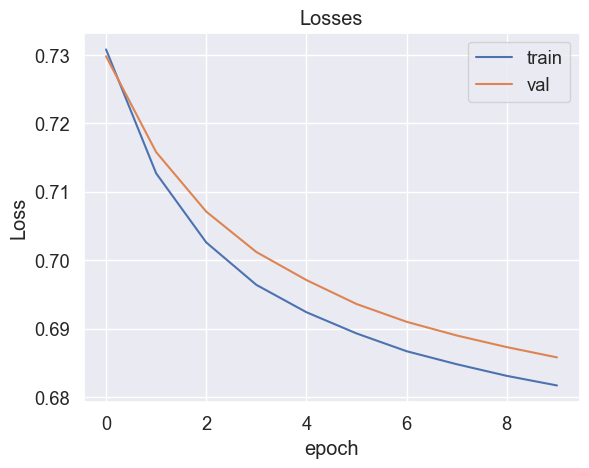

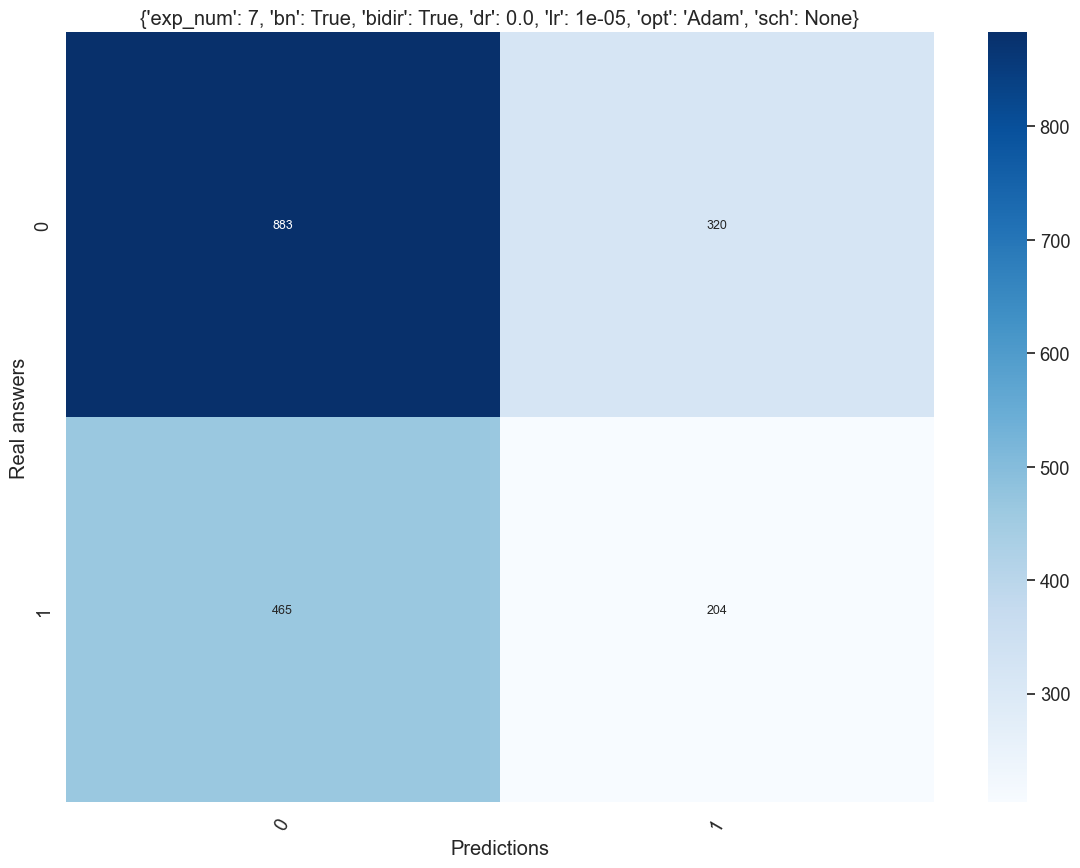

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1203
           1       0.39      0.30      0.34       669

    accuracy                           0.58      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.56      0.58      0.57      1872

{'algorithm': "{'exp_num': 7, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.39, 'recall': 0.3, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.58}
---------------------
{'exp_num': 8, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:38<14:46, 98.46s/it]

Epoch: 0 | Train loss: 0.6805| Val loss: 0.6857


 20%|████████▊                                   | 2/10 [03:17<13:09, 98.70s/it]

Epoch: 1 | Train loss: 0.6804| Val loss: 0.6857


 30%|█████████████▏                              | 3/10 [04:56<11:31, 98.75s/it]

Epoch: 2 | Train loss: 0.6804| Val loss: 0.6857


 40%|█████████████████▏                         | 4/10 [06:41<10:09, 101.51s/it]

Epoch: 3 | Train loss: 0.6804| Val loss: 0.6857


 50%|█████████████████████▌                     | 5/10 [08:26<08:33, 102.67s/it]

Epoch: 4 | Train loss: 0.6804| Val loss: 0.6857


 60%|█████████████████████████▊                 | 6/10 [10:04<06:43, 100.99s/it]

Epoch: 5 | Train loss: 0.6804| Val loss: 0.6857


 70%|██████████████████████████████             | 7/10 [11:43<05:00, 100.24s/it]

Epoch: 6 | Train loss: 0.6804| Val loss: 0.6857


 80%|██████████████████████████████████▍        | 8/10 [13:27<03:23, 101.66s/it]

Epoch: 7 | Train loss: 0.6804| Val loss: 0.6857


 90%|██████████████████████████████████████▋    | 9/10 [15:12<01:42, 102.61s/it]

Epoch: 8 | Train loss: 0.6804| Val loss: 0.6857


100%|██████████████████████████████████████████| 10/10 [16:56<00:00, 101.64s/it]

Epoch: 9 | Train loss: 0.6804| Val loss: 0.6857


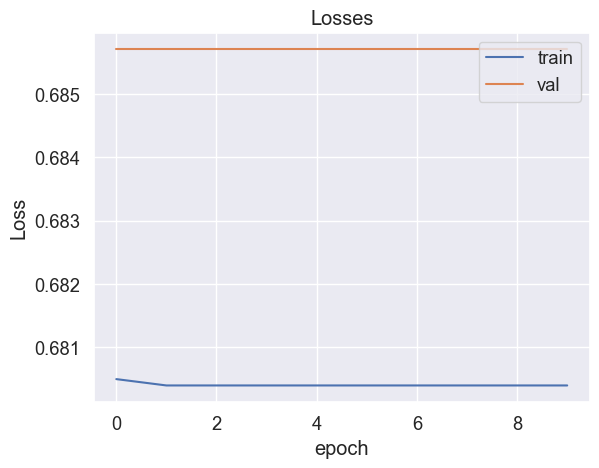

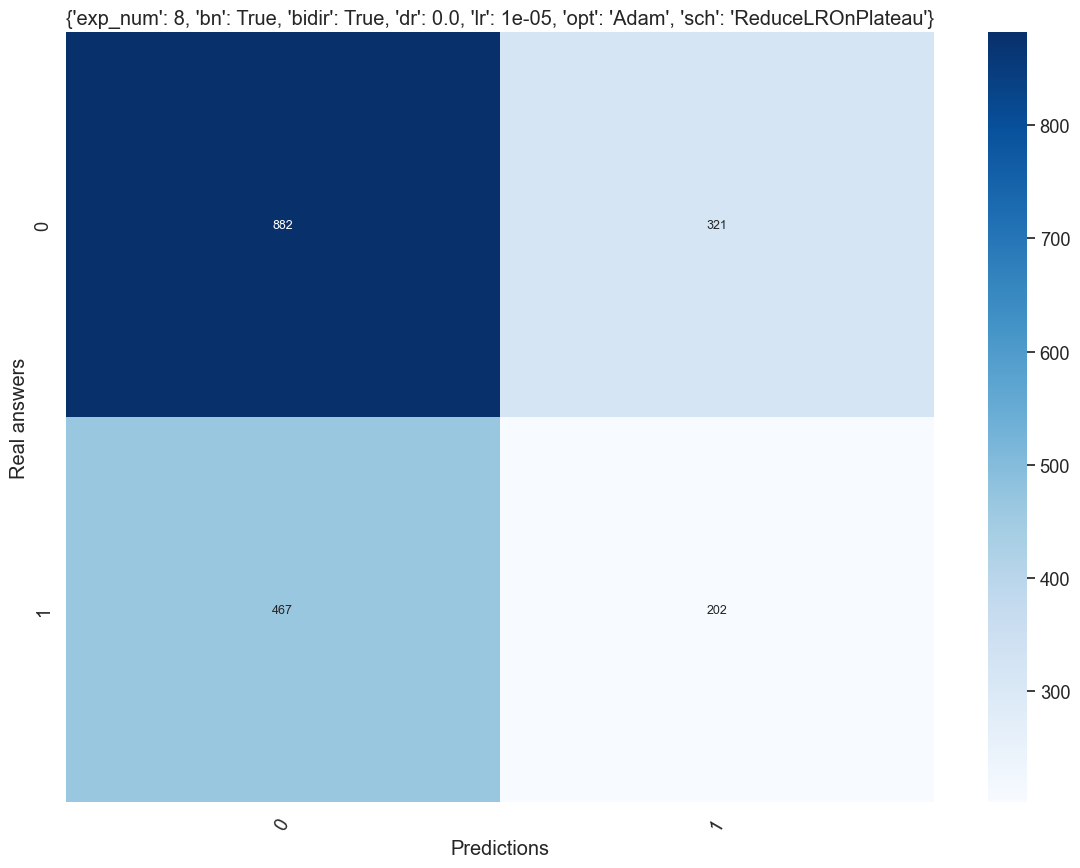

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1203
           1       0.39      0.30      0.34       669

    accuracy                           0.58      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.56      0.58      0.57      1872

{'algorithm': "{'exp_num': 8, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.39, 'recall': 0.3, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.58}
---------------------
{'exp_num': 9, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:50, 98.90s/it]

Epoch: 0 | Train loss: 0.6804| Val loss: 0.6856


 20%|████████▊                                   | 2/10 [03:17<13:09, 98.70s/it]

Epoch: 1 | Train loss: 0.6803| Val loss: 0.6855


 30%|████████████▉                              | 3/10 [05:09<12:15, 105.01s/it]

Epoch: 2 | Train loss: 0.6802| Val loss: 0.6855


 40%|█████████████████▏                         | 4/10 [07:02<10:47, 107.84s/it]

Epoch: 3 | Train loss: 0.6802| Val loss: 0.6854


 50%|█████████████████████▌                     | 5/10 [08:47<08:54, 106.87s/it]

Epoch: 4 | Train loss: 0.6802| Val loss: 0.6854


 60%|█████████████████████████▊                 | 6/10 [10:33<07:05, 106.50s/it]

Epoch: 5 | Train loss: 0.6801| Val loss: 0.6854


 70%|██████████████████████████████             | 7/10 [12:11<05:11, 103.93s/it]

Epoch: 6 | Train loss: 0.6801| Val loss: 0.6854


 80%|██████████████████████████████████▍        | 8/10 [13:50<03:24, 102.16s/it]

Epoch: 7 | Train loss: 0.6801| Val loss: 0.6853


 90%|██████████████████████████████████████▋    | 9/10 [15:35<01:43, 103.13s/it]

Epoch: 8 | Train loss: 0.6801| Val loss: 0.6853


100%|██████████████████████████████████████████| 10/10 [17:14<00:00, 103.43s/it]

Epoch: 9 | Train loss: 0.68| Val loss: 0.6853


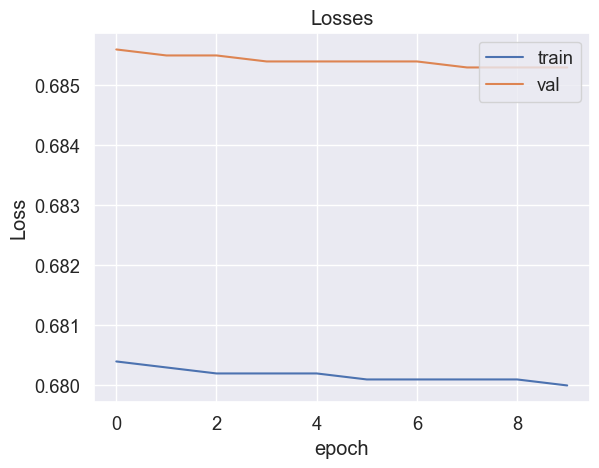

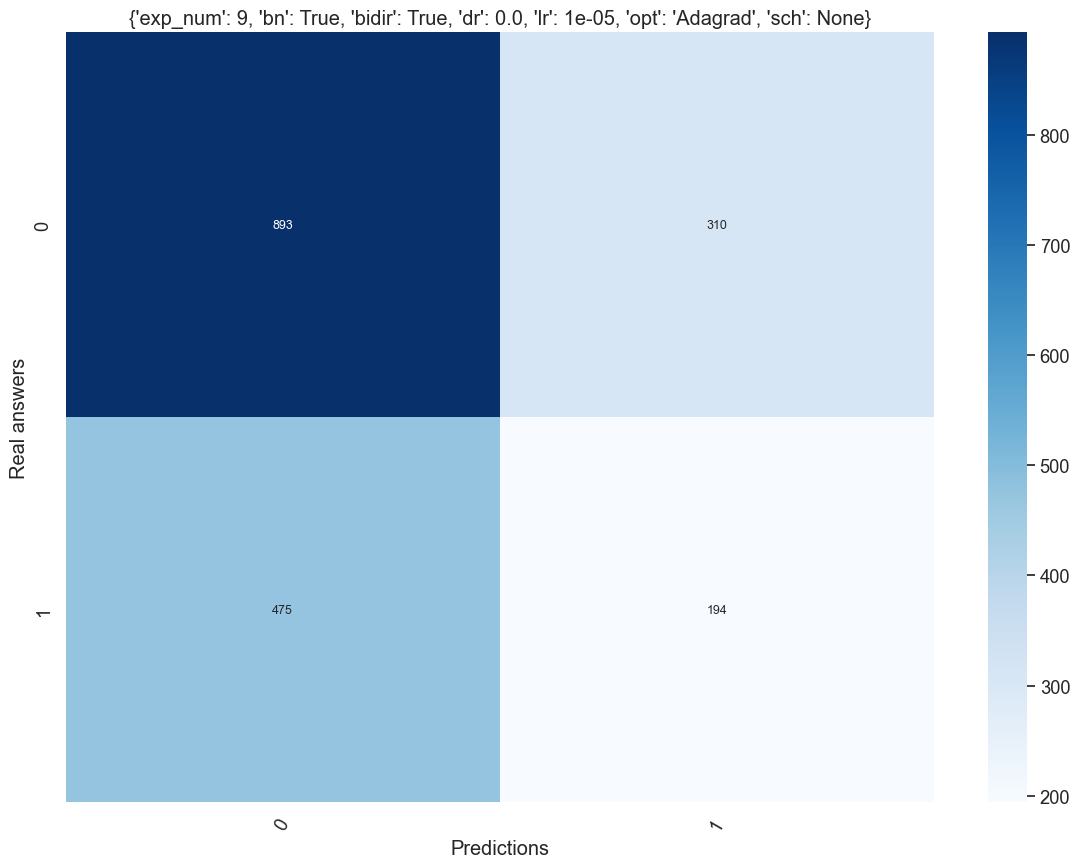

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1203
           1       0.38      0.29      0.33       669

    accuracy                           0.58      1872
   macro avg       0.52      0.52      0.51      1872
weighted avg       0.56      0.58      0.56      1872

{'algorithm': "{'exp_num': 9, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.38, 'recall': 0.29, 'f1_score': 0.33, 'f1_score_weighted': 0.56, 'accuracy': 0.58}
---------------------
{'exp_num': 10, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:38<14:46, 98.54s/it]

Epoch: 0 | Train loss: 0.68| Val loss: 0.6853


 20%|████████▊                                   | 2/10 [03:17<13:11, 98.98s/it]

Epoch: 1 | Train loss: 0.68| Val loss: 0.6853


 30%|█████████████▏                              | 3/10 [04:57<11:34, 99.25s/it]

Epoch: 2 | Train loss: 0.68| Val loss: 0.6853


 40%|█████████████████▏                         | 4/10 [06:42<10:09, 101.60s/it]

Epoch: 3 | Train loss: 0.68| Val loss: 0.6853


 50%|█████████████████████▌                     | 5/10 [08:25<08:30, 102.14s/it]

Epoch: 4 | Train loss: 0.68| Val loss: 0.6853


 60%|█████████████████████████▊                 | 6/10 [10:04<06:43, 100.91s/it]

Epoch: 5 | Train loss: 0.68| Val loss: 0.6853


 70%|██████████████████████████████             | 7/10 [11:42<05:00, 100.05s/it]

Epoch: 6 | Train loss: 0.68| Val loss: 0.6853


 80%|██████████████████████████████████▍        | 8/10 [13:25<03:22, 101.09s/it]

Epoch: 7 | Train loss: 0.68| Val loss: 0.6853


 90%|██████████████████████████████████████▋    | 9/10 [15:04<01:40, 100.30s/it]

Epoch: 8 | Train loss: 0.68| Val loss: 0.6853


100%|██████████████████████████████████████████| 10/10 [16:43<00:00, 100.34s/it]

Epoch: 9 | Train loss: 0.68| Val loss: 0.6853


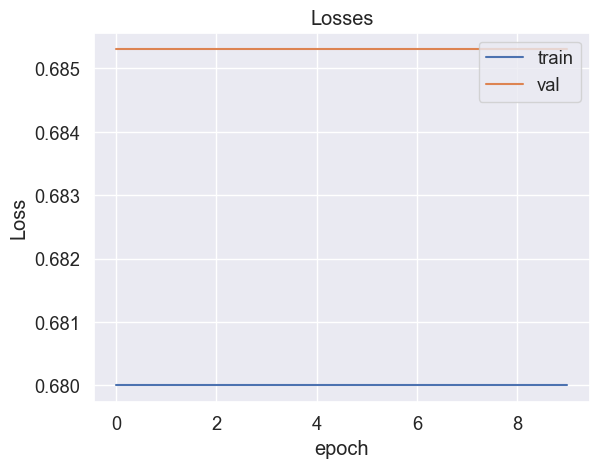

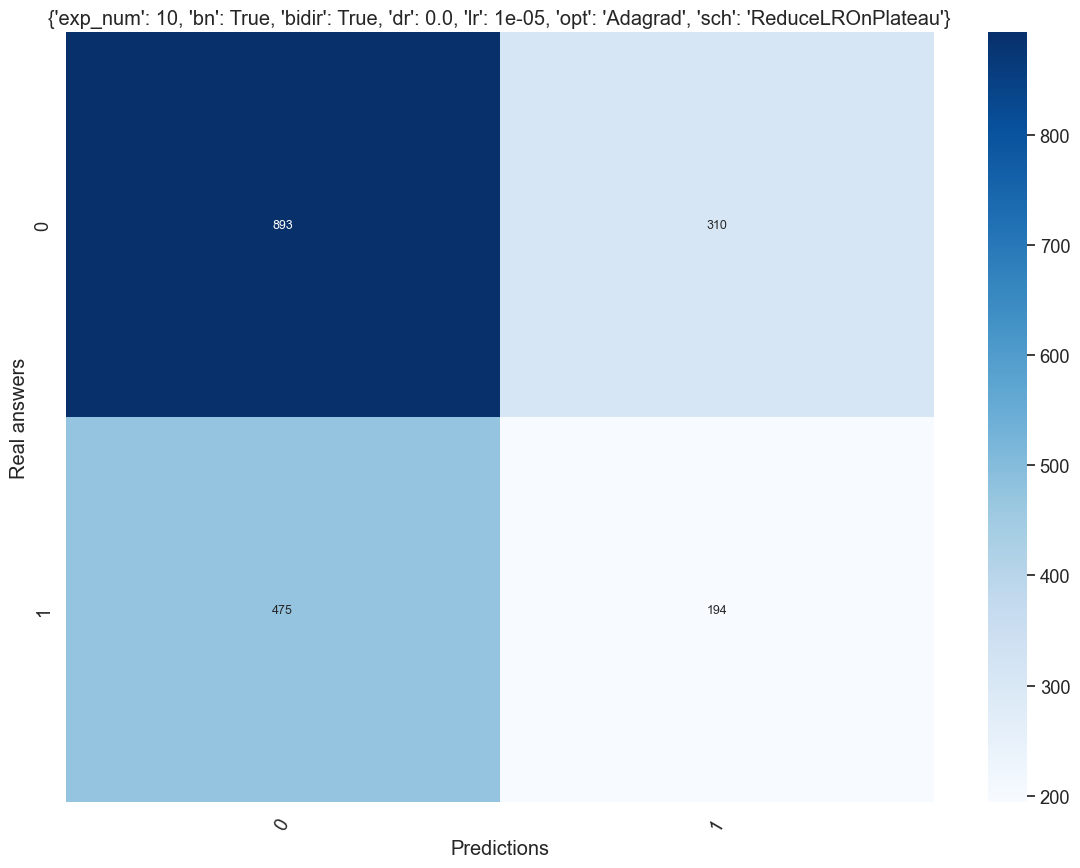

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1203
           1       0.38      0.29      0.33       669

    accuracy                           0.58      1872
   macro avg       0.52      0.52      0.51      1872
weighted avg       0.56      0.58      0.56      1872

{'algorithm': "{'exp_num': 10, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.38, 'recall': 0.29, 'f1_score': 0.33, 'f1_score_weighted': 0.56, 'accuracy': 0.58}
---------------------
{'exp_num': 11, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▍                                       | 1/10 [01:37<14:41, 97.95s/it]

Epoch: 0 | Train loss: 0.6803| Val loss: 0.6852


 20%|████████▊                                   | 2/10 [03:15<13:02, 97.87s/it]

Epoch: 1 | Train loss: 0.6801| Val loss: 0.685


 30%|█████████████▏                              | 3/10 [04:53<11:24, 97.82s/it]

Epoch: 2 | Train loss: 0.6799| Val loss: 0.685


 40%|█████████████████▌                          | 4/10 [06:31<09:46, 97.80s/it]

Epoch: 3 | Train loss: 0.6795| Val loss: 0.6851


 50%|██████████████████████                      | 5/10 [08:09<08:09, 97.82s/it]

Epoch: 4 | Train loss: 0.6792| Val loss: 0.6848


 60%|██████████████████████████▍                 | 6/10 [09:46<06:30, 97.57s/it]

Epoch: 5 | Train loss: 0.679| Val loss: 0.6846


 70%|██████████████████████████████▊             | 7/10 [11:23<04:52, 97.54s/it]

Epoch: 6 | Train loss: 0.6788| Val loss: 0.6847


 80%|███████████████████████████████████▏        | 8/10 [13:01<03:15, 97.50s/it]

Epoch: 7 | Train loss: 0.6787| Val loss: 0.6842


 90%|███████████████████████████████████████▌    | 9/10 [14:38<01:37, 97.49s/it]

Epoch: 8 | Train loss: 0.6786| Val loss: 0.6845


100%|███████████████████████████████████████████| 10/10 [16:15<00:00, 97.57s/it]

Epoch: 9 | Train loss: 0.6781| Val loss: 0.6844


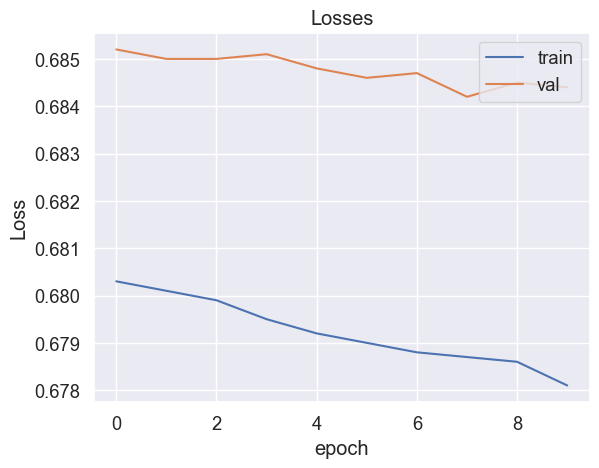

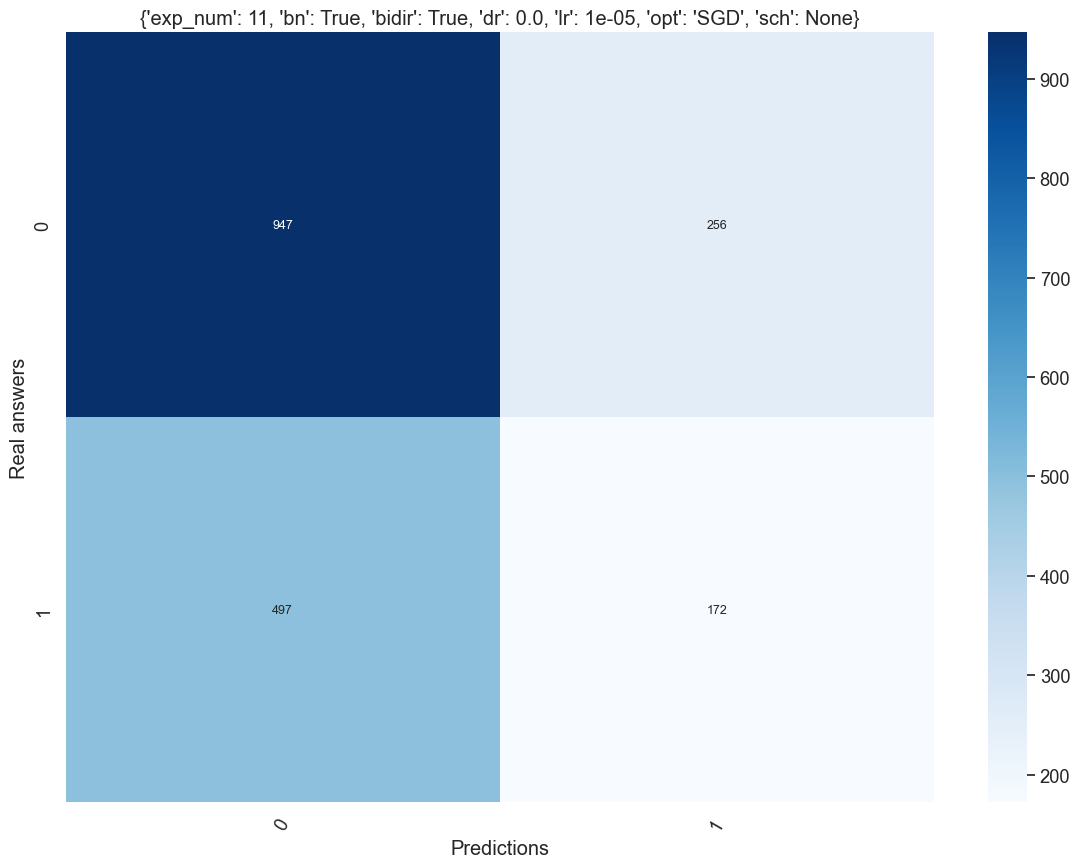

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1203
           1       0.40      0.26      0.31       669

    accuracy                           0.60      1872
   macro avg       0.53      0.52      0.51      1872
weighted avg       0.57      0.60      0.57      1872

{'algorithm': "{'exp_num': 11, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.4, 'recall': 0.26, 'f1_score': 0.31, 'f1_score_weighted': 0.57, 'accuracy': 0.6}
---------------------
{'exp_num': 12, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:38, 97.60s/it]

Epoch: 0 | Train loss: 0.6781| Val loss: 0.6842


 20%|████████▊                                   | 2/10 [03:14<12:59, 97.47s/it]

Epoch: 1 | Train loss: 0.678| Val loss: 0.6842


 30%|█████████████▏                              | 3/10 [04:52<11:22, 97.44s/it]

Epoch: 2 | Train loss: 0.678| Val loss: 0.6842


 40%|█████████████████▌                          | 4/10 [06:30<09:45, 97.64s/it]

Epoch: 3 | Train loss: 0.678| Val loss: 0.6842


 50%|██████████████████████                      | 5/10 [08:08<08:08, 97.68s/it]

Epoch: 4 | Train loss: 0.678| Val loss: 0.6842


 60%|██████████████████████████▍                 | 6/10 [09:45<06:30, 97.58s/it]

Epoch: 5 | Train loss: 0.678| Val loss: 0.6842


 70%|██████████████████████████████▊             | 7/10 [11:22<04:52, 97.46s/it]

Epoch: 6 | Train loss: 0.678| Val loss: 0.6842


 80%|███████████████████████████████████▏        | 8/10 [12:59<03:14, 97.32s/it]

Epoch: 7 | Train loss: 0.678| Val loss: 0.6842


 90%|███████████████████████████████████████▌    | 9/10 [14:36<01:37, 97.18s/it]

Epoch: 8 | Train loss: 0.678| Val loss: 0.6842


100%|███████████████████████████████████████████| 10/10 [16:15<00:00, 97.52s/it]

Epoch: 9 | Train loss: 0.678| Val loss: 0.6842


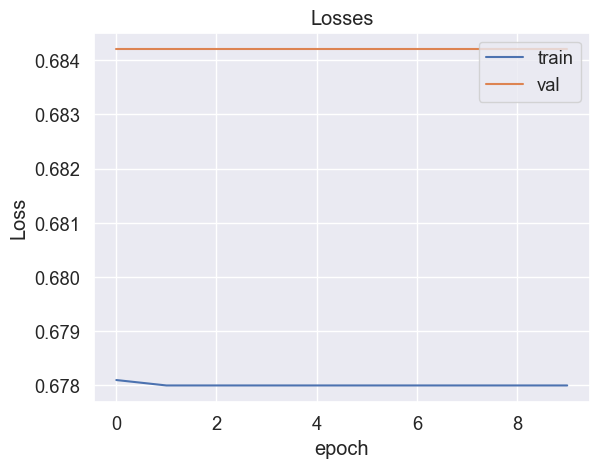

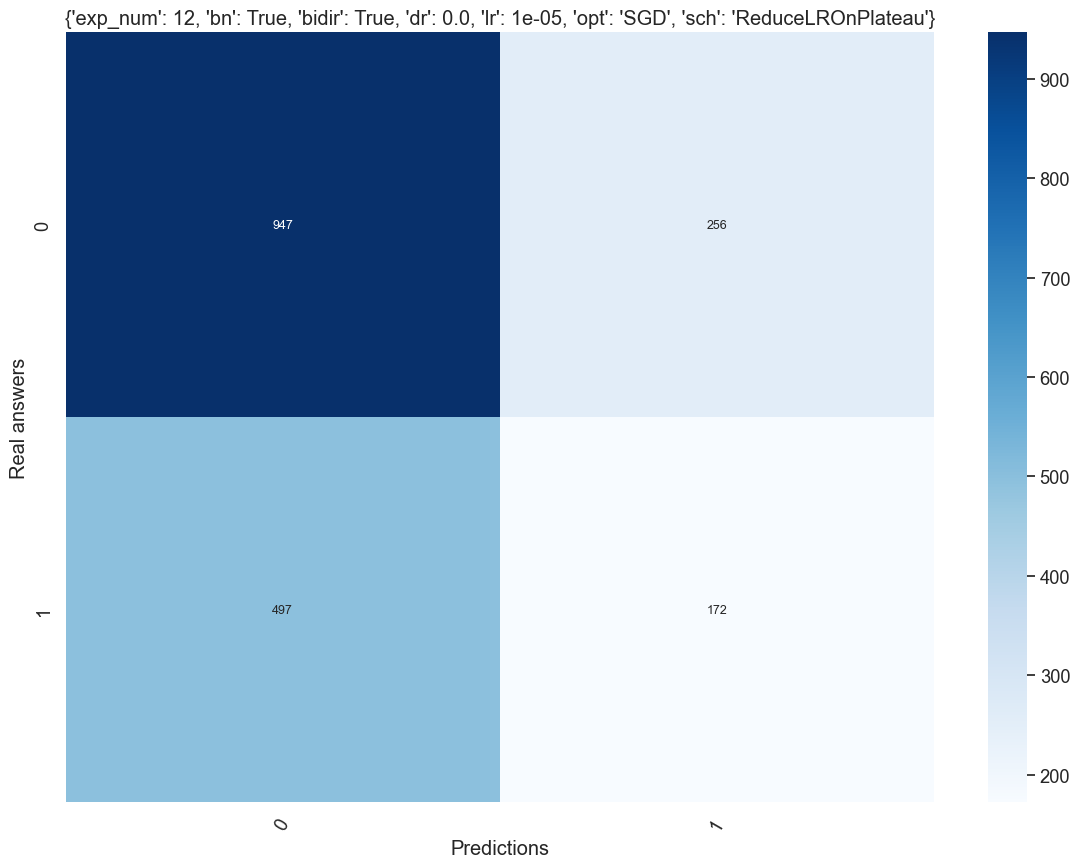

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1203
           1       0.40      0.26      0.31       669

    accuracy                           0.60      1872
   macro avg       0.53      0.52      0.51      1872
weighted avg       0.57      0.60      0.57      1872

{'algorithm': "{'exp_num': 12, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.4, 'recall': 0.26, 'f1_score': 0.31, 'f1_score_weighted': 0.57, 'accuracy': 0.6}
---------------------
{'exp_num': 13, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:39<14:52, 99.18s/it]

Epoch: 0 | Train loss: 0.76| Val loss: 0.7472


 20%|████████▌                                  | 2/10 [03:23<13:38, 102.32s/it]

Epoch: 1 | Train loss: 0.738| Val loss: 0.7344


 30%|█████████████▏                              | 3/10 [05:00<11:39, 99.95s/it]

Epoch: 2 | Train loss: 0.725| Val loss: 0.7247


 40%|█████████████████▌                          | 4/10 [06:39<09:56, 99.46s/it]

Epoch: 3 | Train loss: 0.7164| Val loss: 0.7169


 50%|██████████████████████                      | 5/10 [08:17<08:14, 98.99s/it]

Epoch: 4 | Train loss: 0.7106| Val loss: 0.7136


 60%|██████████████████████████▍                 | 6/10 [09:56<06:35, 98.90s/it]

Epoch: 5 | Train loss: 0.7045| Val loss: 0.7088


 70%|██████████████████████████████▊             | 7/10 [11:34<04:56, 98.72s/it]

Epoch: 6 | Train loss: 0.7005| Val loss: 0.7048


 80%|███████████████████████████████████▏        | 8/10 [13:13<03:17, 98.61s/it]

Epoch: 7 | Train loss: 0.6969| Val loss: 0.7013


 90%|███████████████████████████████████████▌    | 9/10 [14:53<01:39, 99.27s/it]

Epoch: 8 | Train loss: 0.6942| Val loss: 0.6989


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.07s/it]

Epoch: 9 | Train loss: 0.6912| Val loss: 0.6962


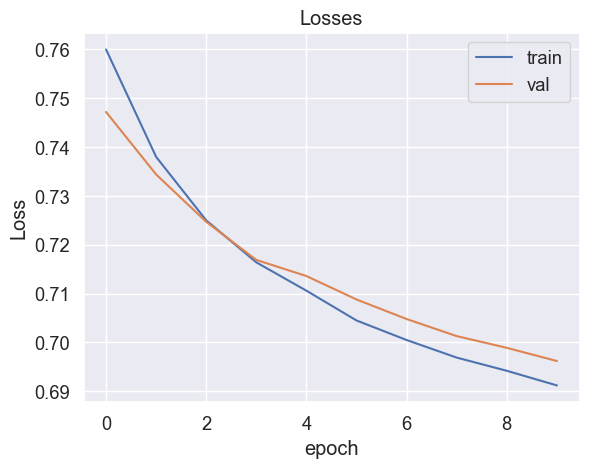

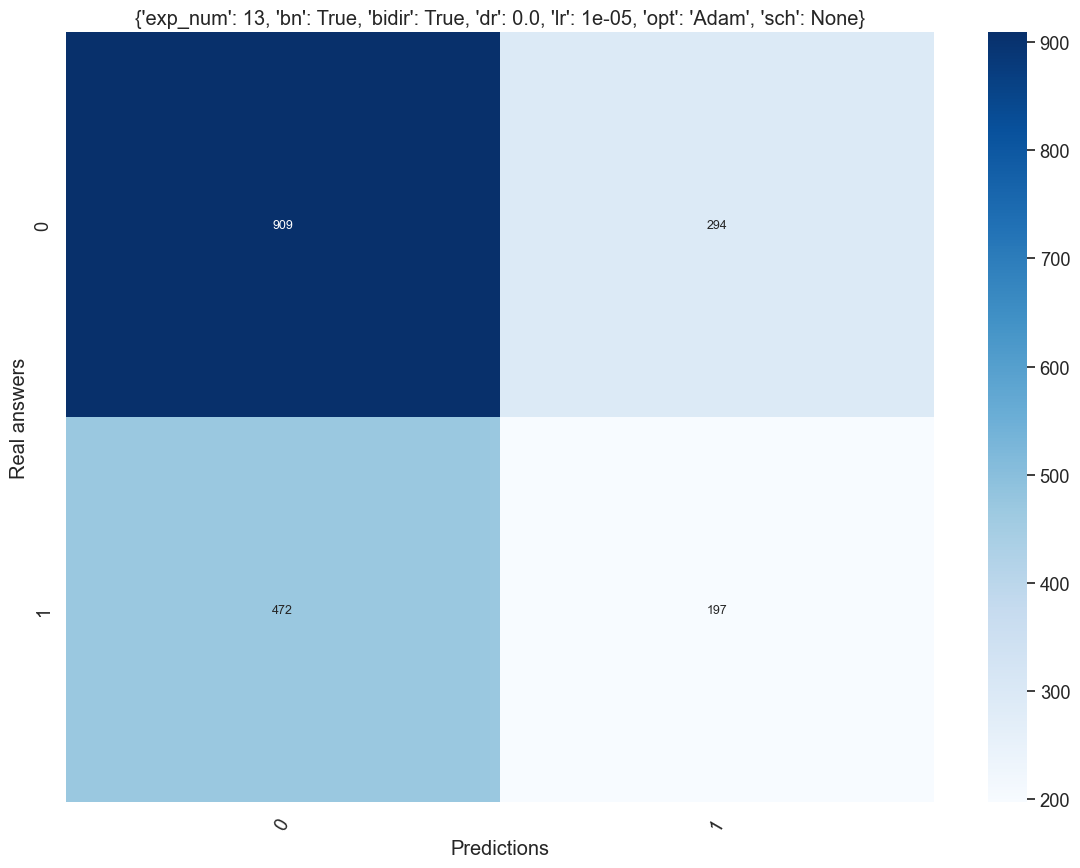

              precision    recall  f1-score   support

           0       0.66      0.76      0.70      1203
           1       0.40      0.29      0.34       669

    accuracy                           0.59      1872
   macro avg       0.53      0.53      0.52      1872
weighted avg       0.57      0.59      0.57      1872

{'algorithm': "{'exp_num': 13, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.4, 'recall': 0.29, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.59}
---------------------
{'exp_num': 14, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:40, 97.83s/it]

Epoch: 0 | Train loss: 0.6891| Val loss: 0.696


 20%|████████▊                                   | 2/10 [03:14<12:58, 97.32s/it]

Epoch: 1 | Train loss: 0.689| Val loss: 0.696


 30%|█████████████▏                              | 3/10 [04:53<11:24, 97.78s/it]

Epoch: 2 | Train loss: 0.689| Val loss: 0.696


 40%|█████████████████▌                          | 4/10 [06:31<09:47, 97.99s/it]

Epoch: 3 | Train loss: 0.689| Val loss: 0.696


 50%|██████████████████████                      | 5/10 [08:09<08:09, 97.99s/it]

Epoch: 4 | Train loss: 0.689| Val loss: 0.696


 60%|██████████████████████████▍                 | 6/10 [09:48<06:33, 98.27s/it]

Epoch: 5 | Train loss: 0.689| Val loss: 0.696


 70%|██████████████████████████████▊             | 7/10 [11:27<04:55, 98.48s/it]

Epoch: 6 | Train loss: 0.689| Val loss: 0.696


 80%|███████████████████████████████████▏        | 8/10 [13:05<03:16, 98.33s/it]

Epoch: 7 | Train loss: 0.689| Val loss: 0.696


 90%|███████████████████████████████████████▌    | 9/10 [14:46<01:39, 99.19s/it]

Epoch: 8 | Train loss: 0.689| Val loss: 0.6959


100%|███████████████████████████████████████████| 10/10 [16:25<00:00, 98.52s/it]

Epoch: 9 | Train loss: 0.689| Val loss: 0.6959


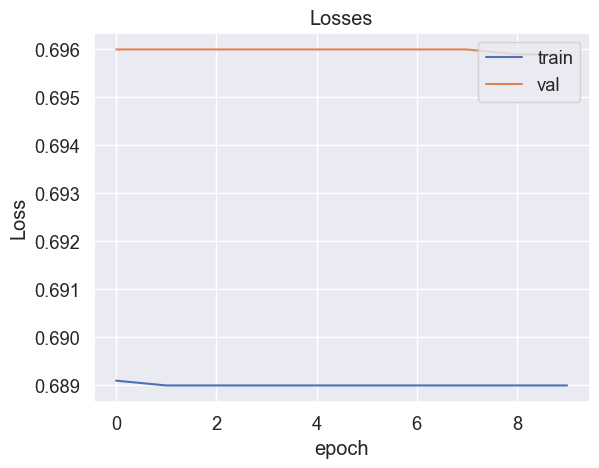

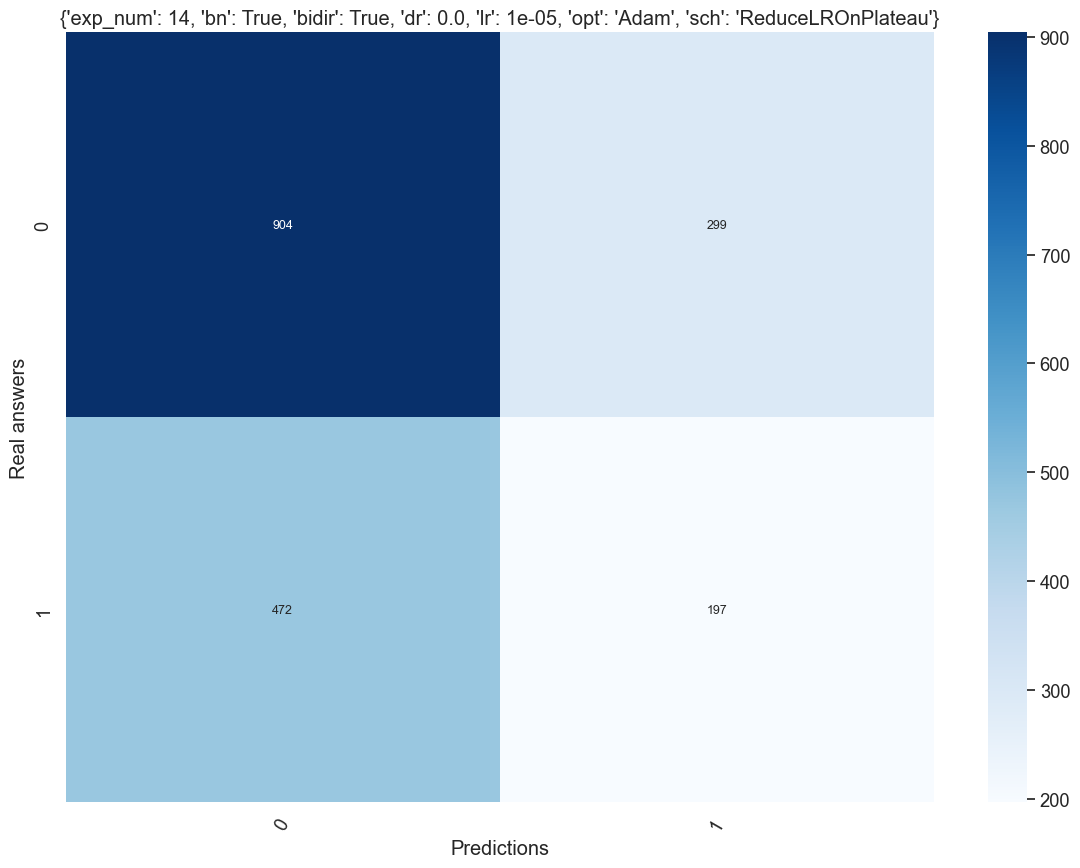

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1203
           1       0.40      0.29      0.34       669

    accuracy                           0.59      1872
   macro avg       0.53      0.52      0.52      1872
weighted avg       0.56      0.59      0.57      1872

{'algorithm': "{'exp_num': 14, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.4, 'recall': 0.29, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.59}
---------------------
{'exp_num': 15, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▍                                       | 1/10 [01:39<14:55, 99.49s/it]

Epoch: 0 | Train loss: 0.689| Val loss: 0.6958


 20%|████████▊                                   | 2/10 [03:18<13:13, 99.15s/it]

Epoch: 1 | Train loss: 0.6887| Val loss: 0.6957


 30%|█████████████▏                              | 3/10 [04:57<11:33, 99.07s/it]

Epoch: 2 | Train loss: 0.6886| Val loss: 0.6956


 40%|█████████████████▌                          | 4/10 [06:36<09:54, 99.08s/it]

Epoch: 3 | Train loss: 0.6886| Val loss: 0.6956


 50%|██████████████████████                      | 5/10 [08:15<08:15, 99.13s/it]

Epoch: 4 | Train loss: 0.6885| Val loss: 0.6955


 60%|██████████████████████████▍                 | 6/10 [09:54<06:36, 99.04s/it]

Epoch: 5 | Train loss: 0.6884| Val loss: 0.6955


 70%|██████████████████████████████▊             | 7/10 [11:33<04:56, 98.92s/it]

Epoch: 6 | Train loss: 0.6884| Val loss: 0.6954


 80%|███████████████████████████████████▏        | 8/10 [13:12<03:17, 98.95s/it]

Epoch: 7 | Train loss: 0.6883| Val loss: 0.6954


 90%|███████████████████████████████████████▌    | 9/10 [14:51<01:38, 98.97s/it]

Epoch: 8 | Train loss: 0.6883| Val loss: 0.6954


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.04s/it]

Epoch: 9 | Train loss: 0.6883| Val loss: 0.6954


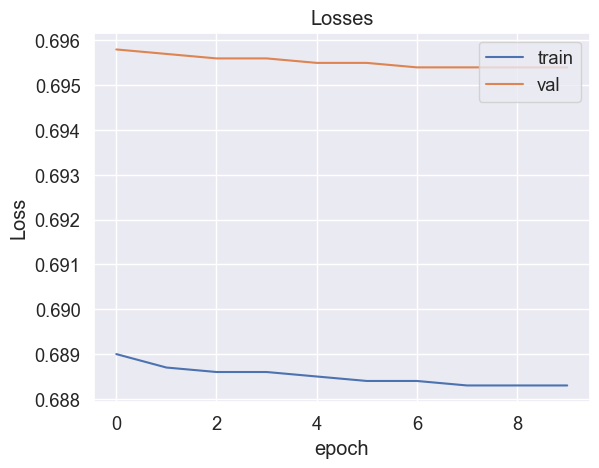

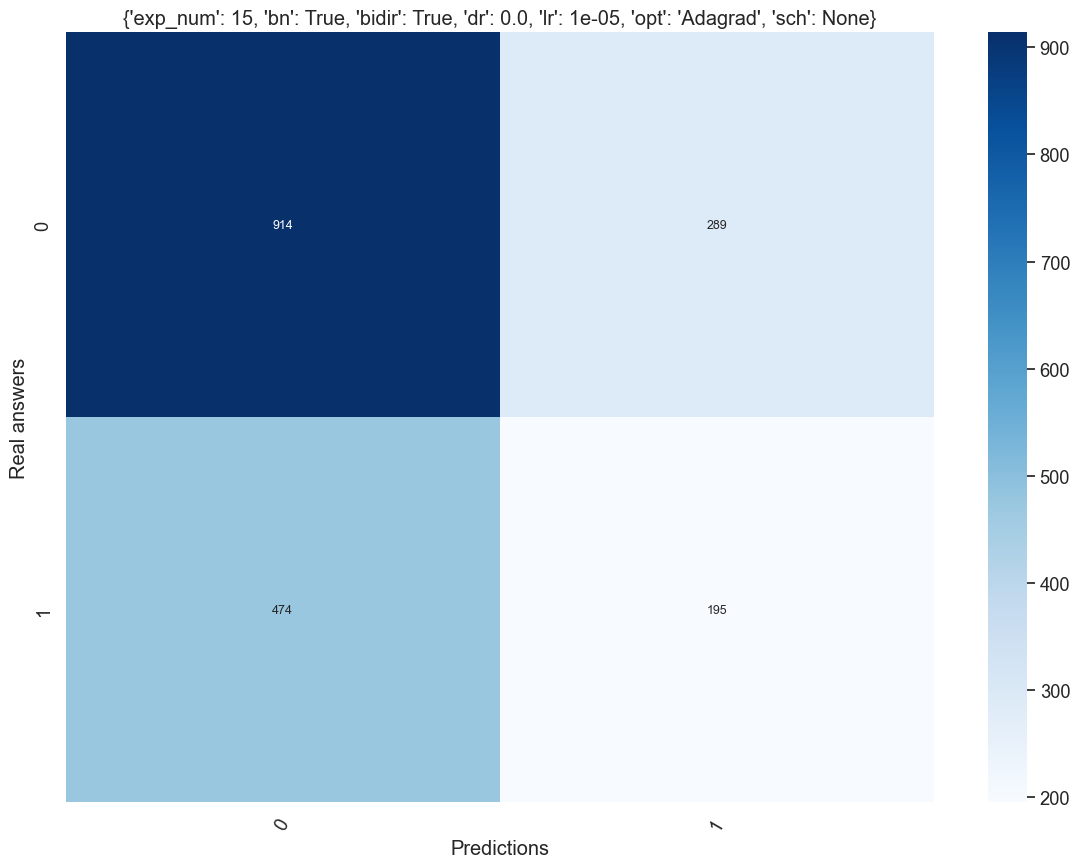

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1203
           1       0.40      0.29      0.34       669

    accuracy                           0.59      1872
   macro avg       0.53      0.53      0.52      1872
weighted avg       0.57      0.59      0.57      1872

{'algorithm': "{'exp_num': 15, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.4, 'recall': 0.29, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.59}
---------------------
{'exp_num': 16, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:38<14:48, 98.70s/it]

Epoch: 0 | Train loss: 0.6882| Val loss: 0.6954


 20%|████████▊                                   | 2/10 [03:17<13:10, 98.77s/it]

Epoch: 1 | Train loss: 0.6882| Val loss: 0.6954


 30%|█████████████▏                              | 3/10 [04:55<11:30, 98.63s/it]

Epoch: 2 | Train loss: 0.6882| Val loss: 0.6954


 40%|█████████████████▌                          | 4/10 [06:34<09:52, 98.78s/it]

Epoch: 3 | Train loss: 0.6882| Val loss: 0.6954


 50%|██████████████████████                      | 5/10 [08:14<08:14, 98.87s/it]

Epoch: 4 | Train loss: 0.6882| Val loss: 0.6954


 60%|██████████████████████████▍                 | 6/10 [09:52<06:35, 98.91s/it]

Epoch: 5 | Train loss: 0.6882| Val loss: 0.6954


 70%|██████████████████████████████▊             | 7/10 [11:31<04:56, 98.93s/it]

Epoch: 6 | Train loss: 0.6882| Val loss: 0.6954


 80%|███████████████████████████████████▏        | 8/10 [13:10<03:17, 98.91s/it]

Epoch: 7 | Train loss: 0.6882| Val loss: 0.6954


 90%|███████████████████████████████████████▌    | 9/10 [14:49<01:38, 98.89s/it]

Epoch: 8 | Train loss: 0.6882| Val loss: 0.6954


100%|███████████████████████████████████████████| 10/10 [16:28<00:00, 98.81s/it]

Epoch: 9 | Train loss: 0.6882| Val loss: 0.6954


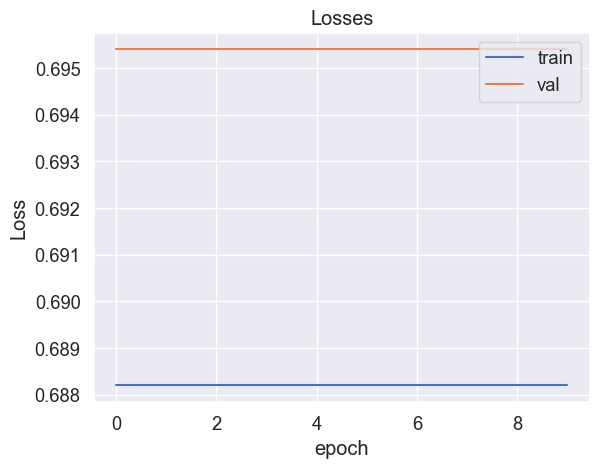

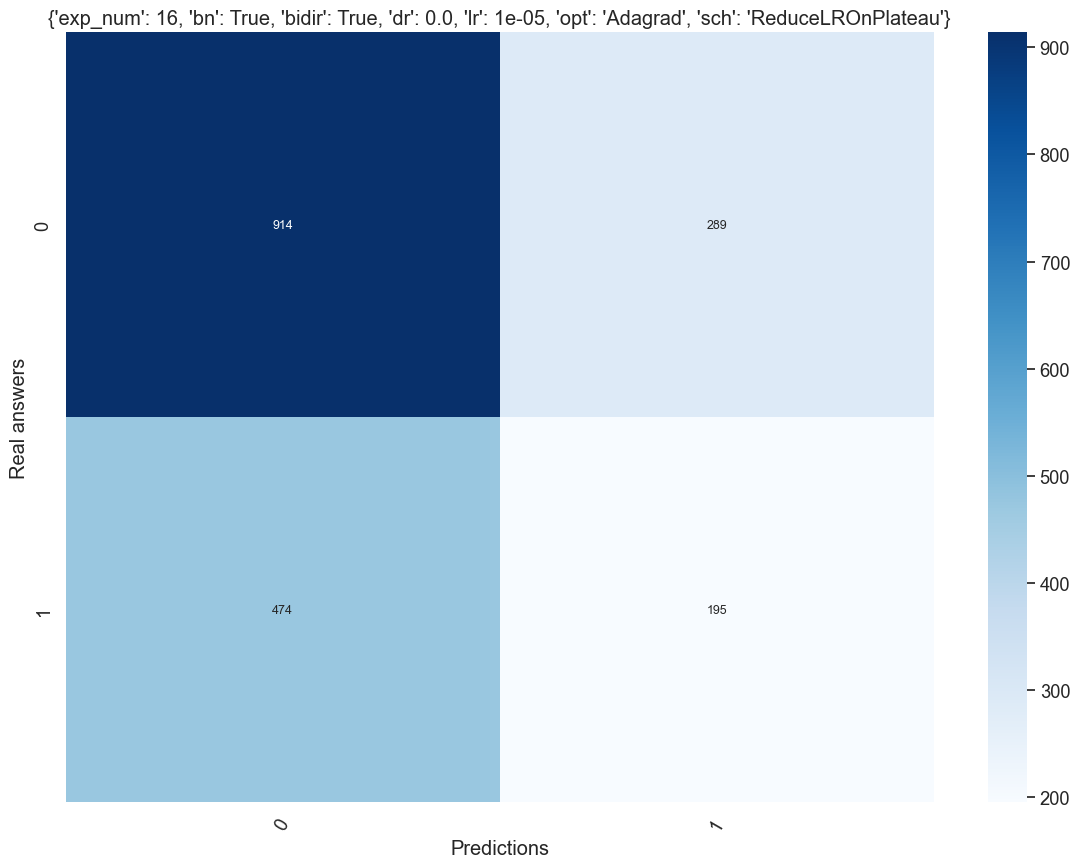

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1203
           1       0.40      0.29      0.34       669

    accuracy                           0.59      1872
   macro avg       0.53      0.53      0.52      1872
weighted avg       0.57      0.59      0.57      1872

{'algorithm': "{'exp_num': 16, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.4, 'recall': 0.29, 'f1_score': 0.34, 'f1_score_weighted': 0.57, 'accuracy': 0.59}
---------------------
{'exp_num': 17, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:42, 98.04s/it]

Epoch: 0 | Train loss: 0.6904| Val loss: 0.6923


 20%|████████▊                                   | 2/10 [03:16<13:04, 98.11s/it]

Epoch: 1 | Train loss: 0.6906| Val loss: 0.6922


 30%|█████████████▏                              | 3/10 [04:54<11:27, 98.16s/it]

Epoch: 2 | Train loss: 0.6898| Val loss: 0.6938


 40%|█████████████████▌                          | 4/10 [06:31<09:47, 97.89s/it]

Epoch: 3 | Train loss: 0.6901| Val loss: 0.6947


 50%|██████████████████████                      | 5/10 [08:09<08:08, 97.77s/it]

Epoch: 4 | Train loss: 0.6899| Val loss: 0.6942


 60%|██████████████████████████▍                 | 6/10 [09:46<06:30, 97.65s/it]

Epoch: 5 | Train loss: 0.6905| Val loss: 0.6929


 70%|██████████████████████████████▊             | 7/10 [11:24<04:52, 97.58s/it]

Epoch: 6 | Train loss: 0.6897| Val loss: 0.6928


 80%|███████████████████████████████████▏        | 8/10 [13:01<03:15, 97.51s/it]

Epoch: 7 | Train loss: 0.6887| Val loss: 0.6914


 90%|███████████████████████████████████████▌    | 9/10 [14:39<01:37, 97.62s/it]

Epoch: 8 | Train loss: 0.688| Val loss: 0.6925


100%|███████████████████████████████████████████| 10/10 [16:16<00:00, 97.68s/it]

Epoch: 9 | Train loss: 0.6884| Val loss: 0.6924


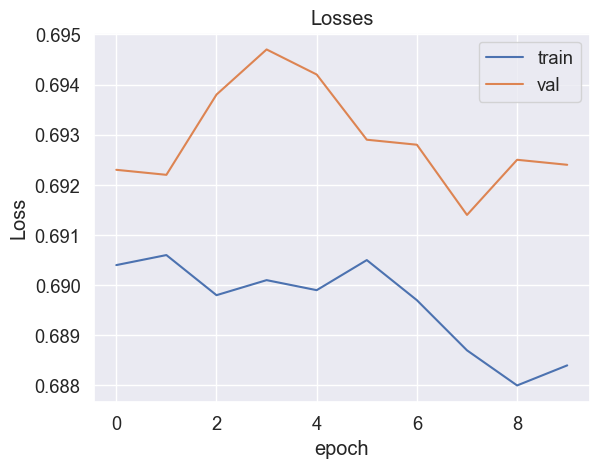

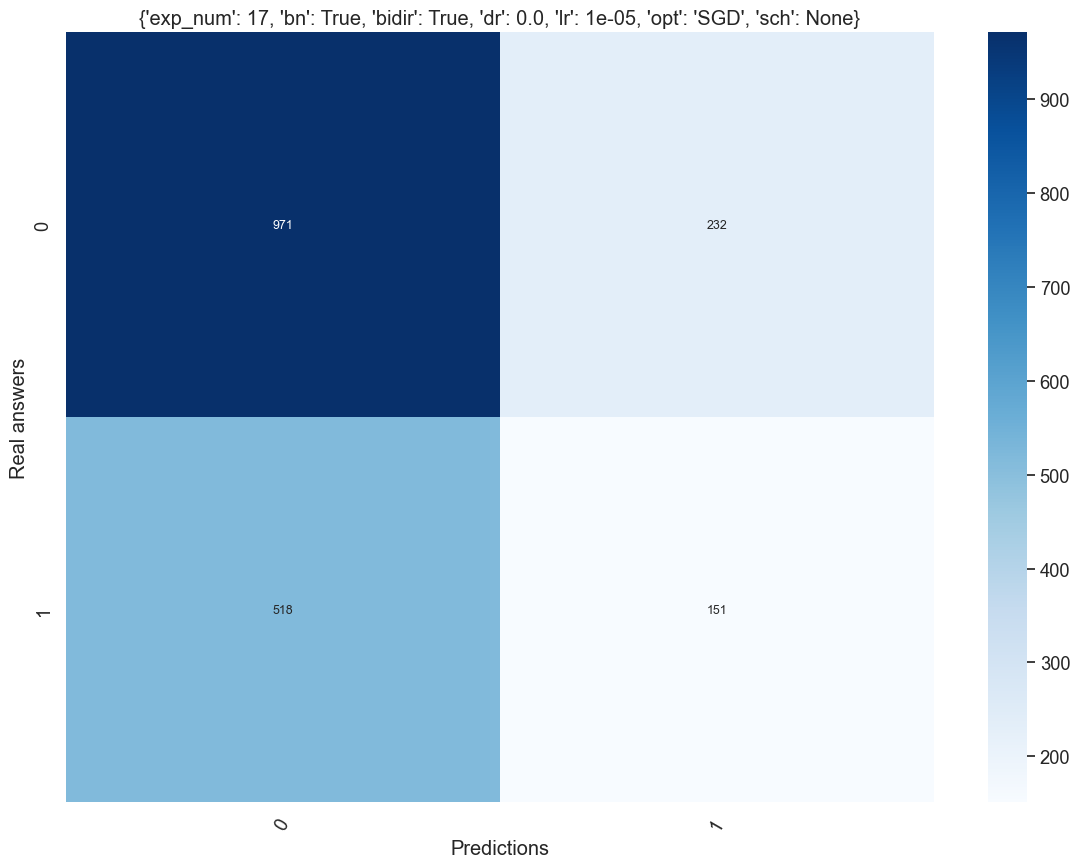

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1203
           1       0.39      0.23      0.29       669

    accuracy                           0.60      1872
   macro avg       0.52      0.52      0.50      1872
weighted avg       0.56      0.60      0.57      1872

{'algorithm': "{'exp_num': 17, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.39, 'recall': 0.23, 'f1_score': 0.29, 'f1_score_weighted': 0.57, 'accuracy': 0.6}
---------------------
{'exp_num': 18, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:38, 97.64s/it]

Epoch: 0 | Train loss: 0.6863| Val loss: 0.692


 20%|████████▊                                   | 2/10 [03:15<13:02, 97.81s/it]

Epoch: 1 | Train loss: 0.6861| Val loss: 0.692


 30%|█████████████▏                              | 3/10 [04:53<11:24, 97.74s/it]

Epoch: 2 | Train loss: 0.6861| Val loss: 0.692


 40%|█████████████████▌                          | 4/10 [06:30<09:44, 97.46s/it]

Epoch: 3 | Train loss: 0.6861| Val loss: 0.692


 50%|██████████████████████                      | 5/10 [08:07<08:06, 97.33s/it]

Epoch: 4 | Train loss: 0.6861| Val loss: 0.692


 60%|██████████████████████████▍                 | 6/10 [09:44<06:29, 97.30s/it]

Epoch: 5 | Train loss: 0.6861| Val loss: 0.692


 70%|██████████████████████████████▊             | 7/10 [11:21<04:51, 97.21s/it]

Epoch: 6 | Train loss: 0.6861| Val loss: 0.692


 80%|███████████████████████████████████▏        | 8/10 [12:58<03:14, 97.07s/it]

Epoch: 7 | Train loss: 0.6861| Val loss: 0.692


 90%|███████████████████████████████████████▌    | 9/10 [14:34<01:36, 96.90s/it]

Epoch: 8 | Train loss: 0.6861| Val loss: 0.692


100%|███████████████████████████████████████████| 10/10 [16:12<00:00, 97.27s/it]

Epoch: 9 | Train loss: 0.6861| Val loss: 0.692


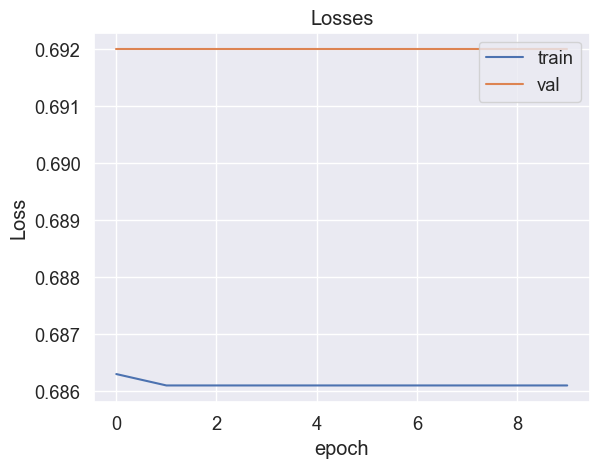

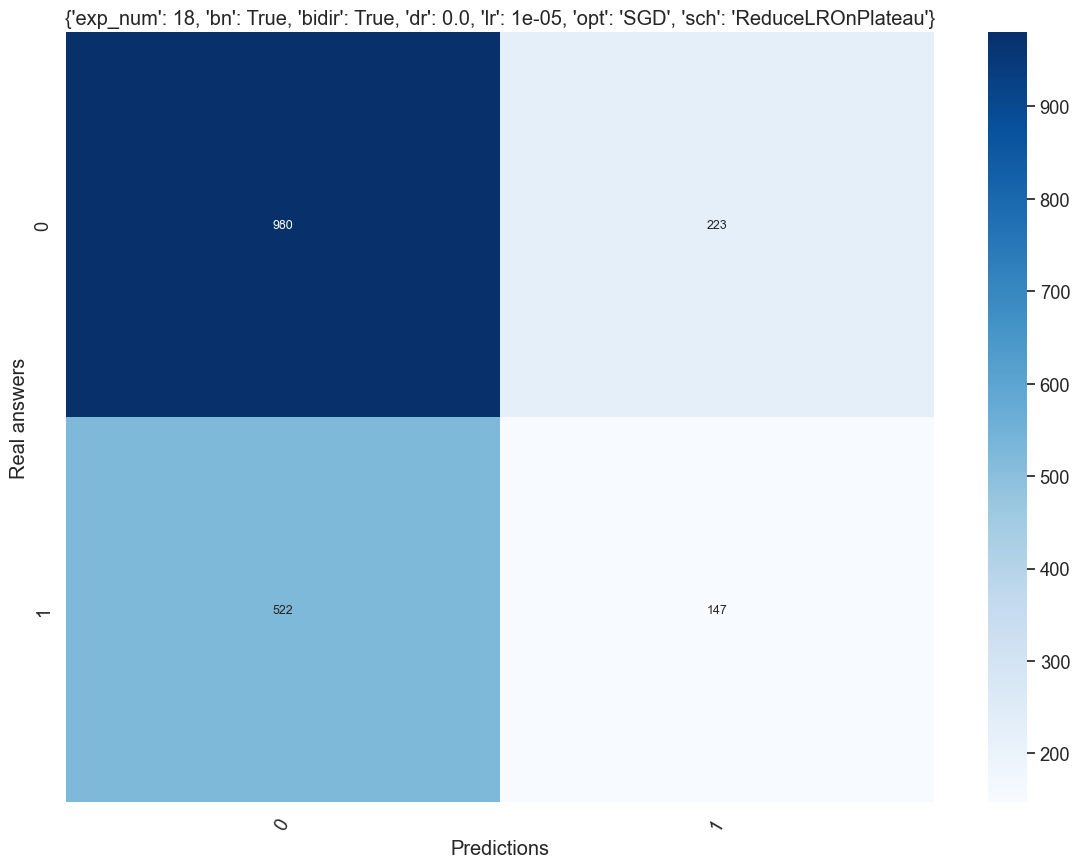

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1203
           1       0.40      0.22      0.28       669

    accuracy                           0.60      1872
   macro avg       0.52      0.52      0.50      1872
weighted avg       0.56      0.60      0.57      1872

{'algorithm': "{'exp_num': 18, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.4, 'recall': 0.22, 'f1_score': 0.28, 'f1_score_weighted': 0.57, 'accuracy': 0.6}
---------------------
{'exp_num': 19, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:46, 98.50s/it]

Epoch: 0 | Train loss: 0.9431| Val loss: 0.9197


 20%|████████▊                                   | 2/10 [03:17<13:08, 98.50s/it]

Epoch: 1 | Train loss: 0.9237| Val loss: 0.9181


 30%|█████████████▏                              | 3/10 [04:55<11:29, 98.51s/it]

Epoch: 2 | Train loss: 0.907| Val loss: 0.9061


 40%|█████████████████▌                          | 4/10 [06:34<09:51, 98.53s/it]

Epoch: 3 | Train loss: 0.8871| Val loss: 0.897


 50%|██████████████████████                      | 5/10 [08:11<08:10, 98.17s/it]

Epoch: 4 | Train loss: 0.8664| Val loss: 0.8619


 60%|██████████████████████████▍                 | 6/10 [09:49<06:32, 98.02s/it]

Epoch: 5 | Train loss: 0.8455| Val loss: 0.8449


 70%|██████████████████████████████▊             | 7/10 [11:26<04:53, 97.84s/it]

Epoch: 6 | Train loss: 0.8289| Val loss: 0.8281


 80%|███████████████████████████████████▏        | 8/10 [13:04<03:15, 97.84s/it]

Epoch: 7 | Train loss: 0.8155| Val loss: 0.8138


 90%|███████████████████████████████████████▌    | 9/10 [14:42<01:37, 97.70s/it]

Epoch: 8 | Train loss: 0.7997| Val loss: 0.7974


100%|███████████████████████████████████████████| 10/10 [16:19<00:00, 97.94s/it]

Epoch: 9 | Train loss: 0.7875| Val loss: 0.7753


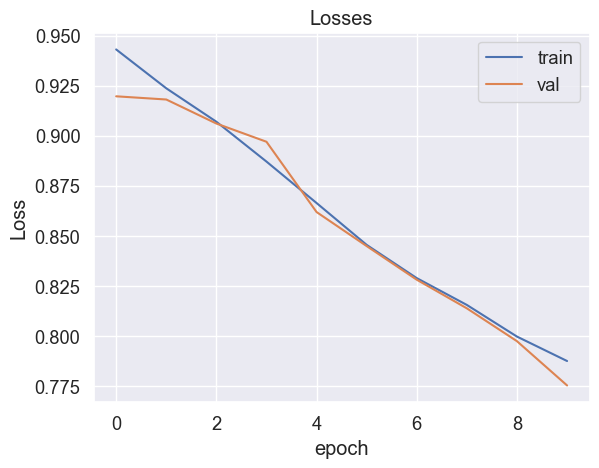

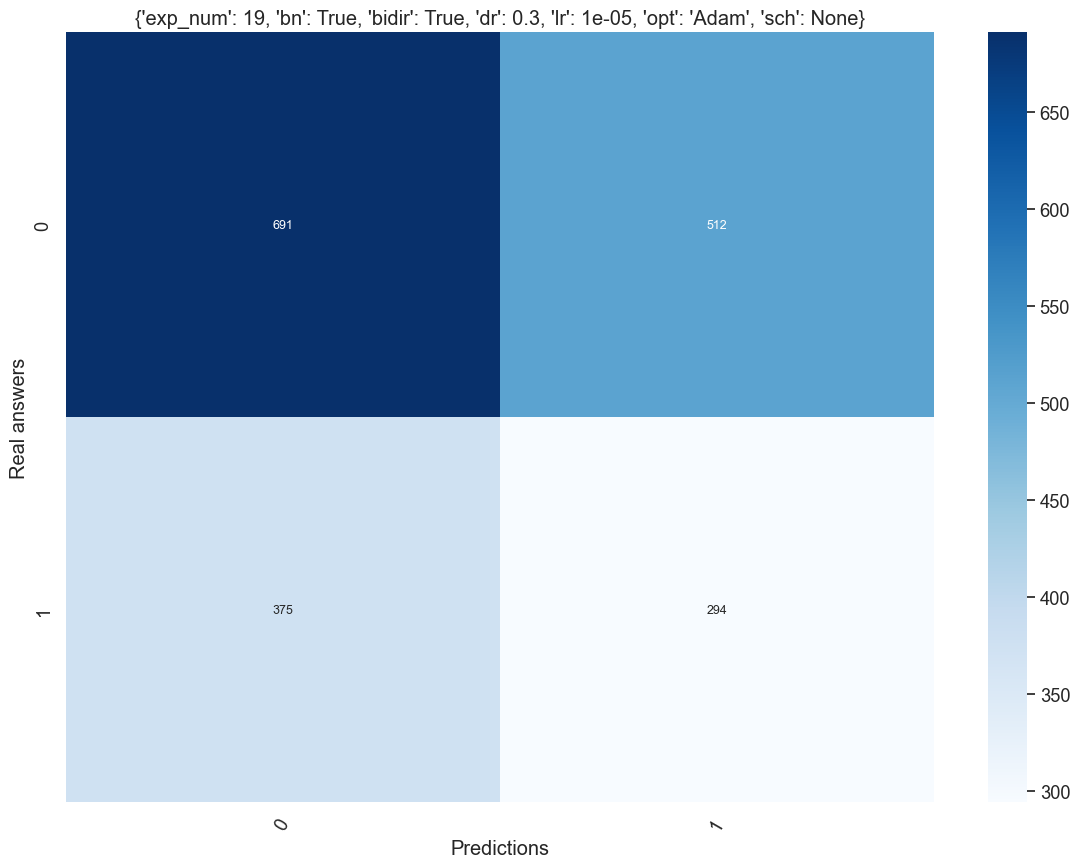

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1203
           1       0.36      0.44      0.40       669

    accuracy                           0.53      1872
   macro avg       0.51      0.51      0.50      1872
weighted avg       0.55      0.53      0.53      1872

{'algorithm': "{'exp_num': 19, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.36, 'recall': 0.44, 'f1_score': 0.4, 'f1_score_weighted': 0.53, 'accuracy': 0.53}
---------------------
{'exp_num': 20, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:40, 97.84s/it]

Epoch: 0 | Train loss: 0.7785| Val loss: 0.7961


 20%|████████▊                                   | 2/10 [03:17<13:10, 98.83s/it]

Epoch: 1 | Train loss: 0.7718| Val loss: 0.774


 30%|█████████████▏                              | 3/10 [04:56<11:31, 98.83s/it]

Epoch: 2 | Train loss: 0.7737| Val loss: 0.7759


 40%|█████████████████▌                          | 4/10 [06:35<09:53, 98.96s/it]

Epoch: 3 | Train loss: 0.7777| Val loss: 0.779


 50%|██████████████████████                      | 5/10 [08:13<08:14, 98.84s/it]

Epoch: 4 | Train loss: 0.7746| Val loss: 0.7798


 60%|██████████████████████████▍                 | 6/10 [09:52<06:35, 98.77s/it]

Epoch: 5 | Train loss: 0.7849| Val loss: 0.7721


 70%|██████████████████████████████▊             | 7/10 [11:31<04:56, 98.73s/it]

Epoch: 6 | Train loss: 0.7732| Val loss: 0.7934


 80%|███████████████████████████████████▏        | 8/10 [13:09<03:17, 98.59s/it]

Epoch: 7 | Train loss: 0.7744| Val loss: 0.7803


 90%|███████████████████████████████████████▌    | 9/10 [14:48<01:38, 98.63s/it]

Epoch: 8 | Train loss: 0.771| Val loss: 0.77


100%|███████████████████████████████████████████| 10/10 [16:27<00:00, 98.73s/it]

Epoch: 9 | Train loss: 0.7709| Val loss: 0.7928


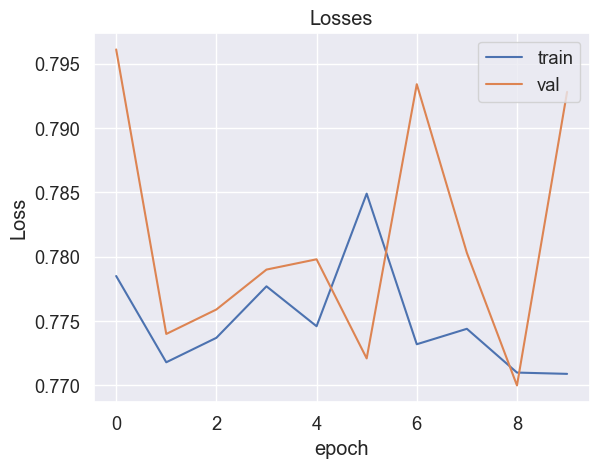

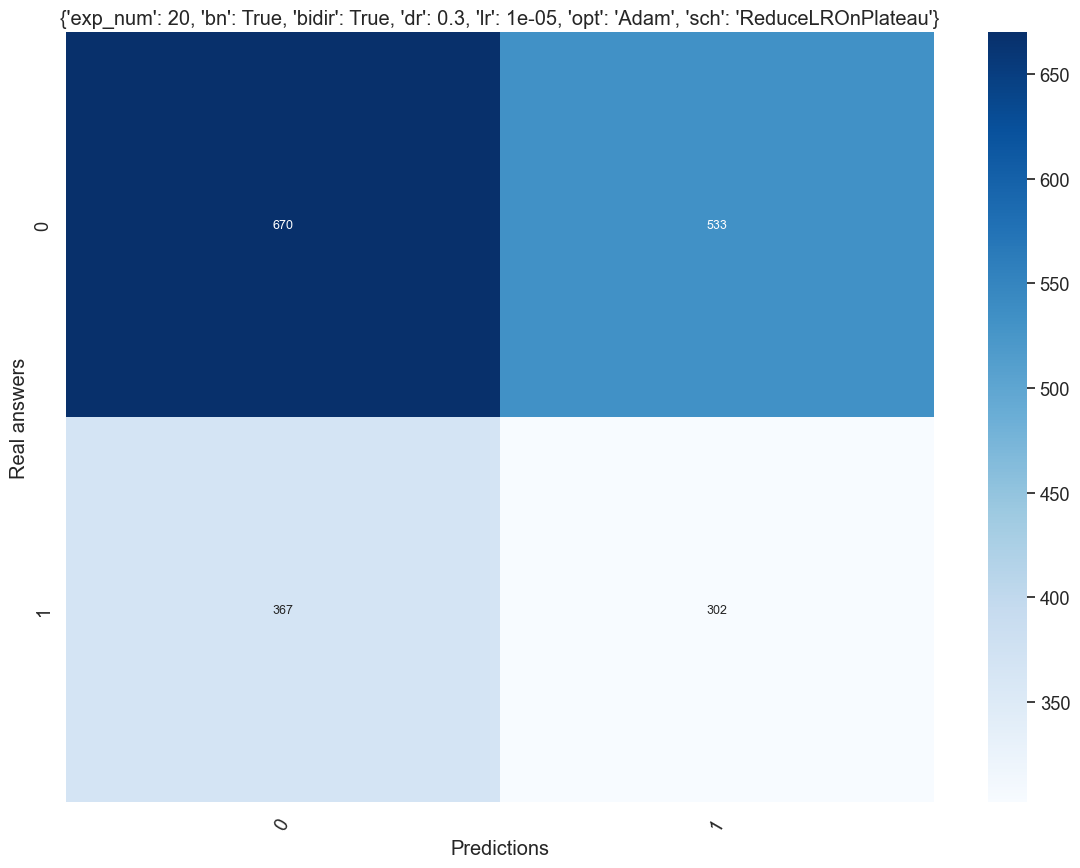

              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1203
           1       0.36      0.45      0.40       669

    accuracy                           0.52      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.52      0.53      1872

{'algorithm': "{'exp_num': 20, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.36, 'recall': 0.45, 'f1_score': 0.4, 'f1_score_weighted': 0.53, 'accuracy': 0.52}
---------------------
{'exp_num': 21, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▍                                       | 1/10 [01:39<14:52, 99.14s/it]

Epoch: 0 | Train loss: 0.7771| Val loss: 0.7847


 20%|████████▊                                   | 2/10 [03:18<13:12, 99.07s/it]

Epoch: 1 | Train loss: 0.7772| Val loss: 0.7822


 30%|█████████████▏                              | 3/10 [04:57<11:33, 99.10s/it]

Epoch: 2 | Train loss: 0.7767| Val loss: 0.7925


 40%|█████████████████▌                          | 4/10 [06:36<09:54, 99.05s/it]

Epoch: 3 | Train loss: 0.7767| Val loss: 0.7885


 50%|██████████████████████                      | 5/10 [08:15<08:15, 99.05s/it]

Epoch: 4 | Train loss: 0.7789| Val loss: 0.7937


 60%|██████████████████████████▍                 | 6/10 [09:54<06:36, 99.03s/it]

Epoch: 5 | Train loss: 0.7783| Val loss: 0.7867


 70%|██████████████████████████████▊             | 7/10 [11:33<04:57, 99.03s/it]

Epoch: 6 | Train loss: 0.7798| Val loss: 0.782


 80%|███████████████████████████████████▏        | 8/10 [13:12<03:18, 99.06s/it]

Epoch: 7 | Train loss: 0.7725| Val loss: 0.7864


 90%|███████████████████████████████████████▌    | 9/10 [14:51<01:39, 99.08s/it]

Epoch: 8 | Train loss: 0.7755| Val loss: 0.7713


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.08s/it]

Epoch: 9 | Train loss: 0.7737| Val loss: 0.7852


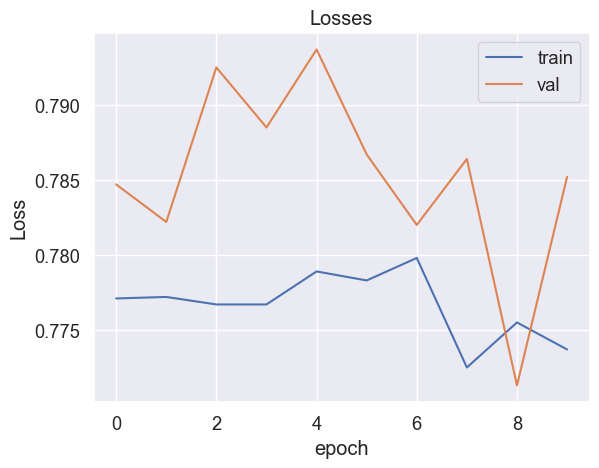

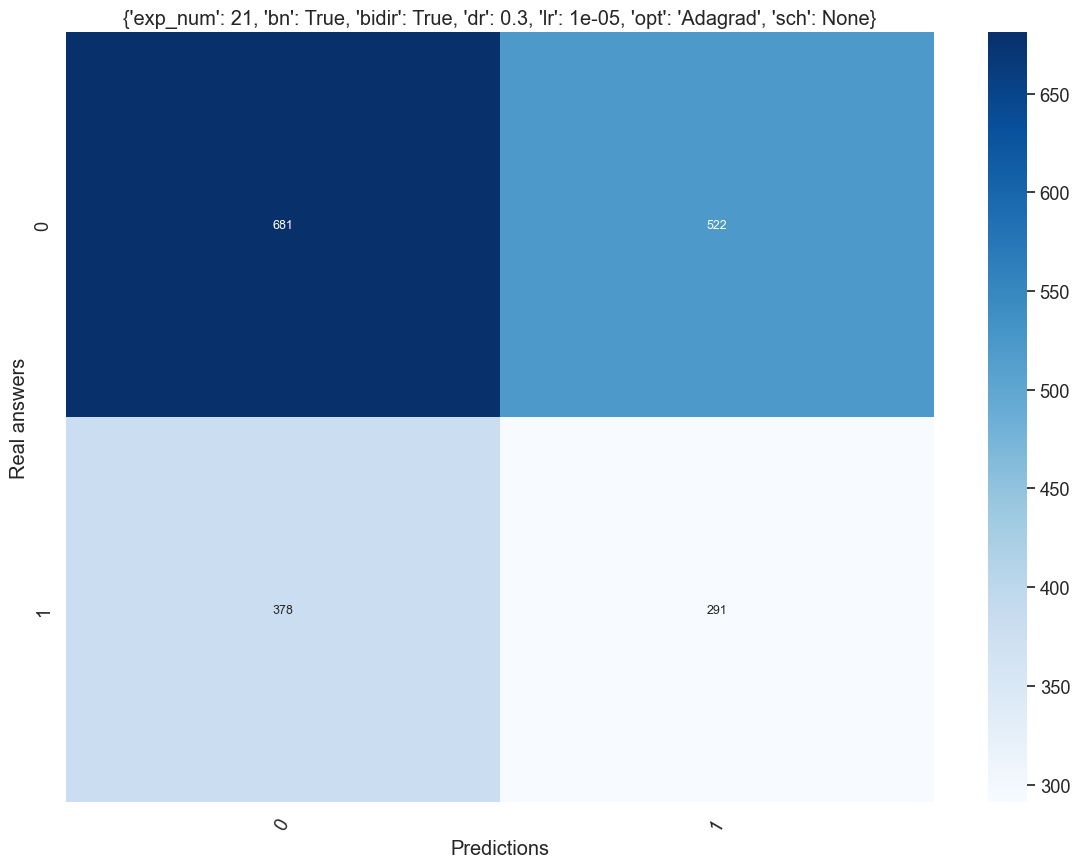

              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1203
           1       0.36      0.43      0.39       669

    accuracy                           0.52      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.52      0.53      1872

{'algorithm': "{'exp_num': 21, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.36, 'recall': 0.43, 'f1_score': 0.39, 'f1_score_weighted': 0.53, 'accuracy': 0.52}
---------------------
{'exp_num': 22, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:39<14:51, 99.10s/it]

Epoch: 0 | Train loss: 0.7807| Val loss: 0.7714


 20%|████████▊                                   | 2/10 [03:18<13:13, 99.18s/it]

Epoch: 1 | Train loss: 0.7743| Val loss: 0.7928


 30%|█████████████▏                              | 3/10 [04:57<11:34, 99.18s/it]

Epoch: 2 | Train loss: 0.7792| Val loss: 0.767


 40%|█████████████████▌                          | 4/10 [06:36<09:54, 99.11s/it]

Epoch: 3 | Train loss: 0.7762| Val loss: 0.7829


 50%|██████████████████████                      | 5/10 [08:15<08:15, 99.04s/it]

Epoch: 4 | Train loss: 0.7745| Val loss: 0.7887


 60%|██████████████████████████▍                 | 6/10 [09:54<06:36, 99.01s/it]

Epoch: 5 | Train loss: 0.7692| Val loss: 0.7687


 70%|██████████████████████████████▊             | 7/10 [11:33<04:57, 99.07s/it]

Epoch: 6 | Train loss: 0.7817| Val loss: 0.7766


 80%|███████████████████████████████████▏        | 8/10 [13:12<03:18, 99.09s/it]

Epoch: 7 | Train loss: 0.7791| Val loss: 0.7748


 90%|███████████████████████████████████████▌    | 9/10 [14:51<01:39, 99.09s/it]

Epoch: 8 | Train loss: 0.7808| Val loss: 0.7823


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.05s/it]

Epoch: 9 | Train loss: 0.7656| Val loss: 0.7655


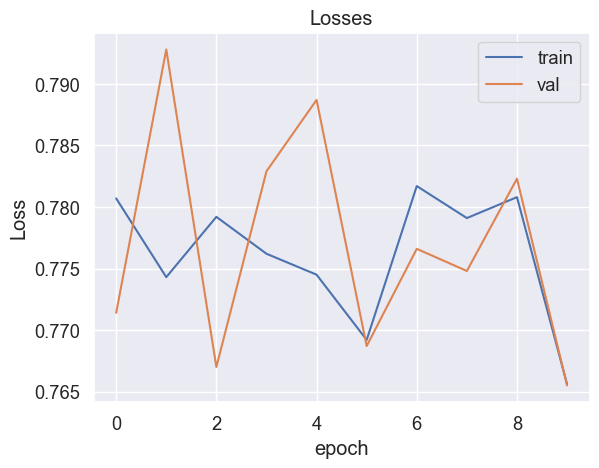

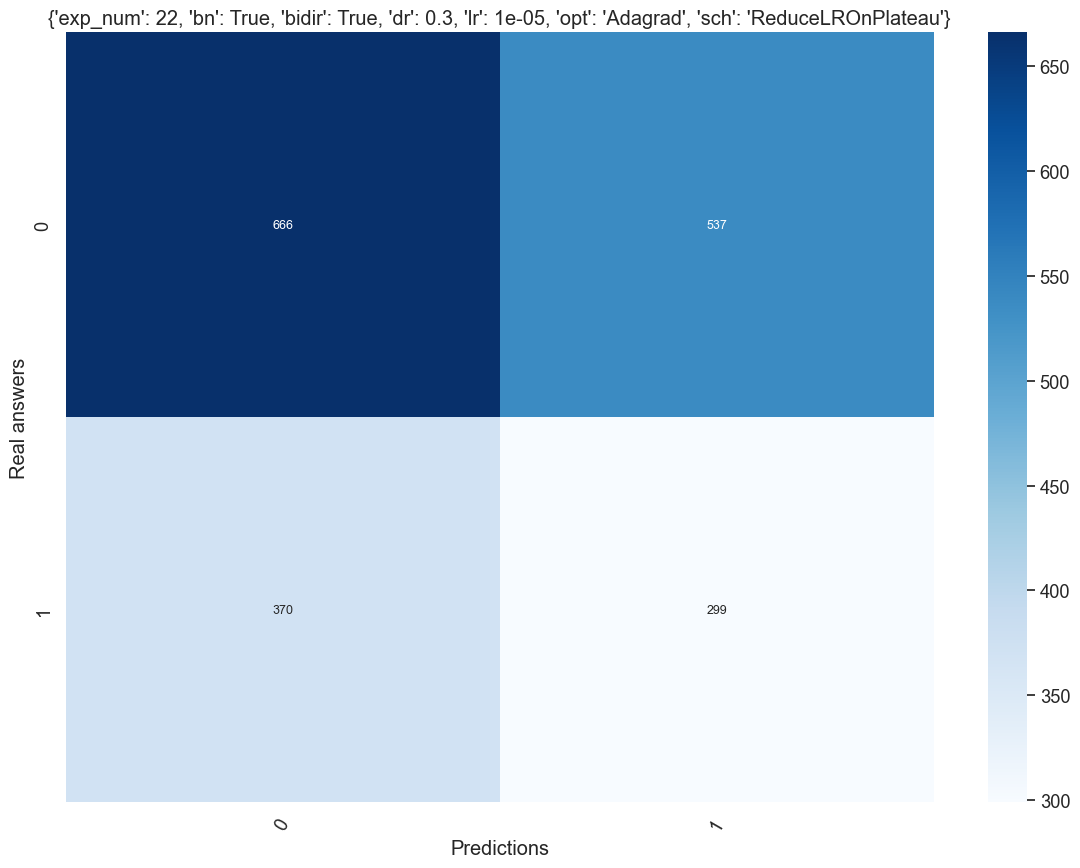

              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1203
           1       0.36      0.45      0.40       669

    accuracy                           0.52      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.52      0.52      1872

{'algorithm': "{'exp_num': 22, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.36, 'recall': 0.45, 'f1_score': 0.4, 'f1_score_weighted': 0.52, 'accuracy': 0.52}
---------------------
{'exp_num': 23, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:42, 98.11s/it]

Epoch: 0 | Train loss: 0.7774| Val loss: 0.7862


 20%|████████▊                                   | 2/10 [03:15<13:01, 97.72s/it]

Epoch: 1 | Train loss: 0.7689| Val loss: 0.7798


 30%|█████████████▏                              | 3/10 [04:53<11:25, 97.93s/it]

Epoch: 2 | Train loss: 0.7673| Val loss: 0.7694


 40%|█████████████████▌                          | 4/10 [06:31<09:47, 97.88s/it]

Epoch: 3 | Train loss: 0.7625| Val loss: 0.7499


 50%|██████████████████████                      | 5/10 [08:08<08:08, 97.72s/it]

Epoch: 4 | Train loss: 0.7698| Val loss: 0.7683


 60%|██████████████████████████▍                 | 6/10 [09:47<06:31, 97.83s/it]

Epoch: 5 | Train loss: 0.7588| Val loss: 0.7561


 70%|██████████████████████████████▊             | 7/10 [11:24<04:53, 97.81s/it]

Epoch: 6 | Train loss: 0.7556| Val loss: 0.7711


 80%|███████████████████████████████████▏        | 8/10 [13:02<03:15, 97.70s/it]

Epoch: 7 | Train loss: 0.7518| Val loss: 0.7667


 90%|███████████████████████████████████████▌    | 9/10 [14:39<01:37, 97.53s/it]

Epoch: 8 | Train loss: 0.7578| Val loss: 0.7534


100%|███████████████████████████████████████████| 10/10 [16:16<00:00, 97.66s/it]

Epoch: 9 | Train loss: 0.7471| Val loss: 0.754


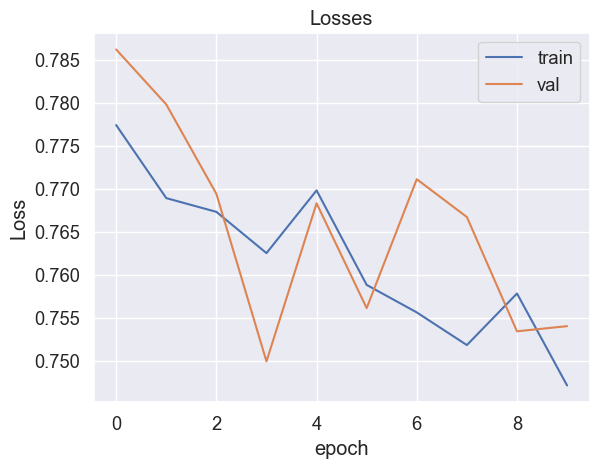

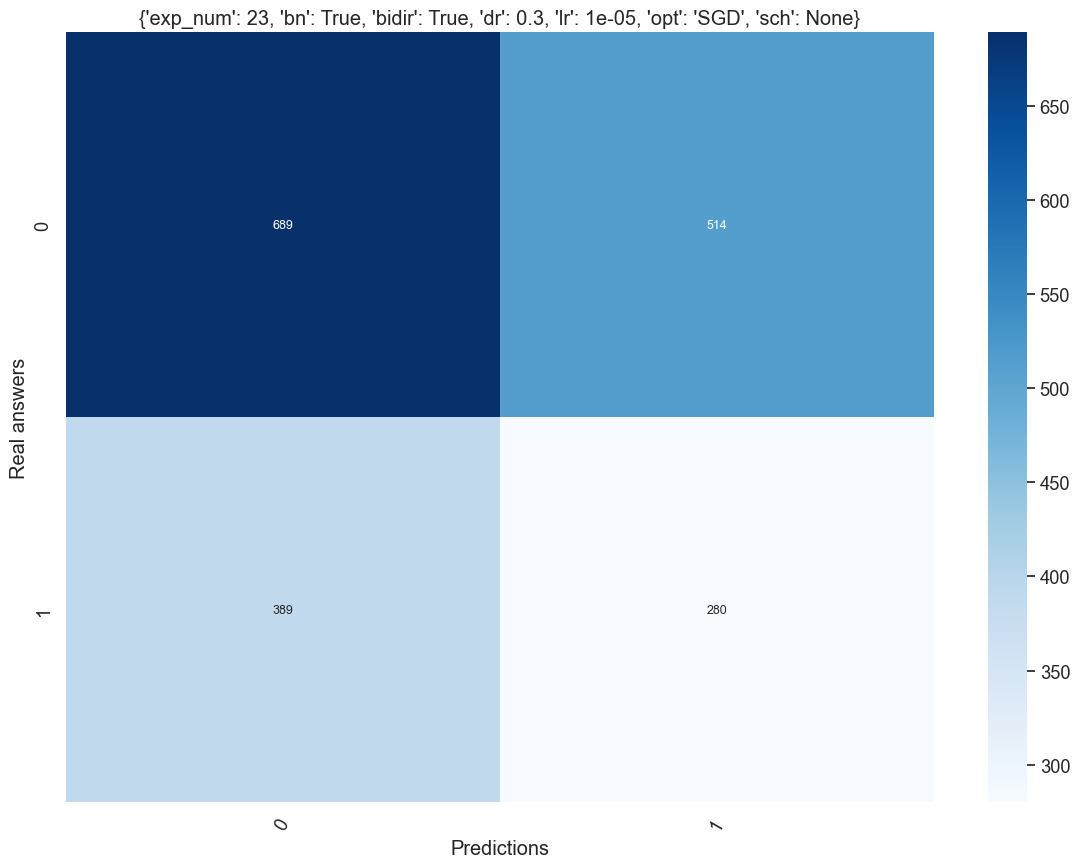

              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1203
           1       0.35      0.42      0.38       669

    accuracy                           0.52      1872
   macro avg       0.50      0.50      0.49      1872
weighted avg       0.54      0.52      0.53      1872

{'algorithm': "{'exp_num': 23, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.35, 'recall': 0.42, 'f1_score': 0.38, 'f1_score_weighted': 0.53, 'accuracy': 0.52}
---------------------
{'exp_num': 24, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:37<14:36, 97.44s/it]

Epoch: 0 | Train loss: 0.754| Val loss: 0.7457


 20%|████████▊                                   | 2/10 [03:15<13:03, 97.96s/it]

Epoch: 1 | Train loss: 0.7536| Val loss: 0.7563


 30%|█████████████▏                              | 3/10 [04:53<11:25, 97.91s/it]

Epoch: 2 | Train loss: 0.749| Val loss: 0.7442


 40%|█████████████████▌                          | 4/10 [06:31<09:48, 98.04s/it]

Epoch: 3 | Train loss: 0.7565| Val loss: 0.7602


 50%|██████████████████████                      | 5/10 [08:10<08:11, 98.21s/it]

Epoch: 4 | Train loss: 0.7532| Val loss: 0.7644


 60%|██████████████████████████▍                 | 6/10 [09:48<06:33, 98.31s/it]

Epoch: 5 | Train loss: 0.7499| Val loss: 0.7554


 70%|██████████████████████████████▊             | 7/10 [11:26<04:54, 98.12s/it]

Epoch: 6 | Train loss: 0.7516| Val loss: 0.7607


 80%|███████████████████████████████████▏        | 8/10 [13:04<03:16, 98.11s/it]

Epoch: 7 | Train loss: 0.7483| Val loss: 0.7457


 90%|███████████████████████████████████████▌    | 9/10 [14:41<01:37, 97.82s/it]

Epoch: 8 | Train loss: 0.753| Val loss: 0.7496


100%|███████████████████████████████████████████| 10/10 [16:19<00:00, 97.95s/it]

Epoch: 9 | Train loss: 0.7489| Val loss: 0.7465


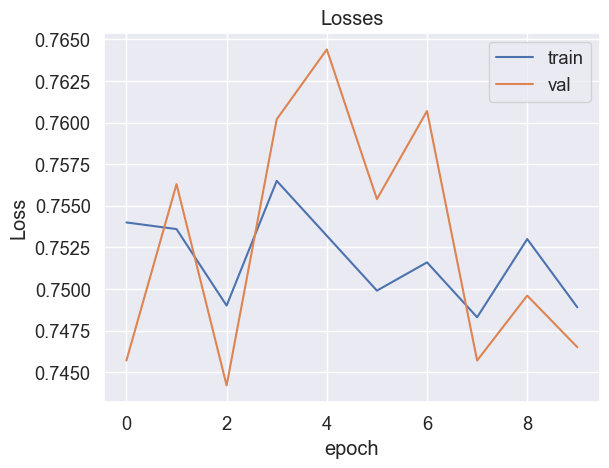

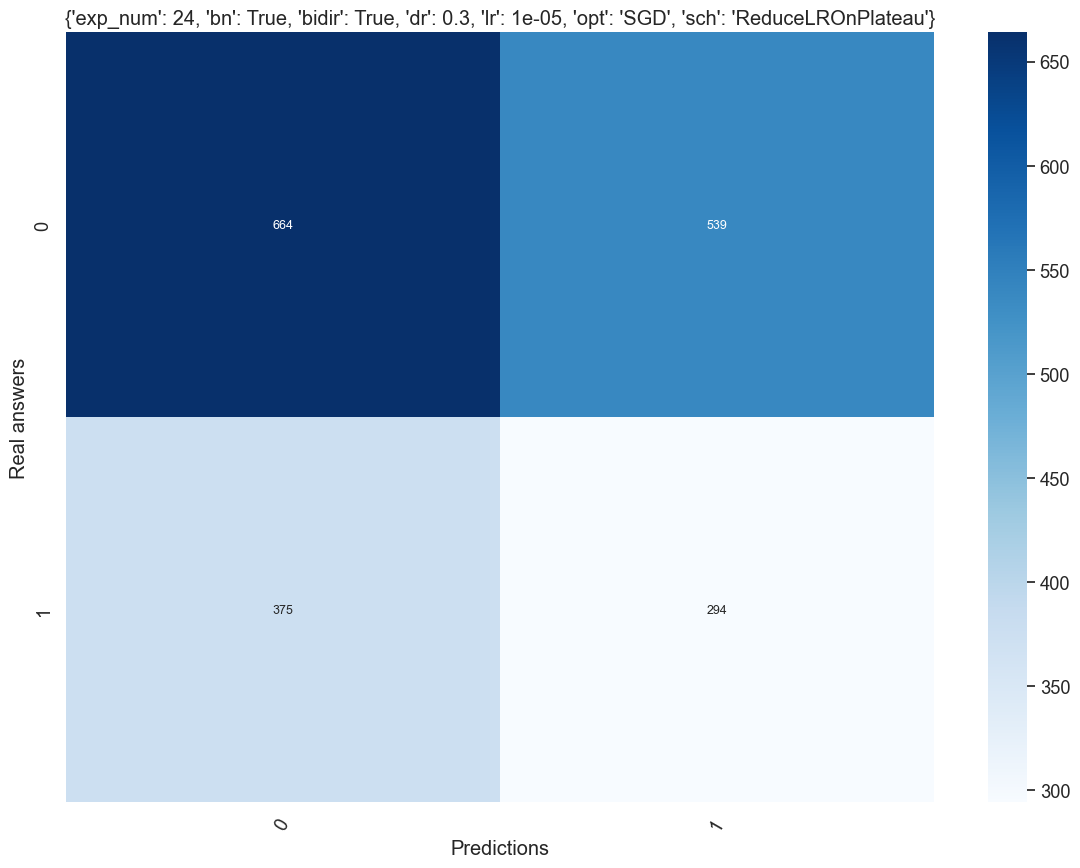

              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1203
           1       0.35      0.44      0.39       669

    accuracy                           0.51      1872
   macro avg       0.50      0.50      0.49      1872
weighted avg       0.54      0.51      0.52      1872

{'algorithm': "{'exp_num': 24, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.35, 'recall': 0.44, 'f1_score': 0.39, 'f1_score_weighted': 0.52, 'accuracy': 0.51}
---------------------
{'exp_num': 25, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:37<14:39, 97.72s/it]

Epoch: 0 | Train loss: 0.9171| Val loss: 0.91


 20%|████████▊                                   | 2/10 [03:15<12:59, 97.47s/it]

Epoch: 1 | Train loss: 0.8938| Val loss: 0.8805


 30%|█████████████▏                              | 3/10 [04:55<11:32, 98.89s/it]

Epoch: 2 | Train loss: 0.8922| Val loss: 0.8707


 40%|█████████████████▌                          | 4/10 [06:35<09:56, 99.46s/it]

Epoch: 3 | Train loss: 0.8775| Val loss: 0.88


 50%|██████████████████████                      | 5/10 [08:14<08:16, 99.27s/it]

Epoch: 4 | Train loss: 0.8608| Val loss: 0.8569


 60%|██████████████████████████▍                 | 6/10 [09:53<06:36, 99.21s/it]

Epoch: 5 | Train loss: 0.8527| Val loss: 0.8484


 70%|██████████████████████████████▊             | 7/10 [11:32<04:56, 98.84s/it]

Epoch: 6 | Train loss: 0.8394| Val loss: 0.8414


 80%|███████████████████████████████████▏        | 8/10 [13:10<03:17, 98.80s/it]

Epoch: 7 | Train loss: 0.8217| Val loss: 0.8183


 90%|███████████████████████████████████████▌    | 9/10 [14:49<01:38, 98.70s/it]

Epoch: 8 | Train loss: 0.8053| Val loss: 0.8169


100%|███████████████████████████████████████████| 10/10 [16:27<00:00, 98.75s/it]

Epoch: 9 | Train loss: 0.7987| Val loss: 0.7775


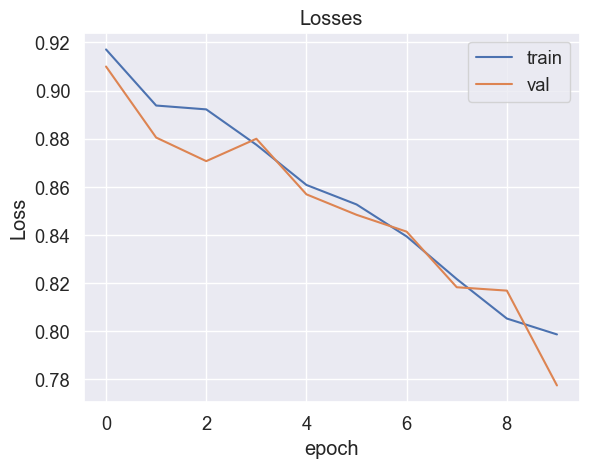

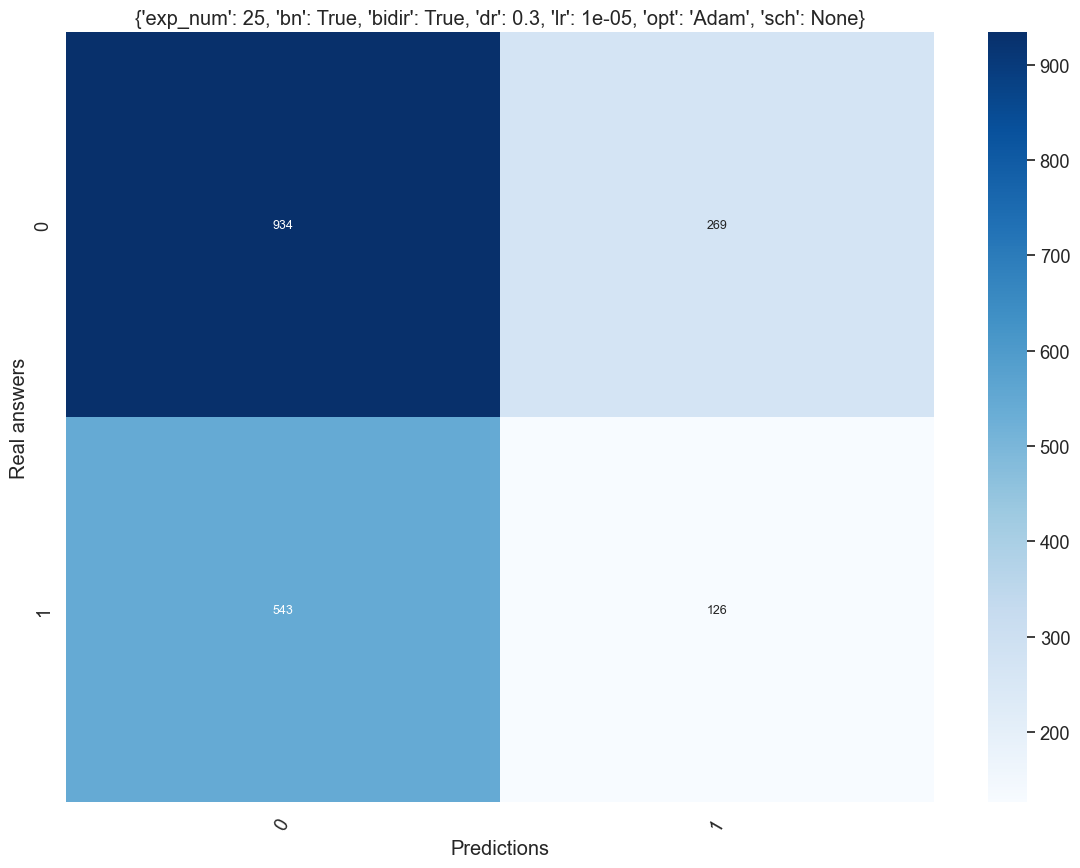

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1203
           1       0.32      0.19      0.24       669

    accuracy                           0.57      1872
   macro avg       0.48      0.48      0.47      1872
weighted avg       0.52      0.57      0.53      1872

{'algorithm': "{'exp_num': 25, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.32, 'recall': 0.19, 'f1_score': 0.24, 'f1_score_weighted': 0.53, 'accuracy': 0.57}
---------------------
{'exp_num': 26, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:38<14:44, 98.27s/it]

Epoch: 0 | Train loss: 0.8022| Val loss: 0.7869


 20%|████████▊                                   | 2/10 [03:15<13:00, 97.62s/it]

Epoch: 1 | Train loss: 0.7929| Val loss: 0.7979


 30%|█████████████▏                              | 3/10 [04:53<11:24, 97.77s/it]

Epoch: 2 | Train loss: 0.7918| Val loss: 0.7934


 40%|█████████████████▌                          | 4/10 [06:30<09:46, 97.69s/it]

Epoch: 3 | Train loss: 0.794| Val loss: 0.8077


 50%|██████████████████████                      | 5/10 [08:08<08:07, 97.58s/it]

Epoch: 4 | Train loss: 0.7982| Val loss: 0.8015


 60%|██████████████████████████▍                 | 6/10 [09:46<06:30, 97.70s/it]

Epoch: 5 | Train loss: 0.7997| Val loss: 0.8138


 70%|██████████████████████████████▊             | 7/10 [11:24<04:53, 97.88s/it]

Epoch: 6 | Train loss: 0.8028| Val loss: 0.8093


 80%|███████████████████████████████████▏        | 8/10 [13:02<03:15, 97.97s/it]

Epoch: 7 | Train loss: 0.8028| Val loss: 0.7943


 90%|███████████████████████████████████████▌    | 9/10 [14:40<01:37, 97.83s/it]

Epoch: 8 | Train loss: 0.7982| Val loss: 0.8109


100%|███████████████████████████████████████████| 10/10 [16:17<00:00, 97.71s/it]

Epoch: 9 | Train loss: 0.8| Val loss: 0.8097


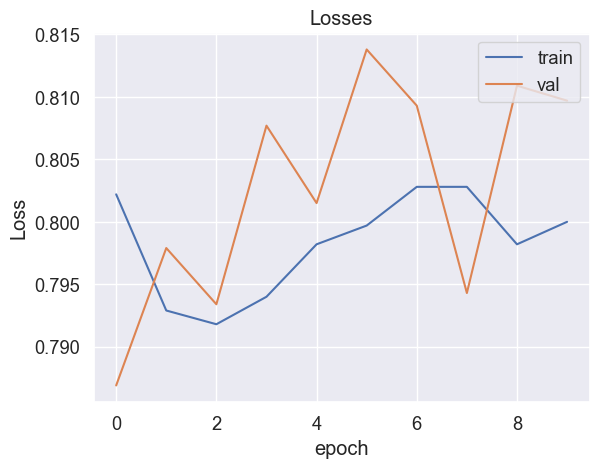

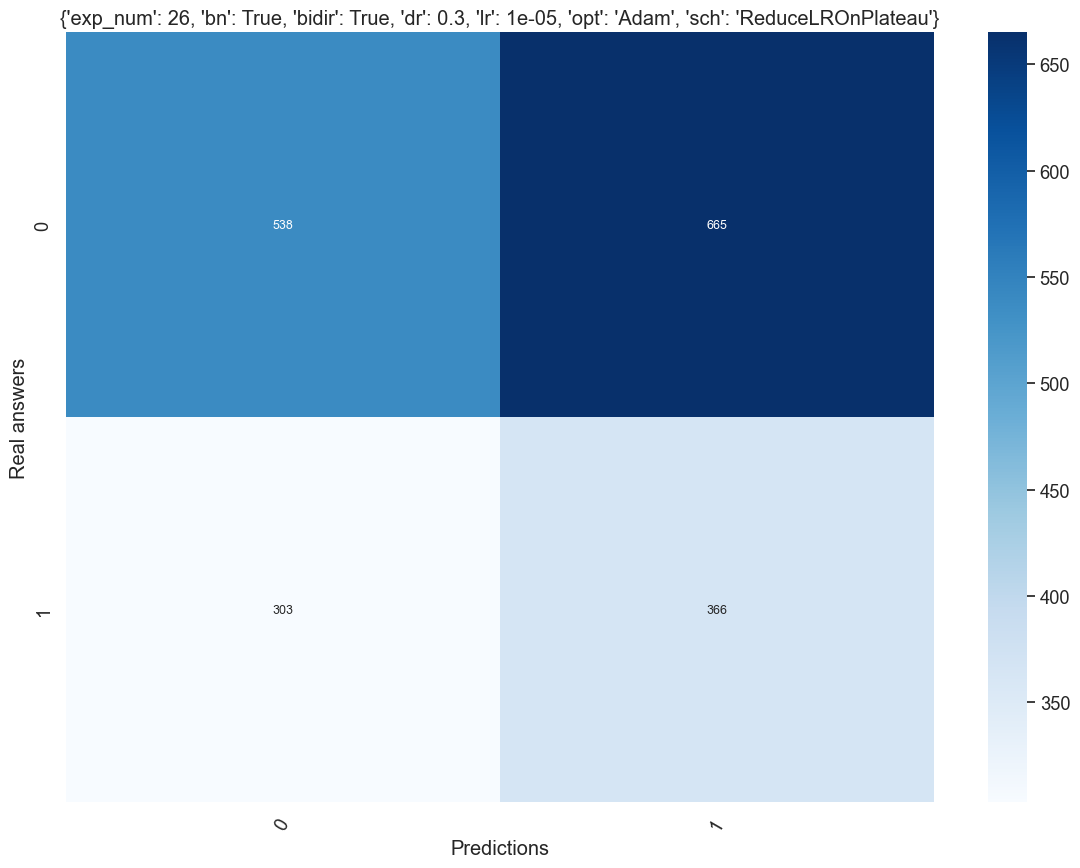

              precision    recall  f1-score   support

           0       0.64      0.45      0.53      1203
           1       0.35      0.55      0.43       669

    accuracy                           0.48      1872
   macro avg       0.50      0.50      0.48      1872
weighted avg       0.54      0.48      0.49      1872

{'algorithm': "{'exp_num': 26, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.35, 'recall': 0.55, 'f1_score': 0.43, 'f1_score_weighted': 0.49, 'accuracy': 0.48}
---------------------
{'exp_num': 27, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:48, 98.74s/it]

Epoch: 0 | Train loss: 0.8009| Val loss: 0.8161


 20%|████████▊                                   | 2/10 [03:17<13:10, 98.75s/it]

Epoch: 1 | Train loss: 0.7994| Val loss: 0.7825


 30%|█████████████▏                              | 3/10 [04:56<11:31, 98.82s/it]

Epoch: 2 | Train loss: 0.7922| Val loss: 0.8046


 40%|█████████████████▌                          | 4/10 [06:35<09:53, 98.86s/it]

Epoch: 3 | Train loss: 0.7949| Val loss: 0.7877


 50%|██████████████████████                      | 5/10 [08:14<08:14, 98.94s/it]

Epoch: 4 | Train loss: 0.8093| Val loss: 0.7966


 60%|██████████████████████████▍                 | 6/10 [09:53<06:35, 98.96s/it]

Epoch: 5 | Train loss: 0.799| Val loss: 0.798


 70%|██████████████████████████████▊             | 7/10 [11:32<04:57, 99.04s/it]

Epoch: 6 | Train loss: 0.7899| Val loss: 0.7954


 80%|███████████████████████████████████▏        | 8/10 [13:11<03:18, 99.10s/it]

Epoch: 7 | Train loss: 0.8026| Val loss: 0.7975


 90%|███████████████████████████████████████▌    | 9/10 [14:51<01:39, 99.14s/it]

Epoch: 8 | Train loss: 0.7922| Val loss: 0.8028


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.03s/it]

Epoch: 9 | Train loss: 0.7928| Val loss: 0.7936


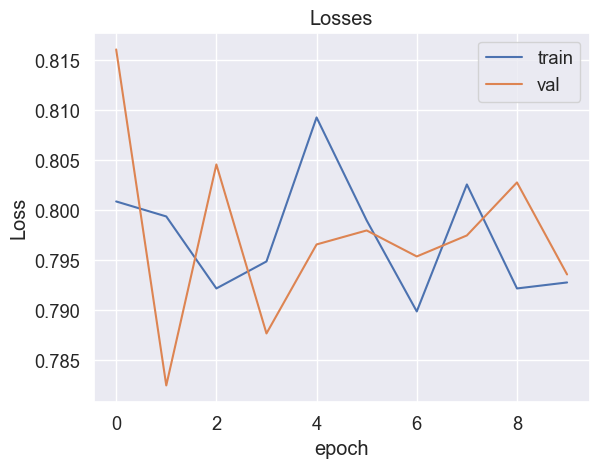

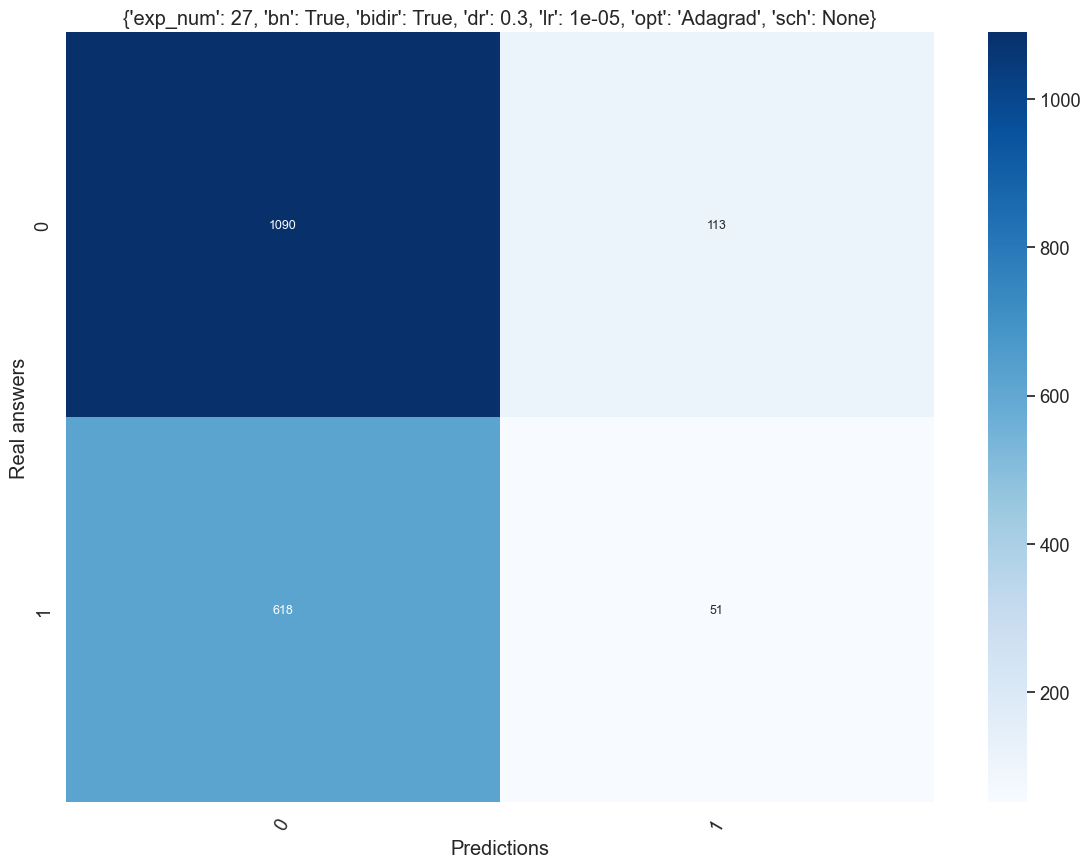

              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1203
           1       0.31      0.08      0.12       669

    accuracy                           0.61      1872
   macro avg       0.47      0.49      0.44      1872
weighted avg       0.52      0.61      0.53      1872

{'algorithm': "{'exp_num': 27, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.31, 'recall': 0.08, 'f1_score': 0.12, 'f1_score_weighted': 0.53, 'accuracy': 0.61}
---------------------
{'exp_num': 28, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:39<14:53, 99.24s/it]

Epoch: 0 | Train loss: 0.7994| Val loss: 0.8018


 20%|████████▊                                   | 2/10 [03:18<13:13, 99.23s/it]

Epoch: 1 | Train loss: 0.8047| Val loss: 0.7939


 30%|█████████████▏                              | 3/10 [04:57<11:34, 99.20s/it]

Epoch: 2 | Train loss: 0.7892| Val loss: 0.7994


 40%|█████████████████▌                          | 4/10 [06:36<09:54, 99.14s/it]

Epoch: 3 | Train loss: 0.8012| Val loss: 0.7805


 50%|██████████████████████                      | 5/10 [08:14<08:13, 98.80s/it]

Epoch: 4 | Train loss: 0.8013| Val loss: 0.8112


 60%|██████████████████████████▍                 | 6/10 [09:54<06:36, 99.04s/it]

Epoch: 5 | Train loss: 0.7867| Val loss: 0.8045


 70%|██████████████████████████████▊             | 7/10 [11:33<04:57, 99.09s/it]

Epoch: 6 | Train loss: 0.7989| Val loss: 0.8031


 80%|███████████████████████████████████▏        | 8/10 [13:12<03:18, 99.13s/it]

Epoch: 7 | Train loss: 0.7971| Val loss: 0.8016


 90%|███████████████████████████████████████▌    | 9/10 [14:51<01:39, 99.13s/it]

Epoch: 8 | Train loss: 0.7964| Val loss: 0.8022


100%|███████████████████████████████████████████| 10/10 [16:30<00:00, 99.06s/it]

Epoch: 9 | Train loss: 0.7838| Val loss: 0.7887


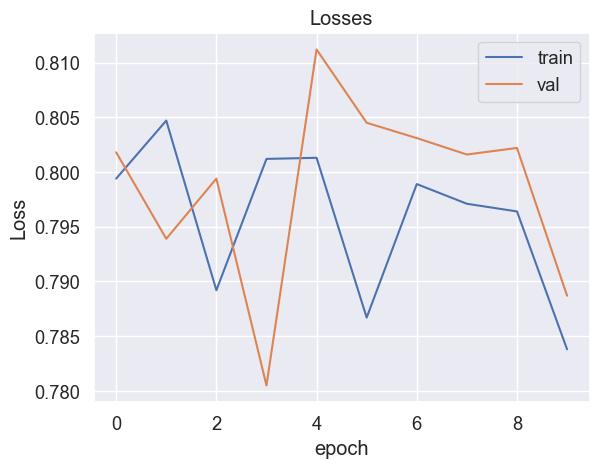

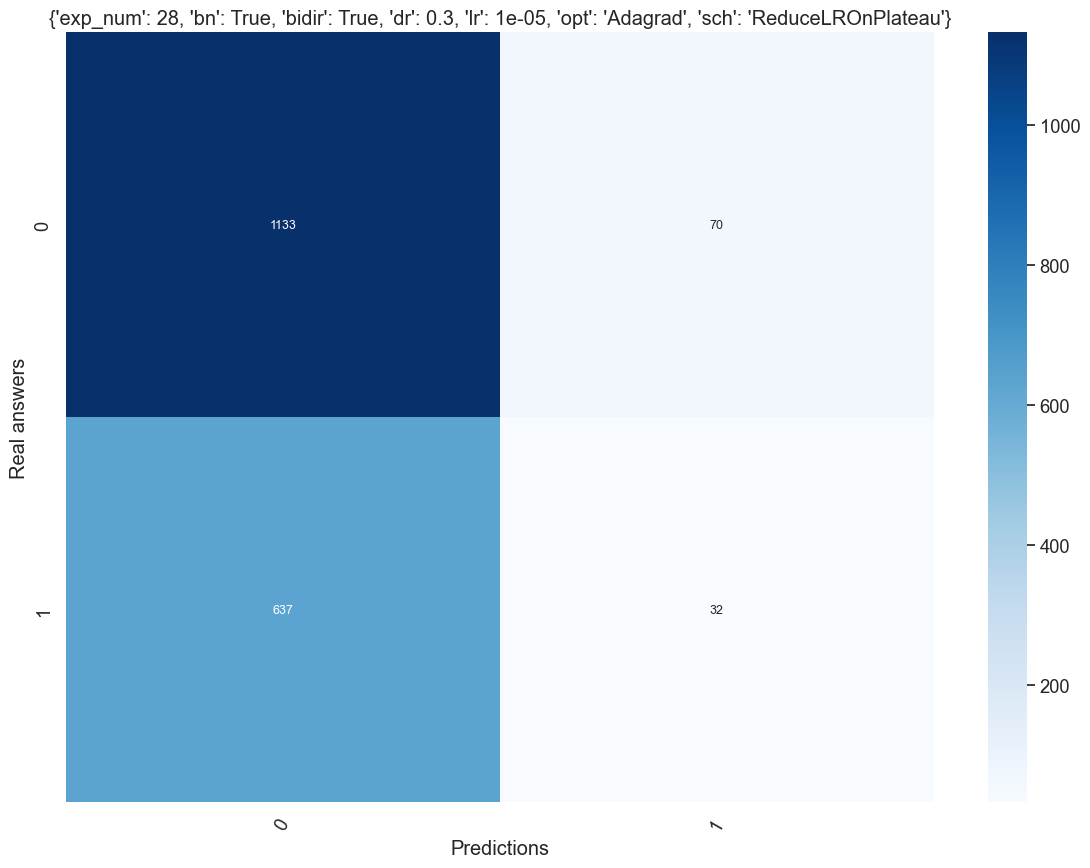

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1203
           1       0.31      0.05      0.08       669

    accuracy                           0.62      1872
   macro avg       0.48      0.49      0.42      1872
weighted avg       0.52      0.62      0.52      1872

{'algorithm': "{'exp_num': 28, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.31, 'recall': 0.05, 'f1_score': 0.08, 'f1_score_weighted': 0.52, 'accuracy': 0.62}
---------------------
{'exp_num': 29, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:42, 98.10s/it]

Epoch: 0 | Train loss: 0.8005| Val loss: 0.7978


 20%|████████▊                                   | 2/10 [03:16<13:05, 98.15s/it]

Epoch: 1 | Train loss: 0.7922| Val loss: 0.7941


 30%|█████████████▏                              | 3/10 [04:54<11:27, 98.20s/it]

Epoch: 2 | Train loss: 0.7929| Val loss: 0.7925


 40%|█████████████████▌                          | 4/10 [06:32<09:49, 98.24s/it]

Epoch: 3 | Train loss: 0.7883| Val loss: 0.7814


 50%|██████████████████████                      | 5/10 [08:11<08:11, 98.25s/it]

Epoch: 4 | Train loss: 0.7881| Val loss: 0.7891


 60%|██████████████████████████▍                 | 6/10 [09:48<06:32, 98.11s/it]

Epoch: 5 | Train loss: 0.7862| Val loss: 0.8011


 70%|██████████████████████████████▊             | 7/10 [11:26<04:54, 98.05s/it]

Epoch: 6 | Train loss: 0.7922| Val loss: 0.7917


 80%|███████████████████████████████████▏        | 8/10 [13:04<03:15, 97.88s/it]

Epoch: 7 | Train loss: 0.7791| Val loss: 0.7777


 90%|███████████████████████████████████████▌    | 9/10 [14:42<01:37, 97.82s/it]

Epoch: 8 | Train loss: 0.781| Val loss: 0.7937


100%|███████████████████████████████████████████| 10/10 [16:20<00:00, 98.06s/it]

Epoch: 9 | Train loss: 0.7848| Val loss: 0.7777


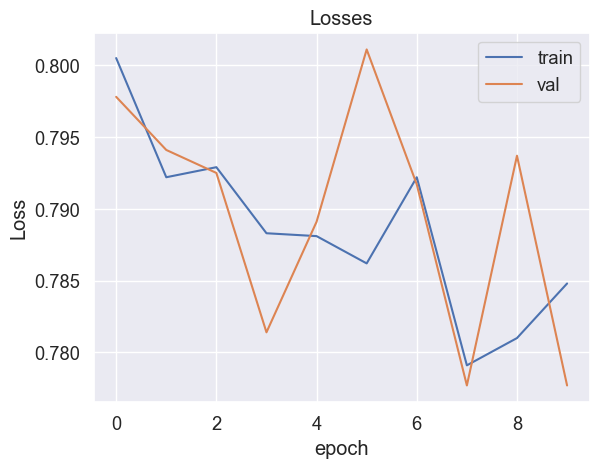

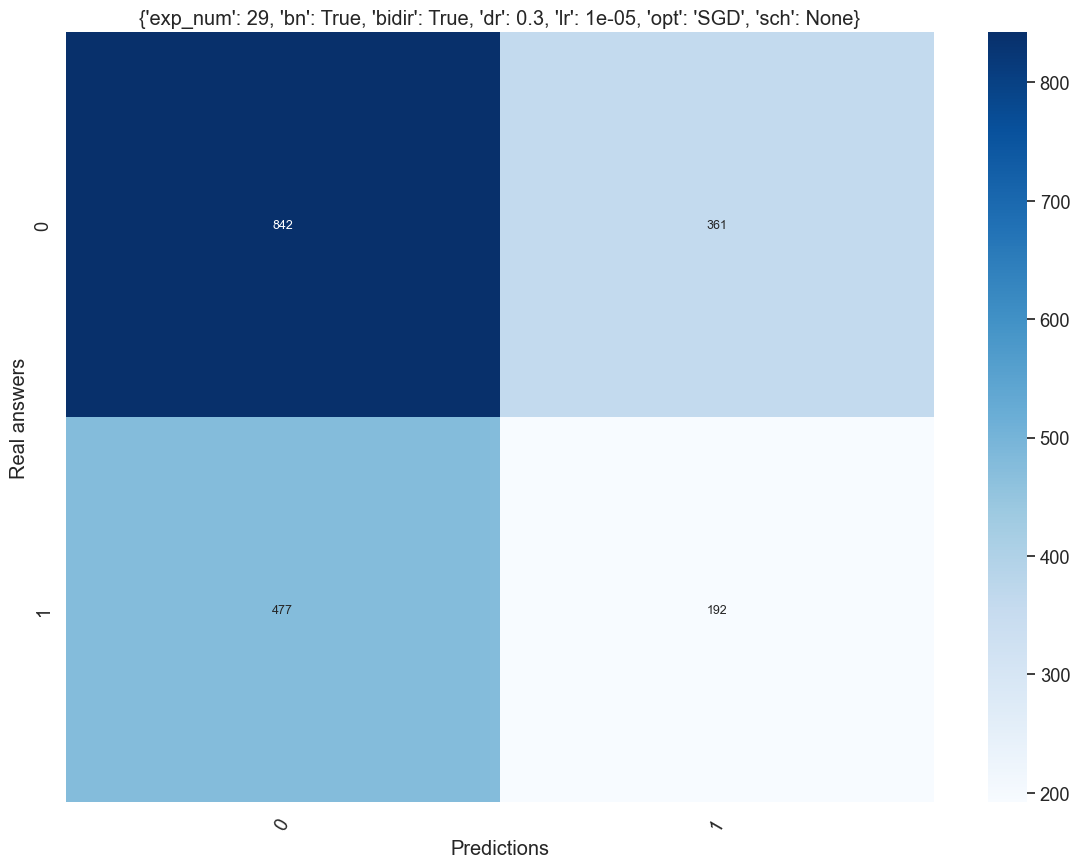

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1203
           1       0.35      0.29      0.31       669

    accuracy                           0.55      1872
   macro avg       0.49      0.49      0.49      1872
weighted avg       0.53      0.55      0.54      1872

{'algorithm': "{'exp_num': 29, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.35, 'recall': 0.29, 'f1_score': 0.31, 'f1_score_weighted': 0.54, 'accuracy': 0.55}
---------------------
{'exp_num': 30, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:39<14:51, 99.02s/it]

Epoch: 0 | Train loss: 0.7743| Val loss: 0.7807


 20%|████████▊                                   | 2/10 [03:17<13:09, 98.67s/it]

Epoch: 1 | Train loss: 0.7858| Val loss: 0.7687


 30%|█████████████▏                              | 3/10 [04:55<11:29, 98.51s/it]

Epoch: 2 | Train loss: 0.7736| Val loss: 0.7888


 40%|█████████████████▌                          | 4/10 [06:34<09:50, 98.48s/it]

Epoch: 3 | Train loss: 0.773| Val loss: 0.7741


 50%|██████████████████████                      | 5/10 [08:12<08:12, 98.44s/it]

Epoch: 4 | Train loss: 0.7762| Val loss: 0.7832


 60%|██████████████████████████▍                 | 6/10 [09:50<06:33, 98.33s/it]

Epoch: 5 | Train loss: 0.779| Val loss: 0.7981


 70%|██████████████████████████████▊             | 7/10 [11:28<04:54, 98.31s/it]

Epoch: 6 | Train loss: 0.7848| Val loss: 0.7887


 80%|███████████████████████████████████▏        | 8/10 [13:07<03:16, 98.40s/it]

Epoch: 7 | Train loss: 0.7852| Val loss: 0.7909


 90%|███████████████████████████████████████▌    | 9/10 [14:46<01:38, 98.54s/it]

Epoch: 8 | Train loss: 0.781| Val loss: 0.769


100%|███████████████████████████████████████████| 10/10 [16:25<00:00, 98.52s/it]

Epoch: 9 | Train loss: 0.7885| Val loss: 0.7821


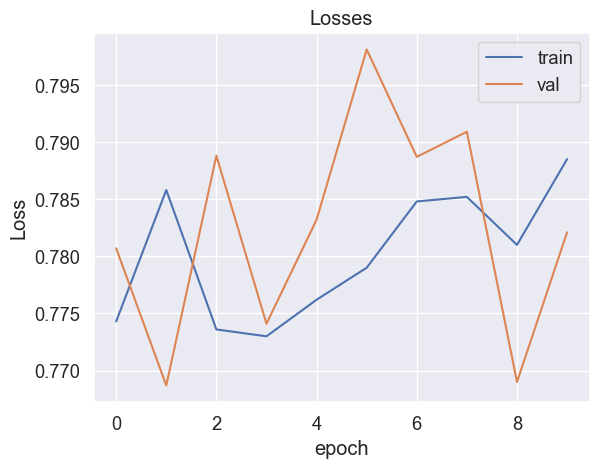

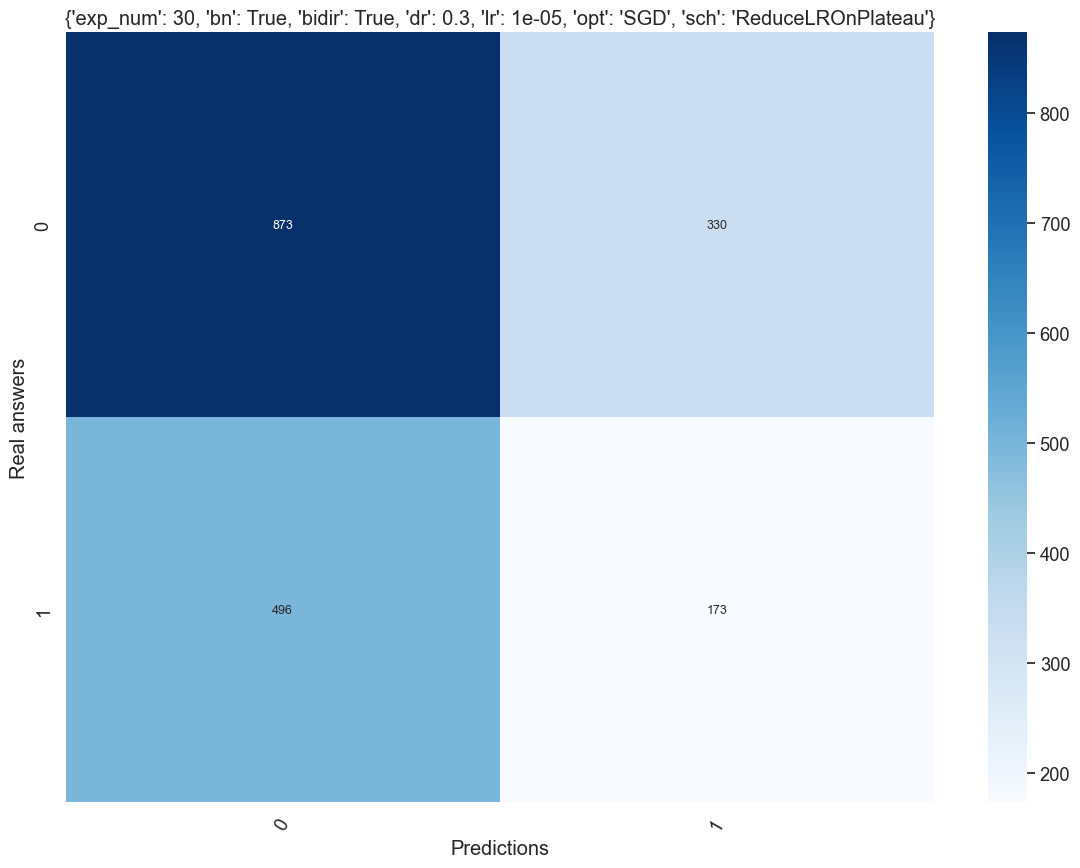

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1203
           1       0.34      0.26      0.30       669

    accuracy                           0.56      1872
   macro avg       0.49      0.49      0.49      1872
weighted avg       0.53      0.56      0.54      1872

{'algorithm': "{'exp_num': 30, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.34, 'recall': 0.26, 'f1_score': 0.3, 'f1_score_weighted': 0.54, 'accuracy': 0.56}
---------------------
{'exp_num': 31, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}


 10%|████▍                                       | 1/10 [01:38<14:47, 98.58s/it]

Epoch: 0 | Train loss: 0.9141| Val loss: 0.9078


 20%|████████▊                                   | 2/10 [03:16<13:07, 98.45s/it]

Epoch: 1 | Train loss: 0.9125| Val loss: 0.9222


 30%|█████████████▏                              | 3/10 [04:55<11:28, 98.42s/it]

Epoch: 2 | Train loss: 0.8976| Val loss: 0.9253


 40%|█████████████████▌                          | 4/10 [06:33<09:50, 98.38s/it]

Epoch: 3 | Train loss: 0.8863| Val loss: 0.8913


 50%|██████████████████████                      | 5/10 [08:12<08:11, 98.38s/it]

Epoch: 4 | Train loss: 0.8693| Val loss: 0.8908


 60%|██████████████████████████▍                 | 6/10 [09:50<06:33, 98.40s/it]

Epoch: 5 | Train loss: 0.8606| Val loss: 0.867


 70%|██████████████████████████████▊             | 7/10 [11:28<04:55, 98.41s/it]

Epoch: 6 | Train loss: 0.8347| Val loss: 0.835


 80%|███████████████████████████████████▏        | 8/10 [13:06<03:16, 98.21s/it]

Epoch: 7 | Train loss: 0.8185| Val loss: 0.8231


 90%|███████████████████████████████████████▌    | 9/10 [14:45<01:38, 98.46s/it]

Epoch: 8 | Train loss: 0.8171| Val loss: 0.8082


100%|███████████████████████████████████████████| 10/10 [16:25<00:00, 98.50s/it]

Epoch: 9 | Train loss: 0.8094| Val loss: 0.8036


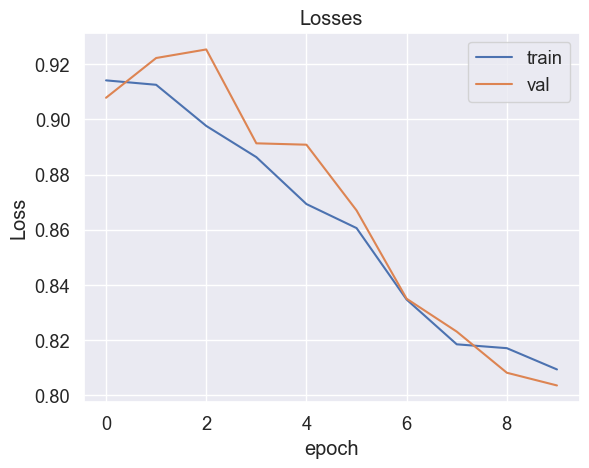

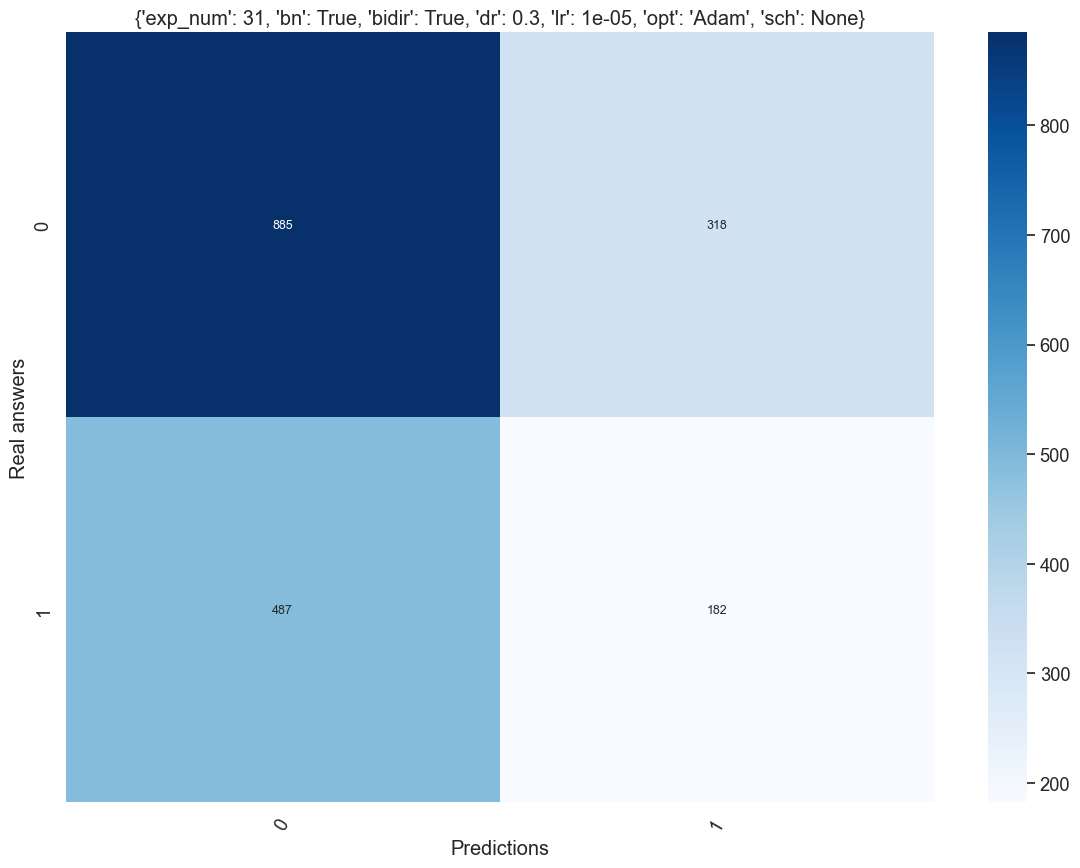

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1203
           1       0.36      0.27      0.31       669

    accuracy                           0.57      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.57      0.55      1872

{'algorithm': "{'exp_num': 31, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': None}", 'precision': 0.36, 'recall': 0.27, 'f1_score': 0.31, 'f1_score_weighted': 0.55, 'accuracy': 0.57}
---------------------
{'exp_num': 32, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


 10%|████▍                                       | 1/10 [01:39<14:54, 99.34s/it]

Epoch: 0 | Train loss: 0.7939| Val loss: 0.8019


 20%|████████▊                                   | 2/10 [03:18<13:14, 99.25s/it]

Epoch: 1 | Train loss: 0.7897| Val loss: 0.7979


 30%|█████████████▏                              | 3/10 [04:57<11:34, 99.27s/it]

Epoch: 2 | Train loss: 0.7827| Val loss: 0.794


 40%|█████████████████▌                          | 4/10 [06:36<09:54, 99.15s/it]

Epoch: 3 | Train loss: 0.7984| Val loss: 0.7829


 50%|██████████████████████                      | 5/10 [08:15<08:15, 99.08s/it]

Epoch: 4 | Train loss: 0.7889| Val loss: 0.7981


 60%|██████████████████████████▍                 | 6/10 [09:54<06:36, 99.01s/it]

Epoch: 5 | Train loss: 0.79| Val loss: 0.8043


 70%|██████████████████████████████▊             | 7/10 [11:34<04:57, 99.20s/it]

Epoch: 6 | Train loss: 0.7905| Val loss: 0.7984


 80%|██████████████████████████████████▍        | 8/10 [13:16<03:20, 100.09s/it]

Epoch: 7 | Train loss: 0.7989| Val loss: 0.7894


 90%|██████████████████████████████████████▋    | 9/10 [14:59<01:41, 101.23s/it]

Epoch: 8 | Train loss: 0.794| Val loss: 0.789


100%|██████████████████████████████████████████| 10/10 [16:58<00:00, 101.81s/it]

Epoch: 9 | Train loss: 0.7838| Val loss: 0.7975


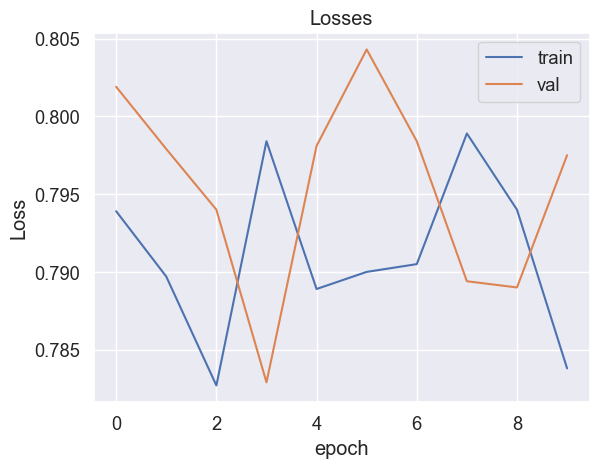

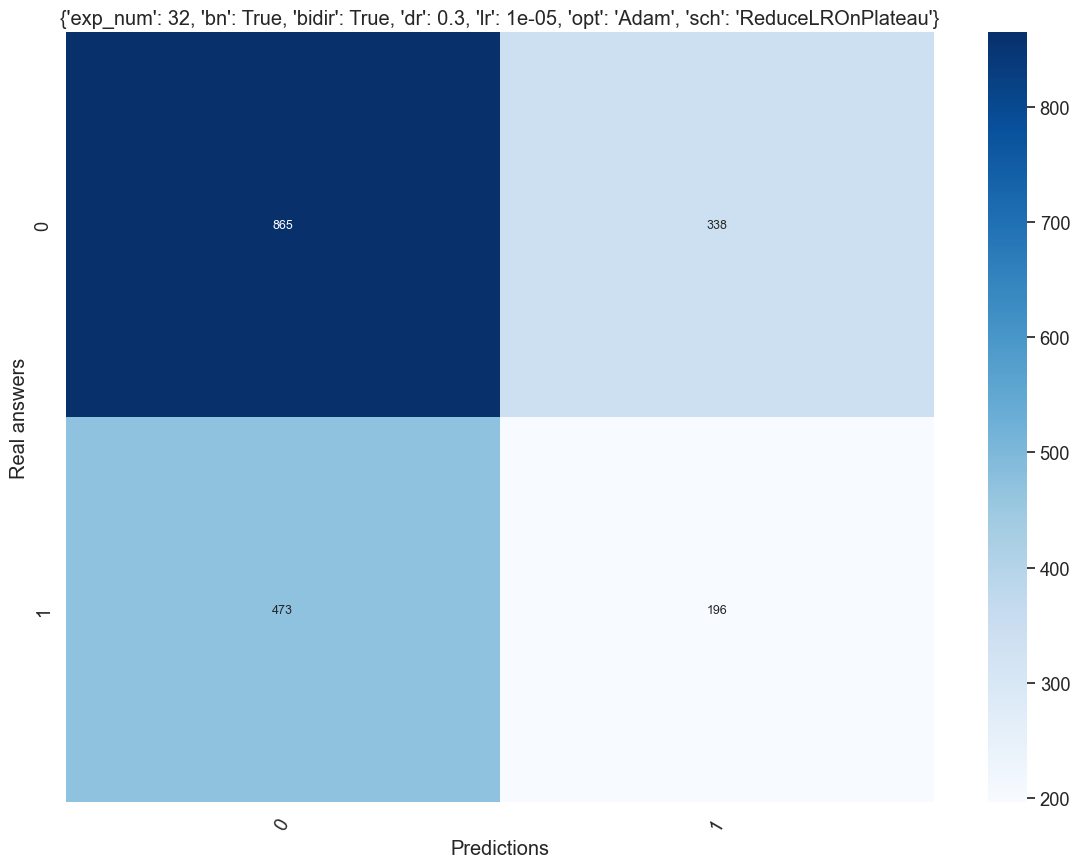

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1203
           1       0.37      0.29      0.33       669

    accuracy                           0.57      1872
   macro avg       0.51      0.51      0.50      1872
weighted avg       0.55      0.57      0.55      1872

{'algorithm': "{'exp_num': 32, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.37, 'recall': 0.29, 'f1_score': 0.33, 'f1_score_weighted': 0.55, 'accuracy': 0.57}
---------------------
{'exp_num': 33, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}


 10%|████▎                                      | 1/10 [02:09<19:26, 129.63s/it]

Epoch: 0 | Train loss: 0.7877| Val loss: 0.7992


 20%|████████▌                                  | 2/10 [04:26<17:52, 134.04s/it]

Epoch: 1 | Train loss: 0.7948| Val loss: 0.7884


 30%|████████████▉                              | 3/10 [06:45<15:54, 136.36s/it]

Epoch: 2 | Train loss: 0.7847| Val loss: 0.8064


 40%|█████████████████▏                         | 4/10 [09:04<13:43, 137.31s/it]

Epoch: 3 | Train loss: 0.7885| Val loss: 0.8035


 50%|█████████████████████▌                     | 5/10 [11:18<11:20, 136.08s/it]

Epoch: 4 | Train loss: 0.7881| Val loss: 0.8026


 60%|█████████████████████████▊                 | 6/10 [13:34<09:04, 136.14s/it]

Epoch: 5 | Train loss: 0.7945| Val loss: 0.7952


 70%|██████████████████████████████             | 7/10 [15:51<06:49, 136.38s/it]

Epoch: 6 | Train loss: 0.7874| Val loss: 0.792


 80%|██████████████████████████████████▍        | 8/10 [17:55<04:24, 132.31s/it]

Epoch: 7 | Train loss: 0.7915| Val loss: 0.7979


 90%|██████████████████████████████████████▋    | 9/10 [20:00<02:10, 130.12s/it]

Epoch: 8 | Train loss: 0.7872| Val loss: 0.7923


100%|██████████████████████████████████████████| 10/10 [22:18<00:00, 133.87s/it]

Epoch: 9 | Train loss: 0.7874| Val loss: 0.804


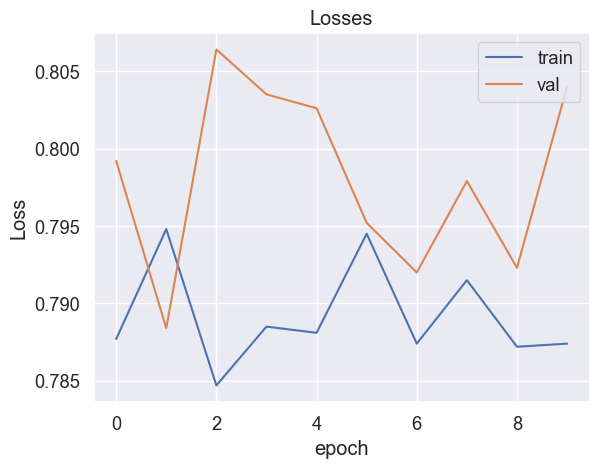

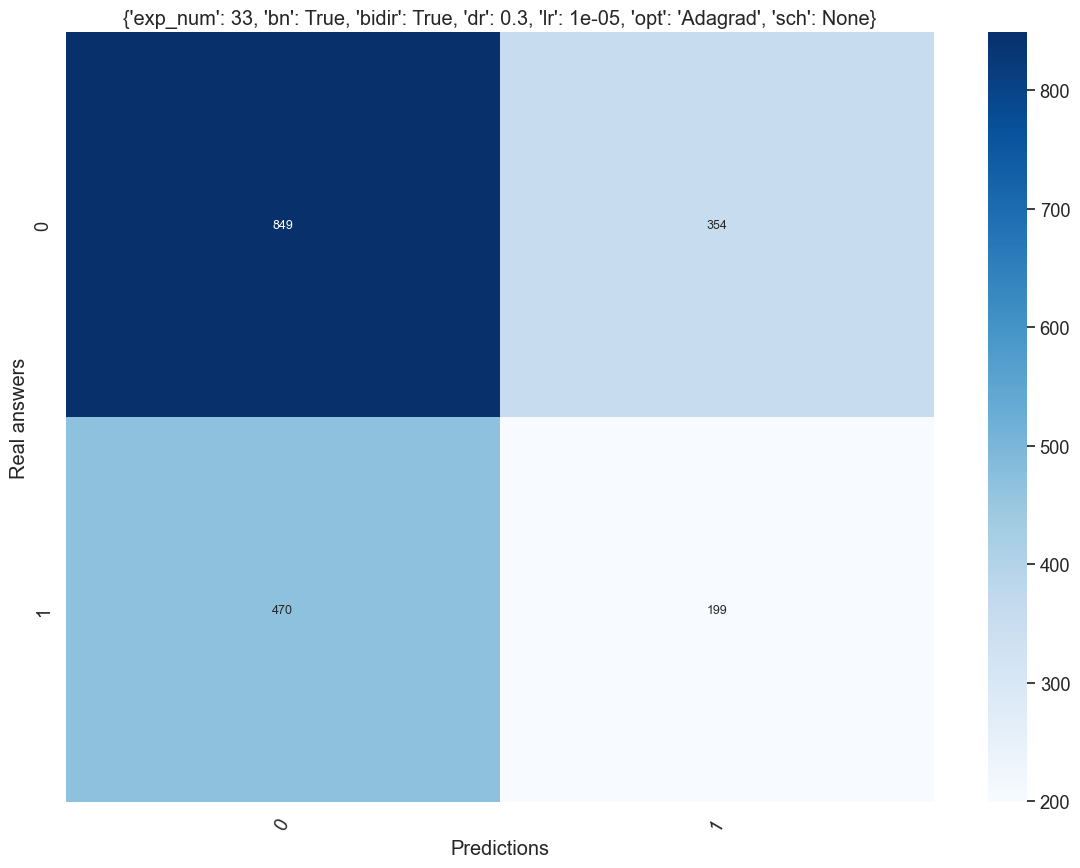

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1203
           1       0.36      0.30      0.33       669

    accuracy                           0.56      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.56      0.55      1872

{'algorithm': "{'exp_num': 33, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': None}", 'precision': 0.36, 'recall': 0.3, 'f1_score': 0.33, 'f1_score_weighted': 0.55, 'accuracy': 0.56}
---------------------
{'exp_num': 34, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}


 10%|████▎                                      | 1/10 [02:18<20:50, 138.94s/it]

Epoch: 0 | Train loss: 0.7861| Val loss: 0.8009


 20%|████████▌                                  | 2/10 [04:35<18:21, 137.72s/it]

Epoch: 1 | Train loss: 0.7964| Val loss: 0.7935


 30%|████████████▉                              | 3/10 [06:43<15:31, 133.11s/it]

Epoch: 2 | Train loss: 0.7934| Val loss: 0.8054


 40%|█████████████████▏                         | 4/10 [09:02<13:33, 135.65s/it]

Epoch: 3 | Train loss: 0.7878| Val loss: 0.7999


 50%|█████████████████████▌                     | 5/10 [11:17<11:16, 135.22s/it]

Epoch: 4 | Train loss: 0.7852| Val loss: 0.8015


 60%|█████████████████████████▊                 | 6/10 [13:22<08:47, 131.93s/it]

Epoch: 5 | Train loss: 0.7726| Val loss: 0.798


 70%|██████████████████████████████             | 7/10 [15:26<06:27, 129.22s/it]

Epoch: 6 | Train loss: 0.7908| Val loss: 0.8015


 80%|██████████████████████████████████▍        | 8/10 [17:42<04:22, 131.36s/it]

Epoch: 7 | Train loss: 0.7906| Val loss: 0.804


 90%|██████████████████████████████████████▋    | 9/10 [19:56<02:12, 132.08s/it]

Epoch: 8 | Train loss: 0.7924| Val loss: 0.8043


100%|██████████████████████████████████████████| 10/10 [22:09<00:00, 133.00s/it]

Epoch: 9 | Train loss: 0.7887| Val loss: 0.7915


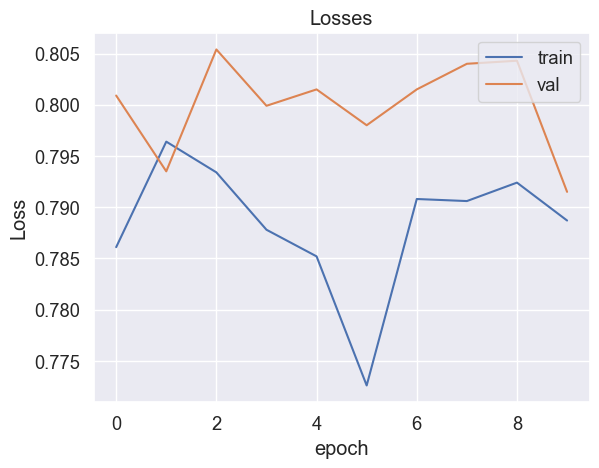

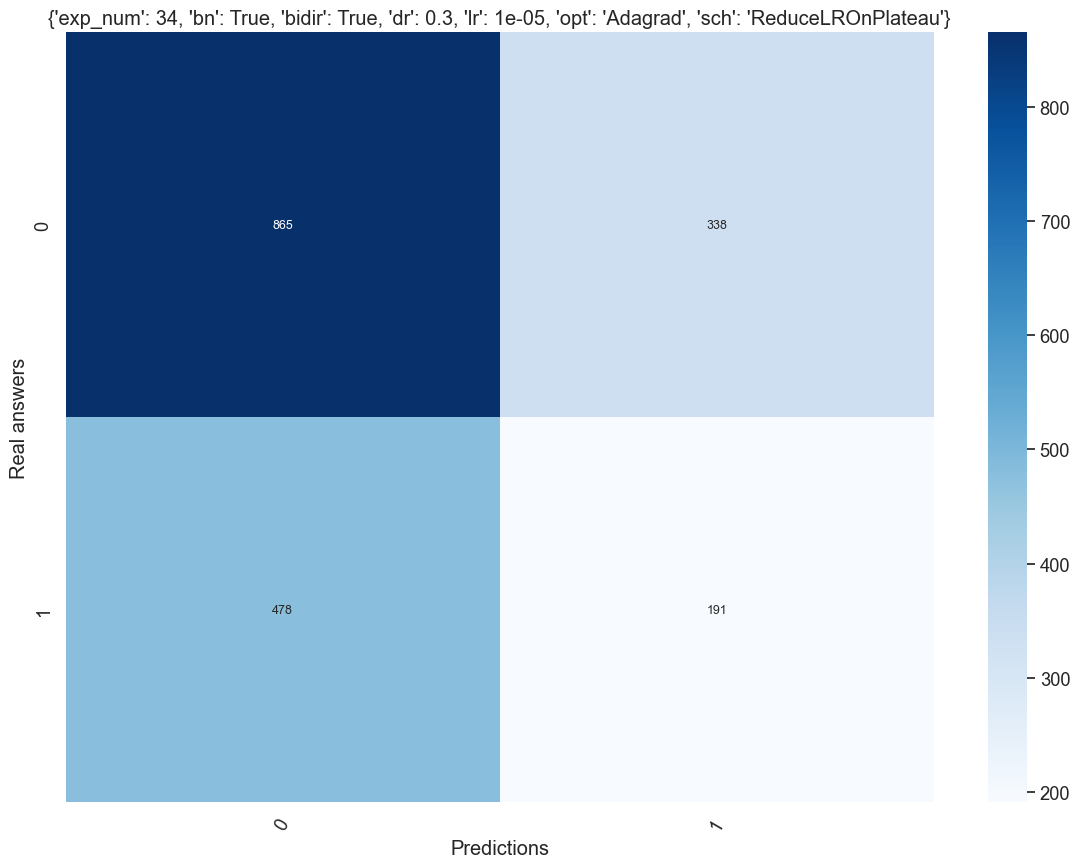

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1203
           1       0.36      0.29      0.32       669

    accuracy                           0.56      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.56      0.55      1872

{'algorithm': "{'exp_num': 34, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'Adagrad', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.36, 'recall': 0.29, 'f1_score': 0.32, 'f1_score_weighted': 0.55, 'accuracy': 0.56}
---------------------
{'exp_num': 35, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}


 10%|████▎                                      | 1/10 [02:10<19:31, 130.18s/it]

Epoch: 0 | Train loss: 0.7878| Val loss: 0.7982


 20%|████████▌                                  | 2/10 [04:20<17:21, 130.18s/it]

Epoch: 1 | Train loss: 0.7836| Val loss: 0.8109


 30%|████████████▉                              | 3/10 [06:36<15:31, 133.05s/it]

Epoch: 2 | Train loss: 0.776| Val loss: 0.7814


 40%|█████████████████▏                         | 4/10 [08:55<13:32, 135.43s/it]

Epoch: 3 | Train loss: 0.7746| Val loss: 0.7859


 50%|█████████████████████▌                     | 5/10 [11:13<11:21, 136.30s/it]

Epoch: 4 | Train loss: 0.7734| Val loss: 0.7818


 60%|█████████████████████████▊                 | 6/10 [13:31<09:06, 136.74s/it]

Epoch: 5 | Train loss: 0.7761| Val loss: 0.791


 70%|██████████████████████████████             | 7/10 [15:46<06:48, 136.25s/it]

Epoch: 6 | Train loss: 0.7716| Val loss: 0.769


 80%|██████████████████████████████████▍        | 8/10 [18:00<04:31, 135.63s/it]

Epoch: 7 | Train loss: 0.773| Val loss: 0.7671


 90%|██████████████████████████████████████▋    | 9/10 [20:18<02:16, 136.37s/it]

Epoch: 8 | Train loss: 0.7655| Val loss: 0.7657


100%|██████████████████████████████████████████| 10/10 [22:37<00:00, 135.74s/it]

Epoch: 9 | Train loss: 0.7673| Val loss: 0.7765


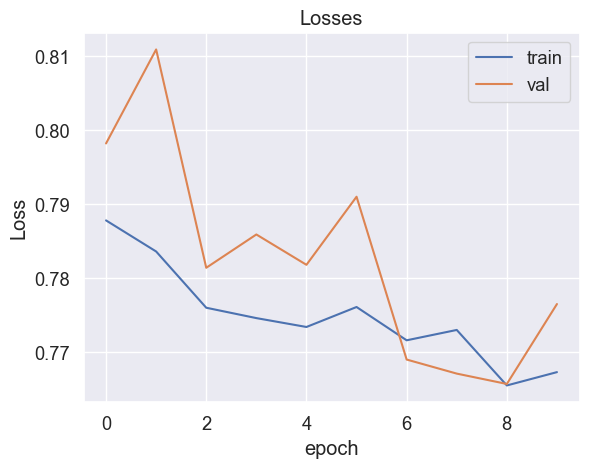

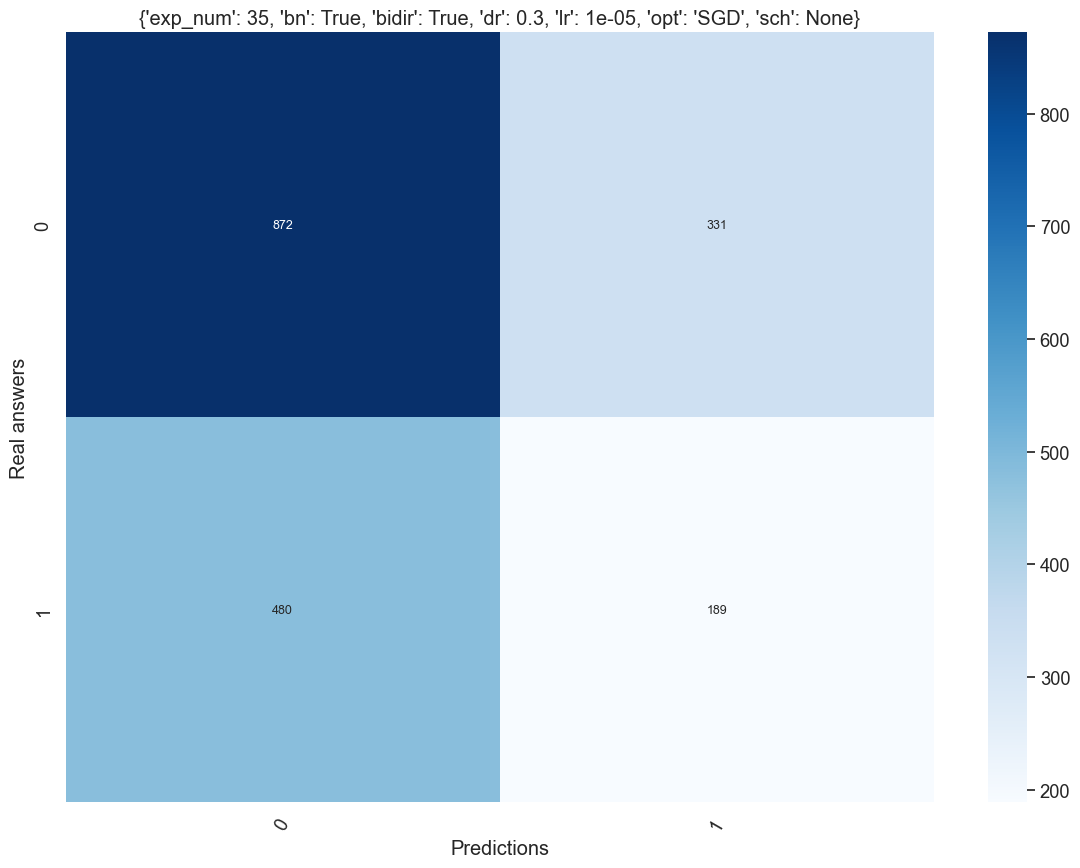

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1203
           1       0.36      0.28      0.32       669

    accuracy                           0.57      1872
   macro avg       0.50      0.50      0.50      1872
weighted avg       0.54      0.57      0.55      1872

{'algorithm': "{'exp_num': 35, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': None}", 'precision': 0.36, 'recall': 0.28, 'f1_score': 0.32, 'f1_score_weighted': 0.55, 'accuracy': 0.57}
---------------------
{'exp_num': 36, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}


 10%|████▎                                      | 1/10 [02:14<20:12, 134.78s/it]

Epoch: 0 | Train loss: 0.7644| Val loss: 0.7645


 20%|████████▌                                  | 2/10 [04:29<17:59, 134.99s/it]

Epoch: 1 | Train loss: 0.7642| Val loss: 0.7585


 30%|████████████▉                              | 3/10 [06:44<15:43, 134.78s/it]

Epoch: 2 | Train loss: 0.7653| Val loss: 0.771


 40%|█████████████████▏                         | 4/10 [08:58<13:27, 134.64s/it]

Epoch: 3 | Train loss: 0.7664| Val loss: 0.7612


 50%|█████████████████████▌                     | 5/10 [11:13<11:12, 134.49s/it]

Epoch: 4 | Train loss: 0.7593| Val loss: 0.7617


 60%|█████████████████████████▊                 | 6/10 [13:26<08:56, 134.16s/it]

Epoch: 5 | Train loss: 0.7674| Val loss: 0.7675


 70%|██████████████████████████████             | 7/10 [15:35<06:37, 132.41s/it]

Epoch: 6 | Train loss: 0.7536| Val loss: 0.7607


 80%|██████████████████████████████████▍        | 8/10 [17:47<04:24, 132.23s/it]

Epoch: 7 | Train loss: 0.7647| Val loss: 0.7711


 90%|██████████████████████████████████████▋    | 9/10 [19:58<02:11, 131.78s/it]

Epoch: 8 | Train loss: 0.7653| Val loss: 0.7546


100%|██████████████████████████████████████████| 10/10 [22:15<00:00, 133.60s/it]

Epoch: 9 | Train loss: 0.7615| Val loss: 0.7728


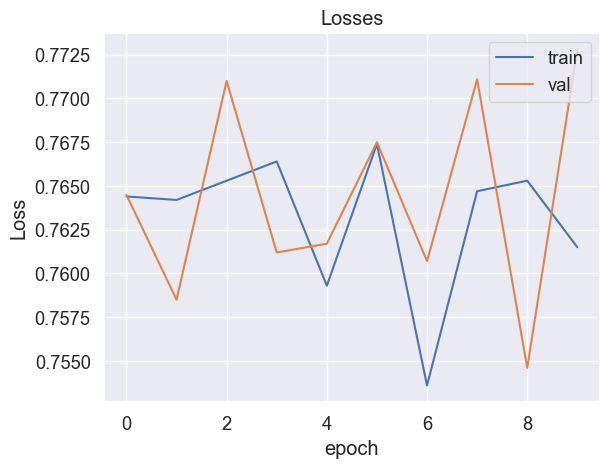

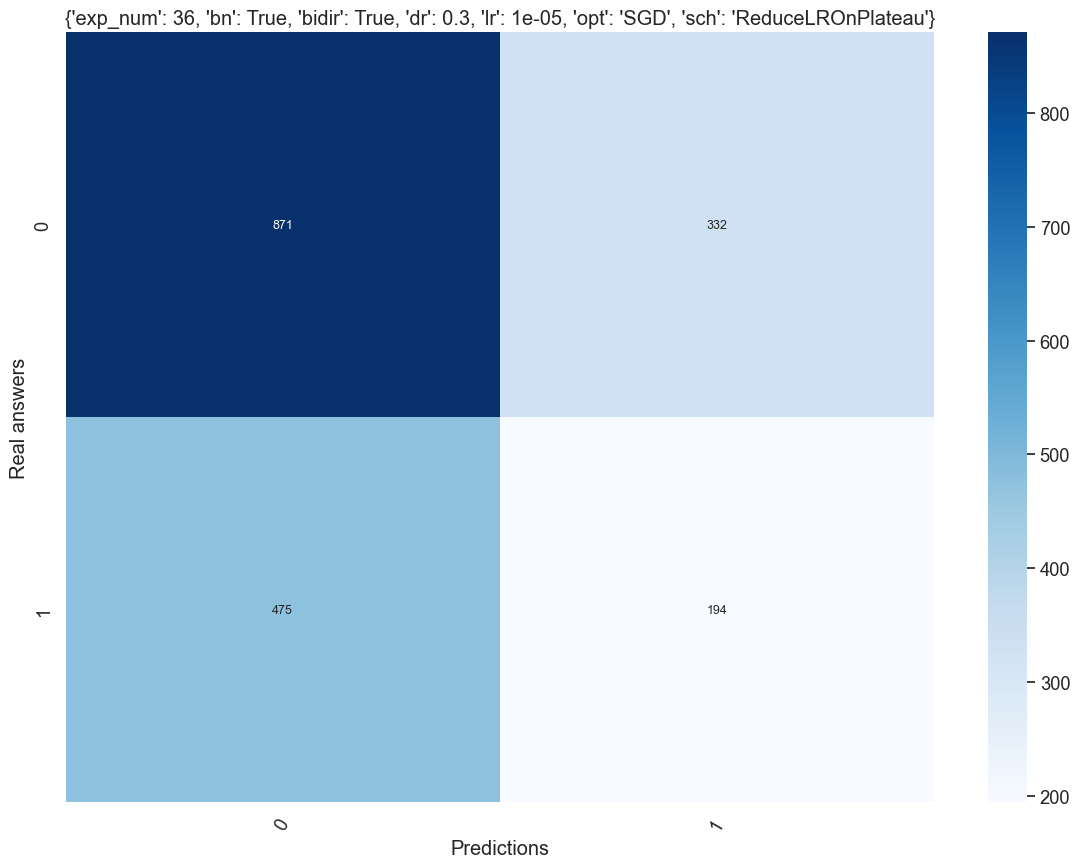

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1203
           1       0.37      0.29      0.32       669

    accuracy                           0.57      1872
   macro avg       0.51      0.51      0.50      1872
weighted avg       0.55      0.57      0.56      1872

{'algorithm': "{'exp_num': 36, 'bn': True, 'bidir': True, 'dr': 0.3, 'lr': 1e-05, 'opt': 'SGD', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.37, 'recall': 0.29, 'f1_score': 0.32, 'f1_score_weighted': 0.56, 'accuracy': 0.57}
---------------------
{'exp_num': 37, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-06, 'opt': 'Adam', 'sch': None}


 10%|████▎                                      | 1/10 [02:16<20:32, 136.90s/it]

Epoch: 0 | Train loss: 0.7967| Val loss: 0.7871


 20%|████████▌                                  | 2/10 [04:30<17:59, 134.96s/it]

Epoch: 1 | Train loss: 0.7864| Val loss: 0.778


 30%|████████████▉                              | 3/10 [06:48<15:53, 136.23s/it]

Epoch: 2 | Train loss: 0.7775| Val loss: 0.7702


 40%|█████████████████▏                         | 4/10 [09:02<13:32, 135.46s/it]

Epoch: 3 | Train loss: 0.7699| Val loss: 0.7635


 50%|█████████████████████▌                     | 5/10 [11:10<11:04, 132.88s/it]

Epoch: 4 | Train loss: 0.7632| Val loss: 0.7576


 60%|█████████████████████████▊                 | 6/10 [13:20<08:47, 131.75s/it]

Epoch: 5 | Train loss: 0.7574| Val loss: 0.7524


 70%|██████████████████████████████             | 7/10 [15:33<06:36, 132.10s/it]

Epoch: 6 | Train loss: 0.7523| Val loss: 0.7478


 80%|██████████████████████████████████▍        | 8/10 [17:52<04:28, 134.26s/it]

Epoch: 7 | Train loss: 0.7476| Val loss: 0.7436


 90%|██████████████████████████████████████▋    | 9/10 [20:10<02:15, 135.51s/it]

Epoch: 8 | Train loss: 0.7435| Val loss: 0.7399


100%|██████████████████████████████████████████| 10/10 [22:20<00:00, 134.09s/it]

Epoch: 9 | Train loss: 0.7397| Val loss: 0.7364


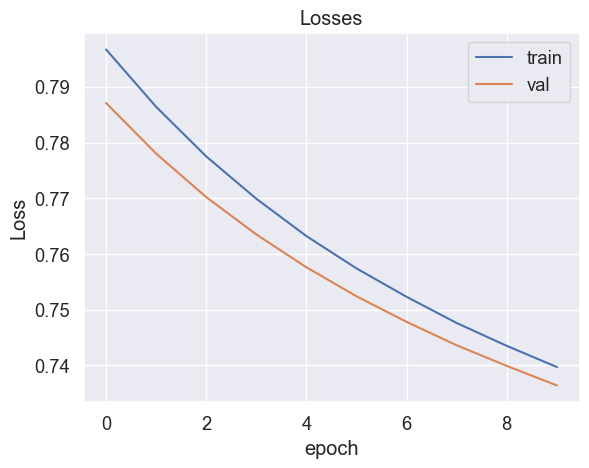

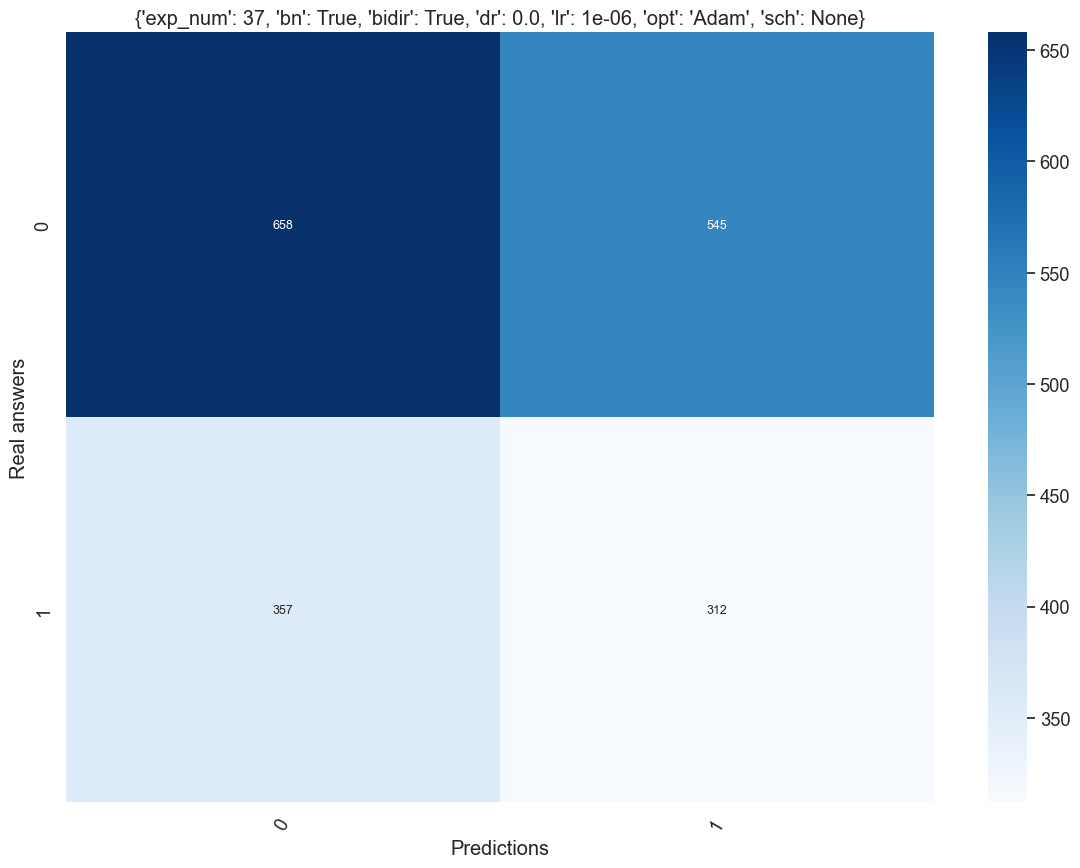

              precision    recall  f1-score   support

           0       0.65      0.55      0.59      1203
           1       0.36      0.47      0.41       669

    accuracy                           0.52      1872
   macro avg       0.51      0.51      0.50      1872
weighted avg       0.55      0.52      0.53      1872

{'algorithm': "{'exp_num': 37, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-06, 'opt': 'Adam', 'sch': None}", 'precision': 0.36, 'recall': 0.47, 'f1_score': 0.41, 'f1_score_weighted': 0.53, 'accuracy': 0.52}
---------------------
{'exp_num': 38, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-06, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}


  0%|                                                    | 0/10 [01:07<?, ?it/s]


KeyboardInterrupt: 

In [12]:
num_experiment = 1
metrics_dicts = []

for bn in batch_normalizations:
    for bidirectional in bidirectionals: 
        for learning_rate in learning_rates:
            for dropout in dropouts:
                for activation in activation_functions:
                    
                    if bidirectional:
                        model = LSTM_Model_BN(input_size,
                                           layers_sizes, num_layers,
                                           num_classes, dropout, activation, bidirectional, bias)
                    else:
                        model = LSTM_Model(input_size,
                                           layers_sizes, num_layers,
                                           num_classes, dropout, activation, bidirectional, bias)

                    for optimizer_name in optimizers:
                        if optimizer_name == 'Adam':
                            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                        elif optimizer_name == 'Adagrad':
                            optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
                        else:
                            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


                        for scheduler_name in schedulers:
                            if scheduler_name == 'ReduceLROnPlateau':
                                scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
                            else:
                                scheduler = None

                            parameters = {'exp_num': num_experiment,
                                          'bn': bn,
                                         'bidir': bidirectional,
                                          'dr': dropout,
                                         'lr': learning_rate,
                                         'opt': optimizer_name,
                                         'sch': scheduler_name}


                            model.to(device)

                            print(parameters)
                            loss = torch.nn.BCELoss()
                            model, path = train_epochs(model,
                                                 train_dataloader, val_dataloader,
                                                 num_experiment, scheduler, loss,
                                                 optimizer,
                                                 device=device, num_epochs=num_epochs)

                            metrics_dict = test_preds(model, test_dataloader, parameters, device, path)
                            print(metrics_dict)
                            metrics_dicts.append(metrics_dict)
                            num_experiment += 1
                            print('---------------------')
                    

In [13]:
df_metrics = pd.DataFrame(metrics_dicts)
df_metrics['num,bn,bd,d,lr,opt,sch'] = df_metrics['algorithm'].apply(lambda x: ', '.join([l.split(': ')[-1] for l in x[1:-1].split(',')[1:]]))
df_metrics.to_csv('DL_METRICS.csv')
df_metrics[df_metrics.columns[1:]]

,precision,recall,f1_score,f1_score_weighted,accuracy,"num,bn,bd,d,lr,opt,sch"
0,0.35,0.23,0.28,0.55,0.58,"True, True, 0.0, 1e-05, 'Adam', None"
1,0.35,0.23,0.28,0.55,0.58,"True, True, 0.0, 1e-05, 'Adam', 'ReduceLROnPla..."
2,0.35,0.22,0.27,0.55,0.58,"True, True, 0.0, 1e-05, 'Adagrad', None"
3,0.35,0.22,0.27,0.55,0.58,"True, True, 0.0, 1e-05, 'Adagrad', 'ReduceLROn..."
4,0.34,0.20,0.25,0.54,0.58,"True, True, 0.0, 1e-05, 'SGD', None"
5,0.34,0.20,0.25,0.54,0.58,"True, True, 0.0, 1e-05, 'SGD', 'ReduceLROnPlat..."
6,0.39,0.30,0.34,0.57,0.58,"True, True, 0.0, 1e-05, 'Adam', None"
7,0.39,0.30,0.34,0.57,0.58,"True, True, 0.0, 1e-05, 'Adam', 'ReduceLROnPla..."
8,0.38,0.29,0.33,0.56,0.58,"True, True, 0.0, 1e-05, 'Adagrad', None"
9,0.38,0.29,0.33,0.56,0.58,"True, True, 0.0, 1e-05, 'Adagrad', 'ReduceLROn..."


In [17]:
df_metrics[df_metrics.columns[1:]].tail(1)

,precision,recall,f1_score,f1_score_weighted,accuracy,"num,bn,bd,d,lr,opt,sch"
36,0.36,0.47,0.41,0.53,0.52,"True, True, 0.0, 1e-06, 'Adam', None"


In [21]:
loss = torch.nn.BCELoss()
num_epochs = 15

bidirectional = True
bn = True

activation = torch.nn.Sigmoid()
learning_rate = 1.0e-6
scheduler = None
dropout = 0.0

In [22]:
model = LSTM_Model_BN(input_size, layers_sizes, num_layers,
                      num_classes, dropout,
                      activation, bidirectional, bias)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  7%|██▊                                        | 1/15 [02:13<31:09, 133.52s/it]

Epoch: 0 | Train loss: 0.7658| Val loss: 0.7625


 13%|█████▋                                     | 2/15 [04:19<27:59, 129.19s/it]

Epoch: 1 | Train loss: 0.7615| Val loss: 0.759


 20%|████████▌                                  | 3/15 [06:23<25:19, 126.62s/it]

Epoch: 2 | Train loss: 0.7576| Val loss: 0.7557


 27%|███████████▍                               | 4/15 [08:25<22:53, 124.83s/it]

Epoch: 3 | Train loss: 0.7539| Val loss: 0.7526


 33%|██████████████▎                            | 5/15 [10:26<20:35, 123.55s/it]

Epoch: 4 | Train loss: 0.7505| Val loss: 0.7497


 40%|█████████████████▏                         | 6/15 [12:31<18:35, 123.91s/it]

Epoch: 5 | Train loss: 0.7474| Val loss: 0.747


 47%|████████████████████                       | 7/15 [14:38<16:40, 125.05s/it]

Epoch: 6 | Train loss: 0.7446| Val loss: 0.7444


 53%|██████████████████████▉                    | 8/15 [16:42<14:31, 124.56s/it]

Epoch: 7 | Train loss: 0.7419| Val loss: 0.742


 60%|█████████████████████████▊                 | 9/15 [18:44<12:24, 124.02s/it]

Epoch: 8 | Train loss: 0.7393| Val loss: 0.7396


 67%|████████████████████████████              | 10/15 [20:47<10:18, 123.64s/it]

Epoch: 9 | Train loss: 0.7369| Val loss: 0.7374


 73%|██████████████████████████████▊           | 11/15 [22:51<08:15, 123.78s/it]

Epoch: 10 | Train loss: 0.7345| Val loss: 0.7352


 80%|█████████████████████████████████▌        | 12/15 [24:53<06:09, 123.27s/it]

Epoch: 11 | Train loss: 0.7324| Val loss: 0.7332


 87%|████████████████████████████████████▍     | 13/15 [26:57<04:06, 123.47s/it]

Epoch: 12 | Train loss: 0.7303| Val loss: 0.7314


 93%|███████████████████████████████████████▏  | 14/15 [28:59<02:02, 122.77s/it]

Epoch: 13 | Train loss: 0.7283| Val loss: 0.7296


100%|██████████████████████████████████████████| 15/15 [31:04<00:00, 124.27s/it]

Epoch: 14 | Train loss: 0.7264| Val loss: 0.7279


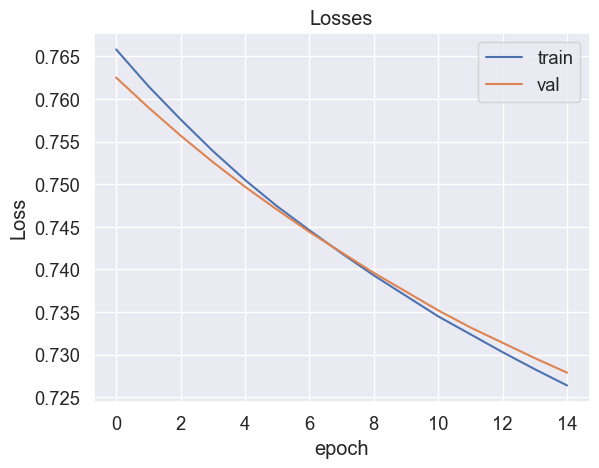

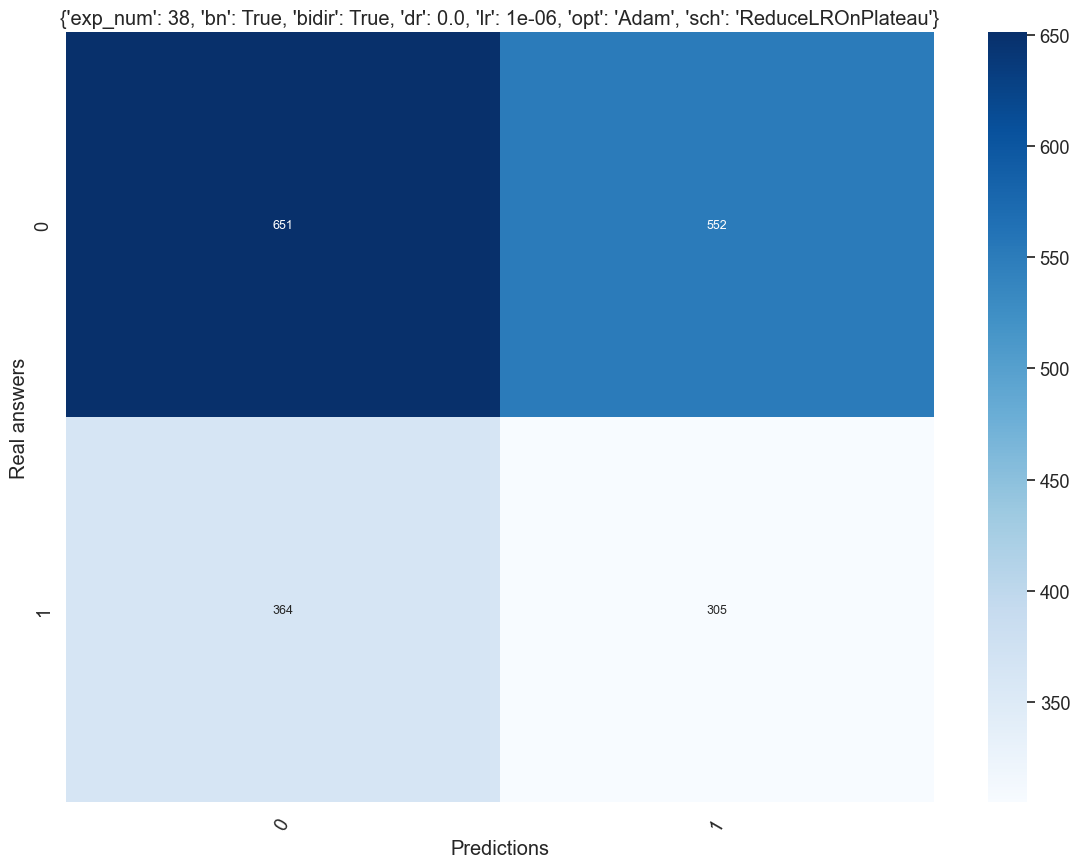

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1203
           1       0.36      0.46      0.40       669

    accuracy                           0.51      1872
   macro avg       0.50      0.50      0.49      1872
weighted avg       0.54      0.51      0.52      1872

{'algorithm': "{'exp_num': 38, 'bn': True, 'bidir': True, 'dr': 0.0, 'lr': 1e-06, 'opt': 'Adam', 'sch': 'ReduceLROnPlateau'}", 'precision': 0.36, 'recall': 0.46, 'f1_score': 0.4, 'f1_score_weighted': 0.52, 'accuracy': 0.51}


In [23]:
model.to(device)
num_experiment = 38
model, path = train_epochs(model, train_dataloader, val_dataloader,
                           num_experiment, scheduler, loss, optimizer,
                           device=device, num_epochs=num_epochs)

metrics_dict_last = test_preds(model, test_dataloader, parameters, device, path)
print(metrics_dict_last)